<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 20/11/2020<b>

In [169]:
%matplotlib inline

# general libraries
import sys
import math
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import defaultdict

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

In [170]:
data_directory = "../../data/"
plot_directory = "../../plots/DataUnderstanding/"
TR_file = data_directory + "Train_HR_Employee_Attrition.csv"
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"

In [171]:
df = pd.read_csv(TR_file, sep=",") 

In [172]:
df_extra = pd.read_csv(data_directory + "Cleaned_Train_HR_Employee_Attrition.csv", sep=",") 

In [173]:
df_impunted = pd.read_csv(data_directory + "Impunted_Train_HR_Employee_Attrition.csv", sep=",") 

In [174]:
df.head()  # first rows sneak peek

Age Attrition     BusinessTravel  DailyRate              Department  \
0  52.0        No      Travel_Rarely        593  Research & Development   
1  36.0        No      Travel_Rarely       1218  Research & Development   
2   NaN        No  Travel_Frequently        530                   Sales   
3  33.0        No      Travel_Rarely        953  Research & Development   
4   NaN        No      Travel_Rarely       1380  Research & Development   

   DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
0                 9          4           Medical                        2   
1                 1          1     Life Sciences                        2   
2                16          3     Life Sciences                        3   
3                 5          4  Technical Degree                        2   
4                 9          2     Life Sciences                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0    Male  ...                         3           80.0                 0   
1    Male  ...                         3           80.0                 1   
2     NaN  ...                         3            NaN                 1   
3    Male  ...                         2            NaN                 0   
4  Female  ...                         3           80.0                 0   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                20                    2.0               2             8.0   
1                21                    3.0               3             1.0   
2                 7                    4.0               3             1.0   
3                12                    1.0               3             3.0   
4                 2                    NaN               3            10.0   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   7                        2                   13  
1                   8                        1                    6  
2                   5                        1                    2  
3                   7                        0                    7  
4                   2                        2                    1  

[5 rows x 33 columns]

In [175]:
df_extra[df_extra["Attrition"] == 1].shape[0]

153

In [176]:
df[df["Attrition"] == "Yes"].shape[0]

192

<h2> Variables distribution </h2>

<b> Missing data </b>

/home/alexandra/anaconda3/lib/python3.8/site-packages/missingno/missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


[]

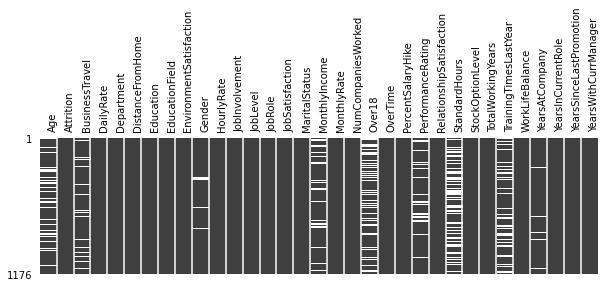

In [177]:
fig = plt.subplots(figsize=(10, 2.5))
fig_dims = (1, 1)

ax = plt.subplot2grid(fig_dims, (0, 0))
msno.matrix(df, ax=ax)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.plot()

<h6> Drawing countplots for categorical data </h6>

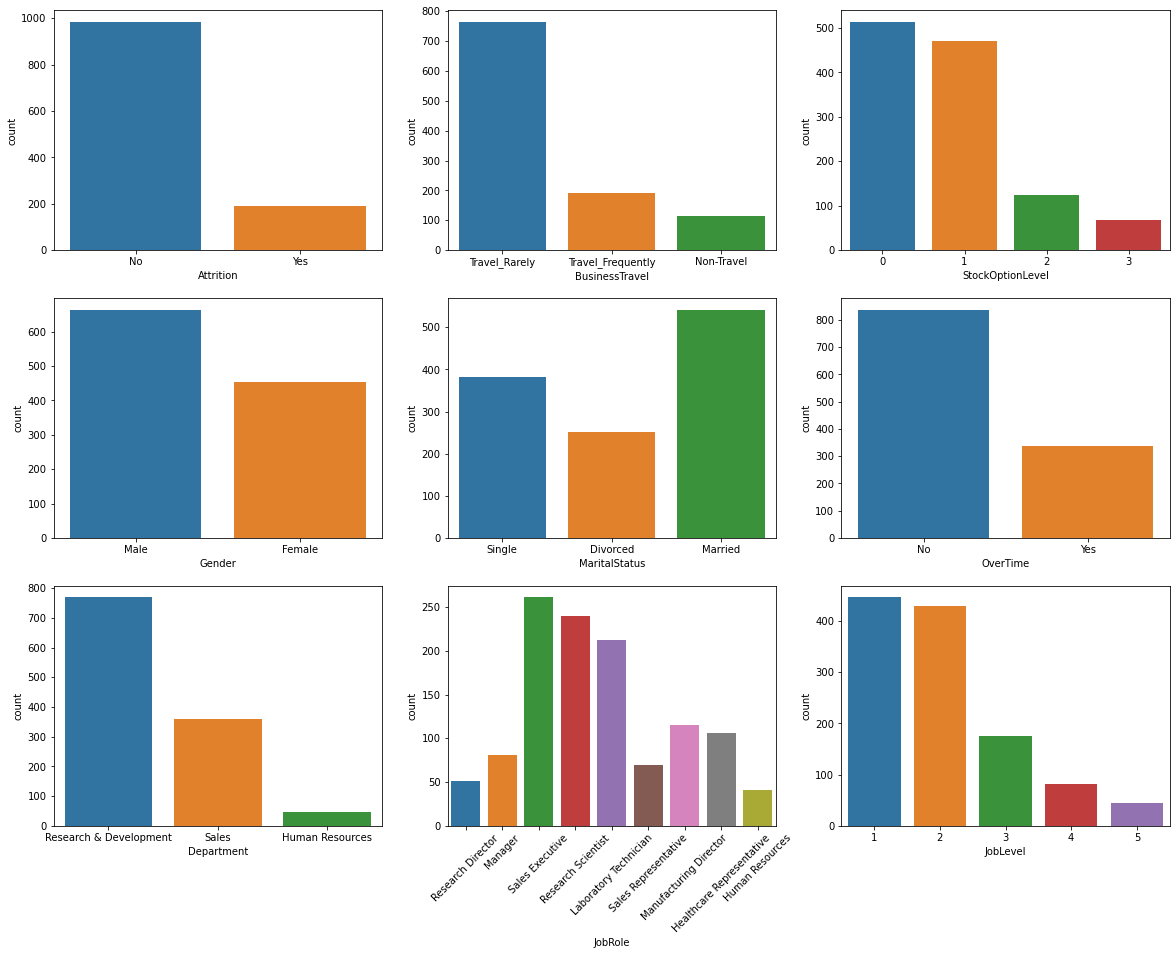

In [178]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="Attrition", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="BusinessTravel", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="StockOptionLevel", data=df)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="Gender", data=df)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="MaritalStatus", data=df)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="OverTime", data=df)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x="Department", data=df)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.countplot(x="JobRole", data=df)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.countplot(x="JobLevel", data=df)

plt.show()

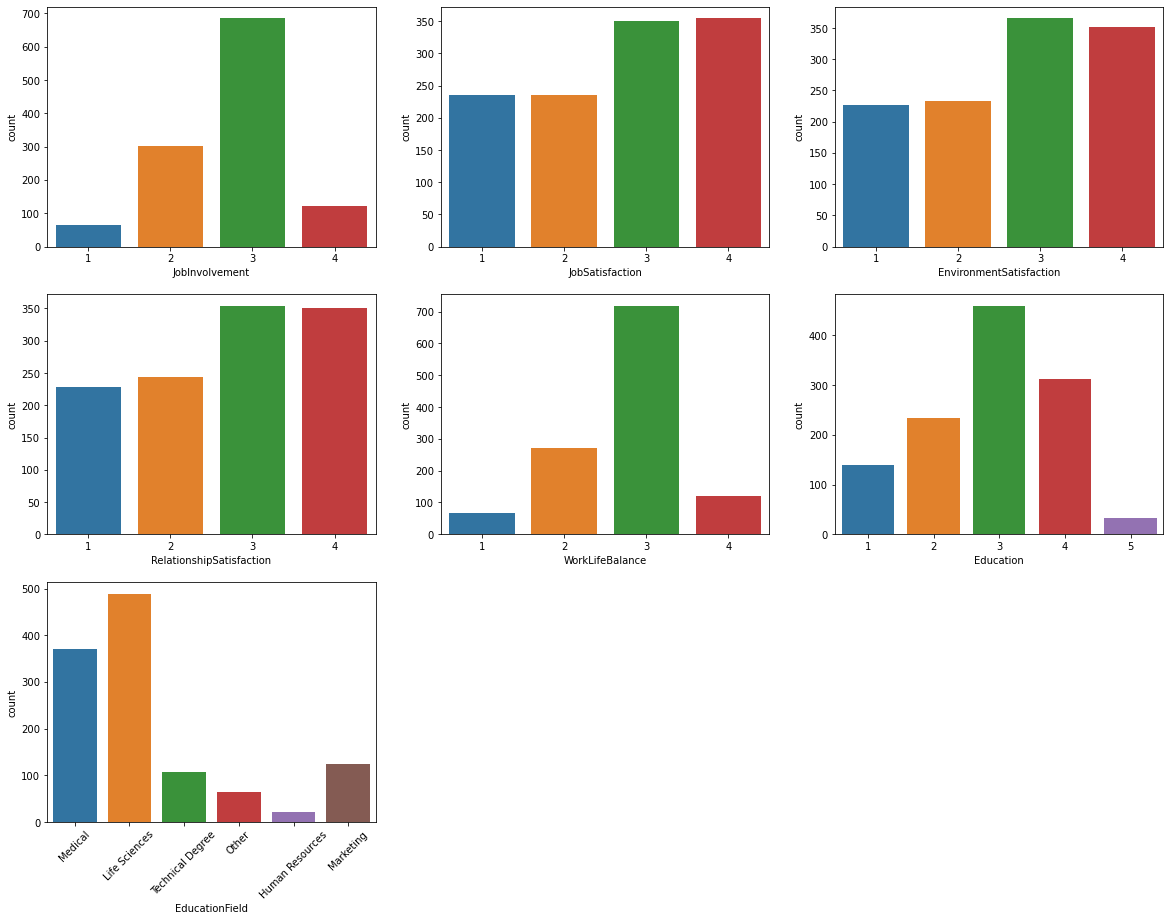

In [179]:
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="JobInvolvement", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="JobSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="EnvironmentSatisfaction", data=df)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="RelationshipSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="WorkLifeBalance", data=df)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="Education", data=df)


ax = plt.subplot2grid(fig_dims, (2, 0))
sns.countplot(x="EducationField", data=df)
plt.xticks(rotation=45)

plt.show()

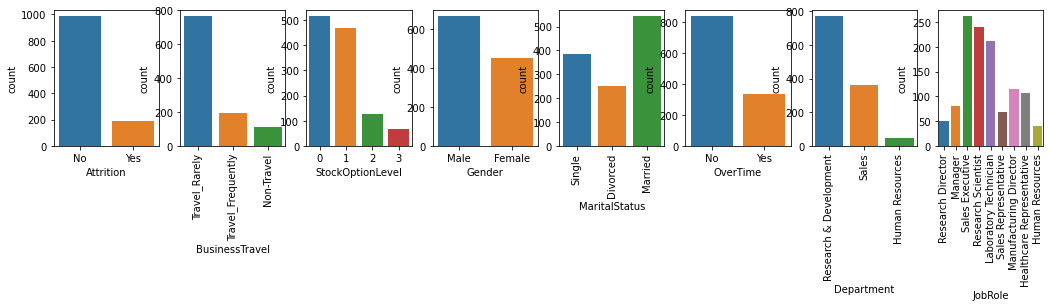

In [180]:
fig = plt.subplots(figsize=(20, 2.5))
fig_dims = (1, 9)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="Attrition", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="BusinessTravel", data=df)
plt.xticks(rotation=90)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="StockOptionLevel", data=df)

ax = plt.subplot2grid(fig_dims, (0, 3))
sns.countplot(x="Gender", data=df)
ax = plt.subplot2grid(fig_dims, (0, 4))
sns.countplot(x="MaritalStatus", data=df)
plt.xticks(rotation=90)
ax = plt.subplot2grid(fig_dims, (0, 5))
sns.countplot(x="OverTime", data=df)

ax = plt.subplot2grid(fig_dims, (0, 6))
sns.countplot(x="Department", data=df)
plt.xticks(rotation=90)
ax = plt.subplot2grid(fig_dims, (0, 7))
sns.countplot(x="JobRole", data=df)
plt.xticks(rotation=90)

plt.show()

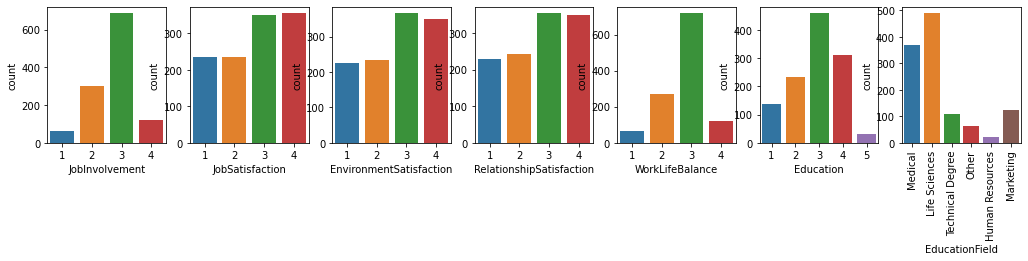

In [181]:
fig =plt.subplots(figsize=(20, 2.5))
fig_dims = (1, 8)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="JobInvolvement", data=df)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="JobSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="EnvironmentSatisfaction", data=df)

ax = plt.subplot2grid(fig_dims, (0, 3))
sns.countplot(x="RelationshipSatisfaction", data=df)
ax = plt.subplot2grid(fig_dims, (0, 4))
sns.countplot(x="WorkLifeBalance", data=df)
ax = plt.subplot2grid(fig_dims, (0, 5))
sns.countplot(x="Education", data=df)

ax = plt.subplot2grid(fig_dims, (0, 6))
sns.countplot(x="EducationField", data=df)
plt.xticks(rotation=90)
plt.show()

<h6>Get JobRole's departments</h6>

In [182]:
jobroles = df["JobRole"].unique()

for jr in jobroles:
    my_set = set()
    for row in df[df["JobRole"] == jr]["Department"]:
        my_set.add(row)
    print(jr, my_set, sep="\t")

Research Director	{'Research & Development'}
Manager	{'Research & Development', 'Human Resources', 'Sales'}
Sales Executive	{'Sales'}
Research Scientist	{'Research & Development'}
Laboratory Technician	{'Research & Development'}
Sales Representative	{'Sales'}
Manufacturing Director	{'Research & Development'}
Healthcare Representative	{'Research & Development'}
Human Resources	{'Human Resources'}


<h6>Get JobRole's education field</h6>

In [183]:
jobroles = df["JobRole"].unique()

for jr in jobroles:
    my_set = set()
    for row in df[df["JobRole"] == jr]["EducationField"]:
        my_set.add(row)
    print(jr, my_set, sep="\t")

Research Director	{'Life Sciences', 'Medical', 'Technical Degree', 'Other'}
Manager	{'Medical', 'Technical Degree', 'Other', 'Life Sciences', 'Marketing', 'Human Resources'}
Sales Executive	{'Medical', 'Technical Degree', 'Other', 'Life Sciences', 'Marketing'}
Research Scientist	{'Life Sciences', 'Medical', 'Technical Degree', 'Other'}
Laboratory Technician	{'Life Sciences', 'Medical', 'Technical Degree', 'Other'}
Sales Representative	{'Medical', 'Technical Degree', 'Other', 'Life Sciences', 'Marketing'}
Manufacturing Director	{'Life Sciences', 'Medical', 'Technical Degree', 'Other'}
Healthcare Representative	{'Life Sciences', 'Medical', 'Technical Degree', 'Other'}
Human Resources	{'Medical', 'Technical Degree', 'Other', 'Life Sciences', 'Human Resources'}


<h6> Drawing histograms for numerical data</h6>

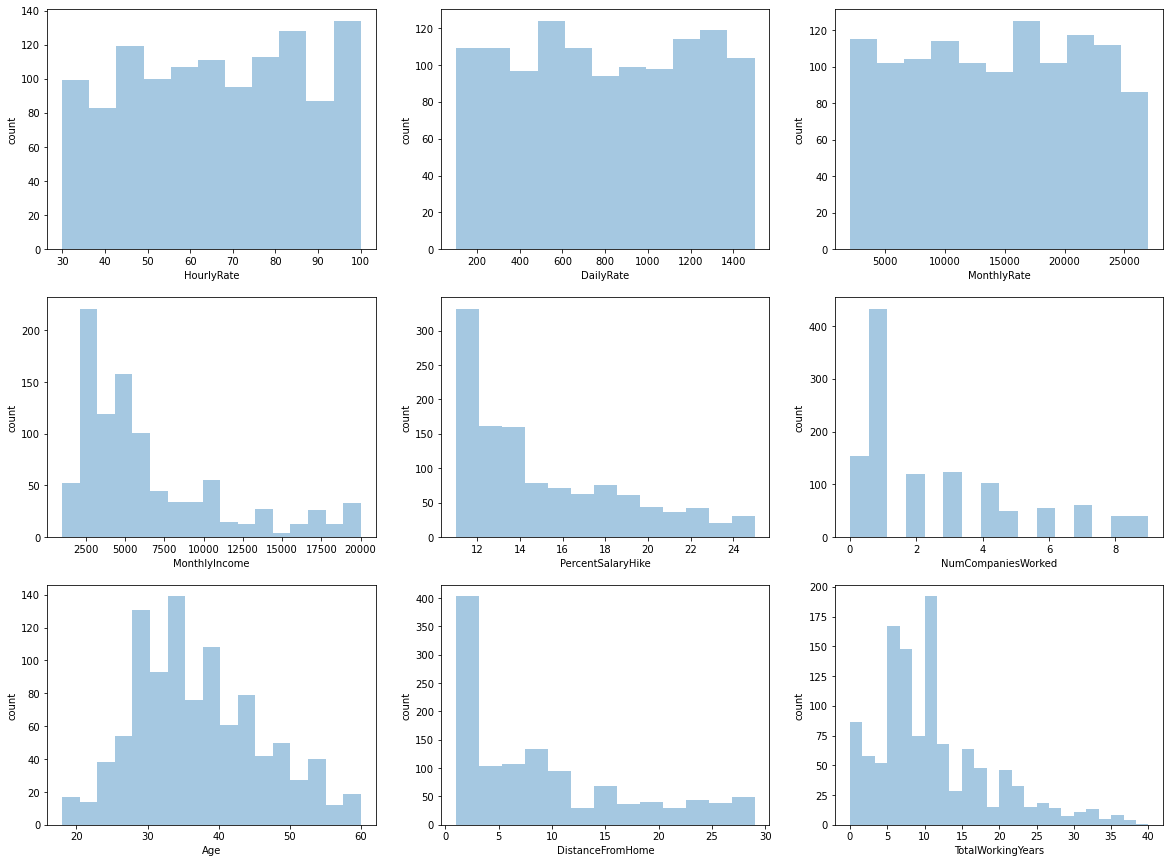

In [184]:
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df["HourlyRate"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["DailyRate"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["MonthlyRate"].dropna(), kde=False)
plt.ylabel("count")

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df["MonthlyIncome"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df["PercentSalaryHike"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df["NumCompaniesWorked"].dropna(), kde=False)
plt.ylabel("count")


ax = plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df["Age"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df["DistanceFromHome"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df["TotalWorkingYears"].dropna(), kde=False)
plt.ylabel("count")
plt.show()

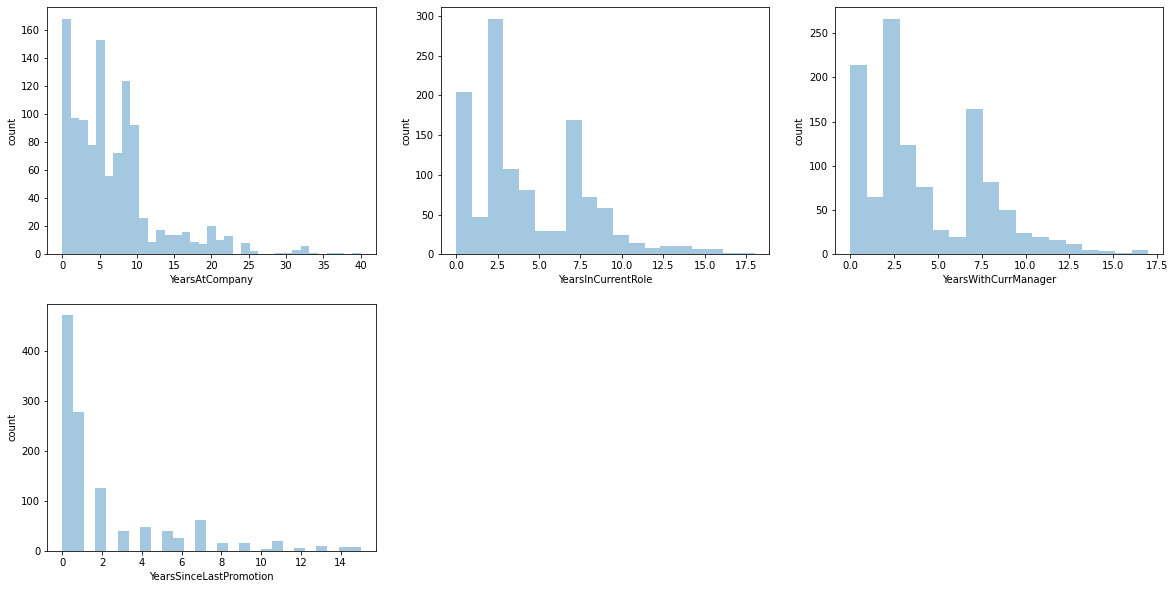

In [185]:
fig =plt.subplots(figsize=(20, 10))
fig_dims = (2, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df["YearsAtCompany"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["YearsInCurrentRole"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["YearsWithCurrManager"].dropna(), kde=False)
plt.ylabel("count")

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df["YearsSinceLastPromotion"].dropna(), kde=False)
plt.ylabel("count")

plt.show()

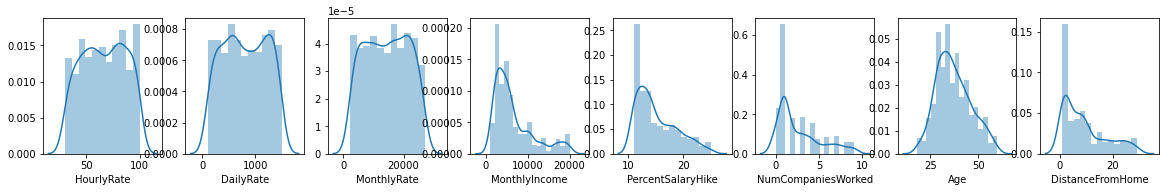

In [186]:
fig =plt.subplots(figsize=(20, 2.5))
fig_dims = (1, 8)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df["HourlyRate"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["DailyRate"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["MonthlyRate"].dropna(), kde=True)

ax = plt.subplot2grid(fig_dims, (0, 3))
sns.distplot(df["MonthlyIncome"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 4))
sns.distplot(df["PercentSalaryHike"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 5))
sns.distplot(df["NumCompaniesWorked"].dropna(), kde=True)


ax = plt.subplot2grid(fig_dims, (0, 6))
sns.distplot(df["Age"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 7))
sns.distplot(df["DistanceFromHome"].dropna(), kde=True)
plt.show()

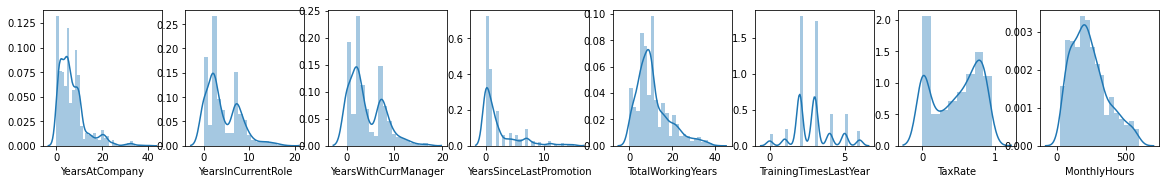

In [187]:
fig =plt.subplots(figsize=(20, 2.5))
fig_dims = (1, 8)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df["YearsAtCompany"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["YearsInCurrentRole"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["YearsWithCurrManager"].dropna(), kde=True)

ax = plt.subplot2grid(fig_dims, (0, 3))
sns.distplot(df["YearsSinceLastPromotion"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 4))
sns.distplot(df["TotalWorkingYears"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 5))
sns.distplot(df["TrainingTimesLastYear"].dropna(), kde=True)

ax = plt.subplot2grid(fig_dims, (0, 6))
sns.distplot(df_extra["TaxRate"].dropna(), kde=True)
ax = plt.subplot2grid(fig_dims, (0, 7))
sns.distplot(df_extra["MonthlyHours"].dropna(), kde=True)

plt.show()

<h6>Drawing curve fitting for numerical data </h6>

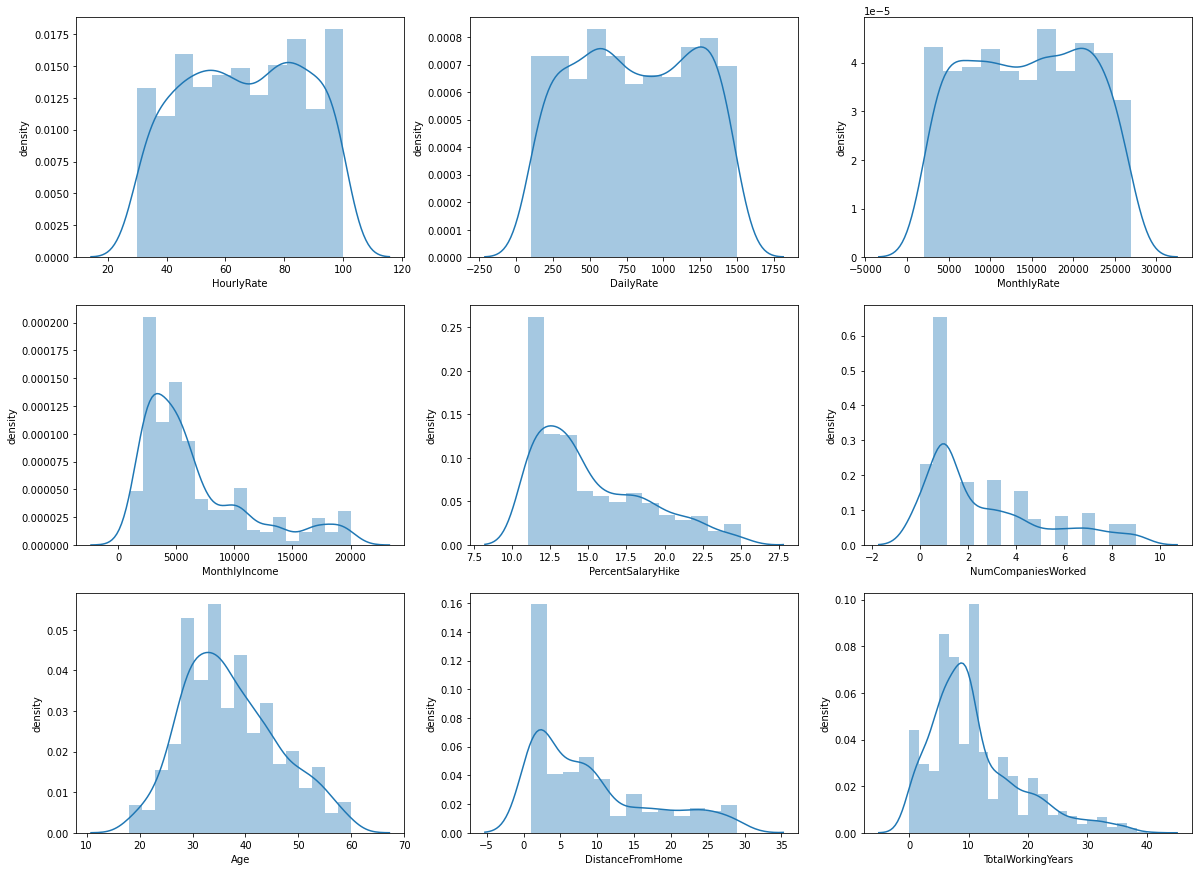

In [188]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
# histogram, where on y-axis are displayes bins' density in order to fit the data
sns.distplot(df["HourlyRate"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["DailyRate"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["MonthlyRate"].dropna(), kde=True)
plt.ylabel("density")

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df["MonthlyIncome"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df["PercentSalaryHike"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df["NumCompaniesWorked"].dropna(), kde=True)
plt.ylabel("density")

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df["Age"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df["DistanceFromHome"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df["TotalWorkingYears"].dropna(), kde=True)
plt.ylabel("density")

plt.show()

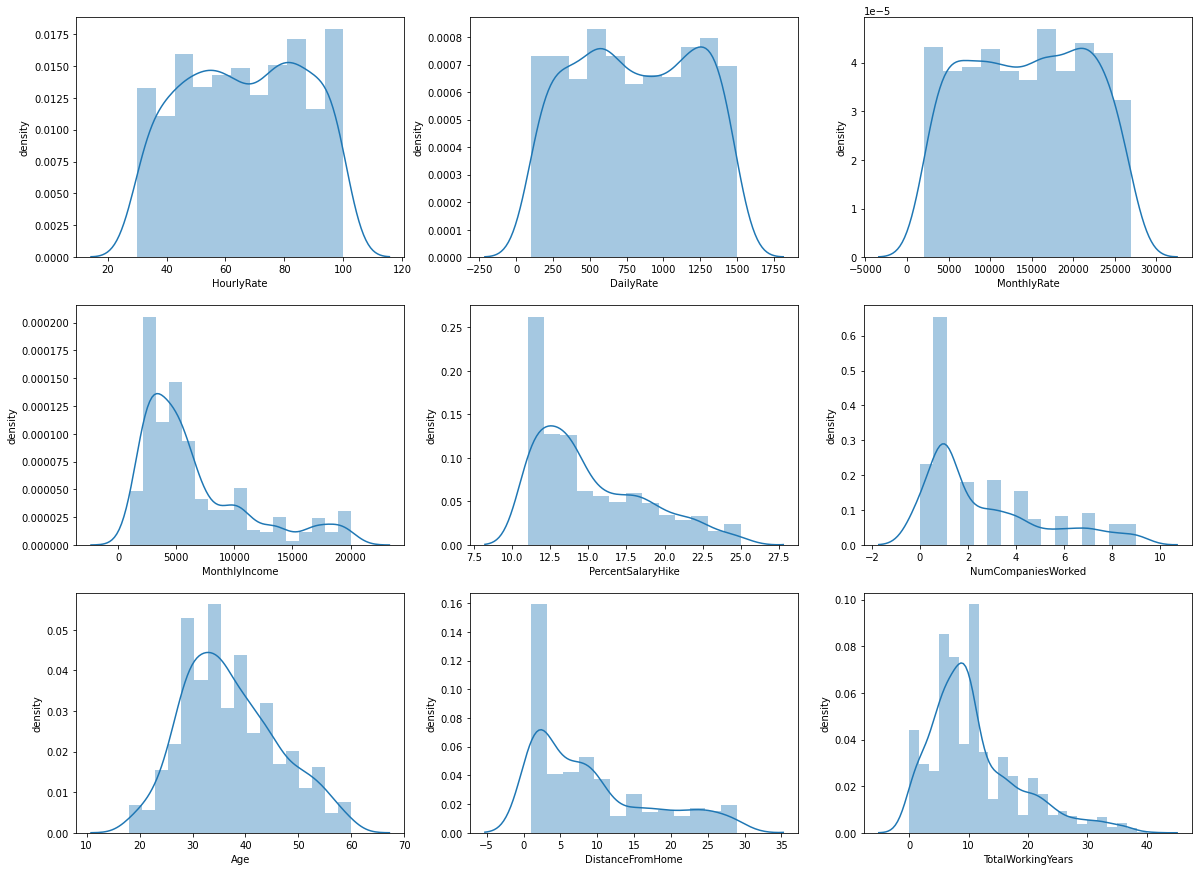

In [189]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
# histogram, where on y-axis are displayes bins' density in order to fit the data
sns.distplot(df["HourlyRate"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["DailyRate"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["MonthlyRate"].dropna(), kde=True)
plt.ylabel("density")

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df["MonthlyIncome"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df["PercentSalaryHike"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df["NumCompaniesWorked"].dropna(), kde=True)
plt.ylabel("density")

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df["Age"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df["DistanceFromHome"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df["TotalWorkingYears"].dropna(), kde=True)
plt.ylabel("density")

plt.show()

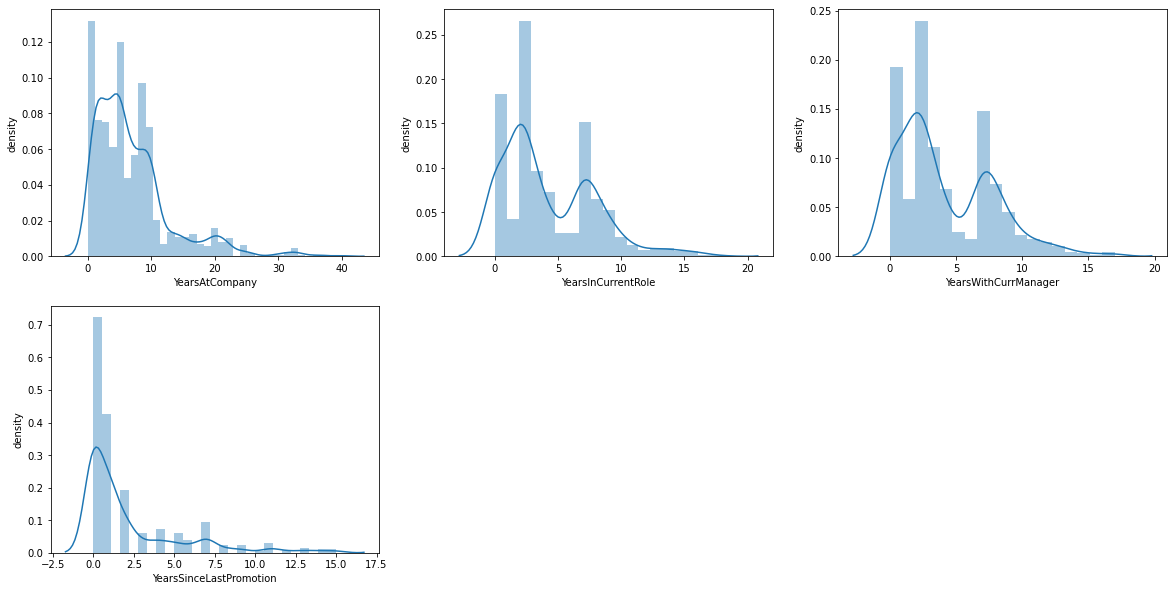

In [190]:
fig =plt.subplots(figsize=(20, 10))
fig_dims = (2, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df["YearsAtCompany"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df["YearsInCurrentRole"].dropna(), kde=True)
plt.ylabel("density")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df["YearsWithCurrManager"].dropna(), kde=True)
plt.ylabel("density")

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df["YearsSinceLastPromotion"].dropna(), kde=True)
plt.ylabel("density")

plt.show()

<h6> Graphically assess if numerical data is Gaussian distributed or not</h6>

To graphically assess if data is Gaussian like we use a  <b>Quantile-Quantile plot (QQ plot)</b>. 
It shows the distribution  of the data against the expected normal distribution.
If the data is normally distributed, the points fall on the 45° reference line. 
If the data is non-normal, the points deviate noticeably from the reference line.

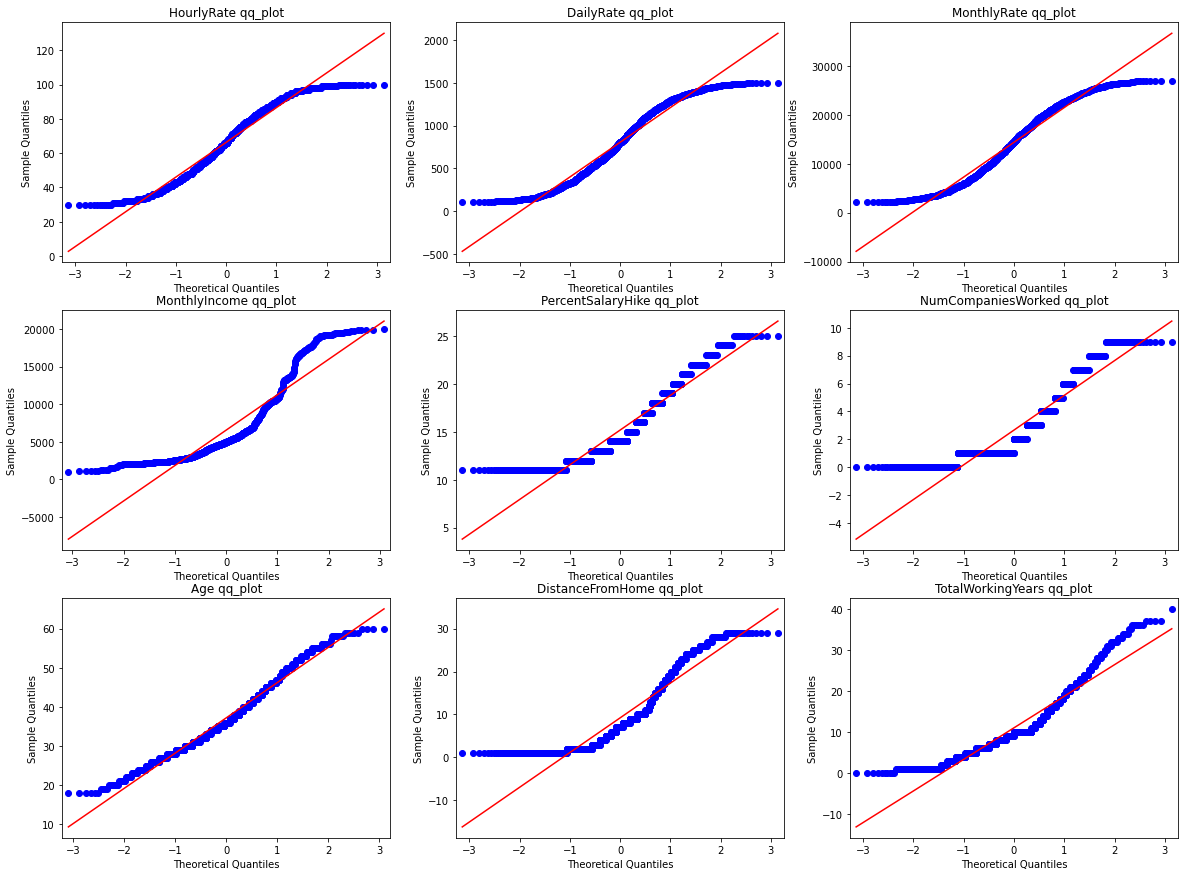

In [191]:
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
qqplot(df["HourlyRate"].dropna(), line='s', ax=ax)
plt.title("HourlyRate" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 1))
qqplot(df["DailyRate"].dropna(), line='s', ax=ax)
plt.title("DailyRate" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 2))
qqplot(df["MonthlyRate"].dropna(), line='s', ax=ax)
plt.title("MonthlyRate" + " qq_plot")

ax = plt.subplot2grid(fig_dims, (1, 0))
qqplot(df["MonthlyIncome"].dropna(), line='s', ax=ax)
plt.title("MonthlyIncome" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (1, 1))
qqplot(df["PercentSalaryHike"].dropna(), line='s', ax=ax)
plt.title("PercentSalaryHike" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (1, 2))
qqplot(df["NumCompaniesWorked"].dropna(), line='s', ax=ax)
plt.title("NumCompaniesWorked" + " qq_plot")

ax = plt.subplot2grid(fig_dims, (2, 0))
qqplot(df["Age"].dropna(), line='s', ax=ax)
plt.title("Age" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (2, 1))
qqplot(df["DistanceFromHome"].dropna(), line='s', ax=ax)
plt.title("DistanceFromHome" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (2, 2))
qqplot(df["TotalWorkingYears"].dropna(), line='s', ax=ax)
plt.title("TotalWorkingYears" + " qq_plot")

plt.show()

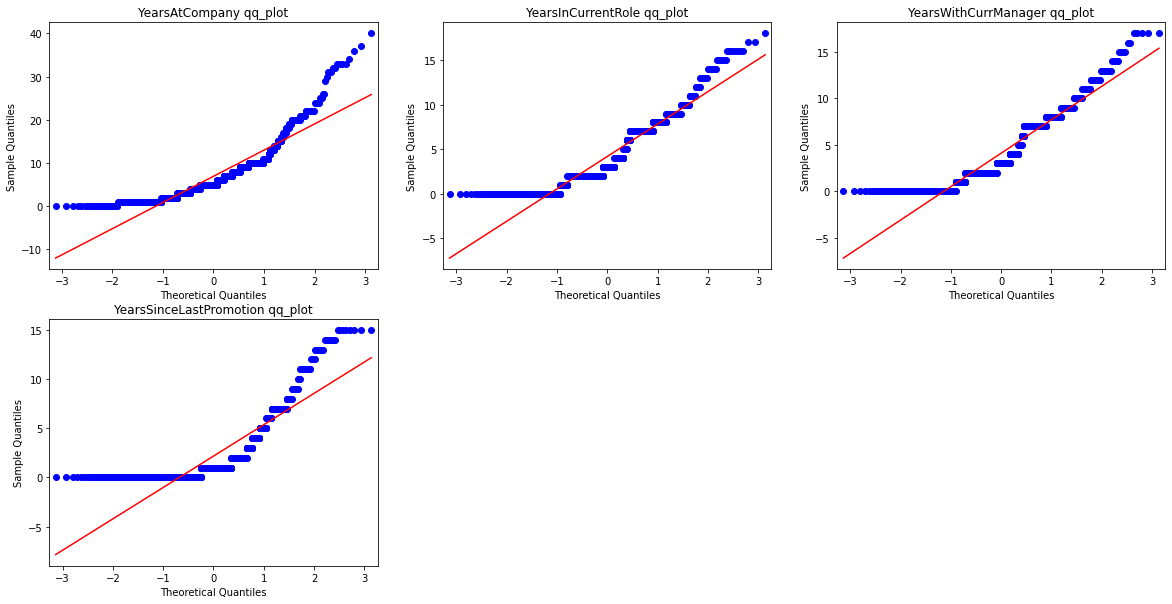

In [192]:
fig =plt.subplots(figsize=(20, 10))
fig_dims = (2, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
qqplot(df["YearsAtCompany"].dropna(), line='s', ax=ax)
plt.title("YearsAtCompany" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 1))
qqplot(df["YearsInCurrentRole"].dropna(), line='s', ax=ax)
plt.title("YearsInCurrentRole" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 2))
qqplot(df["YearsWithCurrManager"].dropna(), line='s', ax=ax)
plt.title("YearsWithCurrManager" + " qq_plot")

ax = plt.subplot2grid(fig_dims, (1, 0))
qqplot(df["YearsSinceLastPromotion"].dropna(), line='s', ax=ax)
plt.title("YearsSinceLastPromotion" + " qq_plot")

plt.show()

<h6> Statistically assess if data is Gaussian distributed or not</h6>

<b>scipy.stats.normaltest</b> function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

In [193]:
column_names = list(df.columns)
obj_columns = list(df.select_dtypes(include=['object']).columns)
for column_name in column_names:
    if column_name not in obj_columns:
        data = df[column_name].dropna()  # get each column's values, omitting NaN values 
        value, p = normaltest(data)
        if p >= 0.05:
            print('It is likely that %s is normal' % column_name)

<b>scipy.stats.kstest</b> function tests the null hypothesis that a sample comes from a normal distribution. It is based on Kolmogorov-Smirnov test.

In [194]:
column_names = list(df.columns)
obj_columns = list(df.select_dtypes(include=['object']).columns)
for column_name in column_names:
    if column_name not in obj_columns:
        data = df[column_name].dropna()  # get each column's values, omitting NaN values 
        value, p = kstest(data, 'norm')
        if p >= 0.05:
            print('It is likely that %s is normal' % column_name)

All attributes failed the NormalTest/ Kolmogorov-Smirnov tests, so theiy aren't normally distributed.

Our dataset is made by <b>1176 records</b> and <b>33 features</b>.

The majority of the employees present in our dataset are married men (542), have on avergae 37 years, are about 9 units far apart from the workplace, in general travel rarerly (764), have a Life Sciences Bachelor Degree (189), explained due to a greater availability of workpositions in the Research&Development department (769), where they work mainly as level 1-2 Sales Executive(189), Research Scientist(193) and Laboratory Technicians(165). They are holding their current job roles on average for 4 years, but every 2 years they are liabile to promotions. Their work stability is also safeguarded by managers' shift every 4 years. They have a background of 2 to 3 previous companies and on average  a total of 11 working years.

Almost all employees aren't leaving the company (984) and in fact they are compelled to stay by granting them on average 1 company's stock and on average 15% of salary hike. Their years at company are on average 7, last year they have undergone a mean of 3 training times, they mainly don't work overtime (838) and as a conseguence they gave an high score to WorkLifeBalance (718), JobInvolvement (686), JobSatisfaction (235), EnvironmentSatisfaction (366) and RelationshipSatisfaction (354).

With the adddition of our three new features:
- <b>OverallSatisfaction</b>:
$$\dfrac{EnvironmentSatisfaction + JobInvolvement + JobSatisfaction + RelationshipSatisfaction + WorkLifeBalance}{5}$$
- <b>TaxRate</b>:
$$\dfrac{MonthlyRate - MonthlyIncome}{MonthlyRate} $$
- <b>MonthlyHours</b>:
$$\dfrac{MonthlyRate}{HourlyRate}$$
we were able to extract some additional information.

For example, we found out that employees' overall satisfaction and involmenent score is medium (560) (this means that there is at least one field where the company could make things better). On average employees work 237 hours per month (which leads to 22 working days per month, made up of 8 hours per day, if an employee works 40 hours a week and 26 days per month, if an employee works up to 60 standard+overtime hours per week,  made up of 10 hours per day\*)

\* these are only our personal suppositions, stating IBM's policies (https://www.ibm.com/ibm/responsibility/policy11.shtml),  in which it stats that mployees will not be required to work more than 60 hours per week, including overtime (with some exception according to employee's jobrole) and where it is said that employees should be allowed at least one day off per seven-day week.

Finally, an employee is paid on average 14396$\$$ gross income and 6566$\$$ net income, with an average taxation upon the gross income of 45\%. 

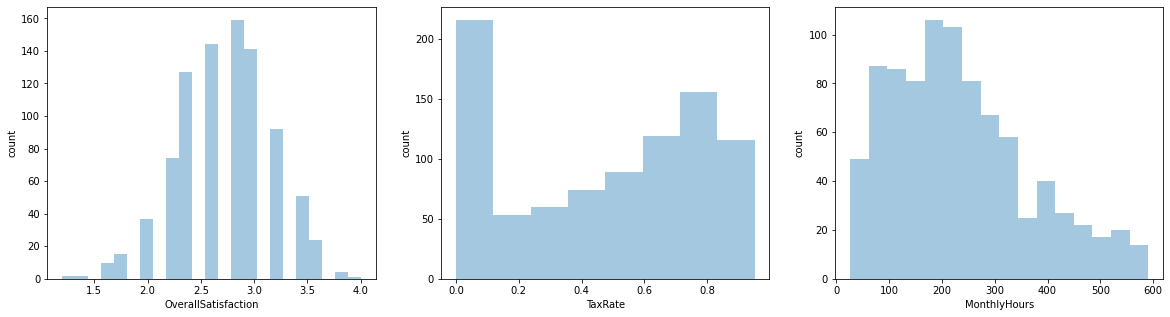

In [195]:
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df_extra["OverallSatisfaction"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df_extra["TaxRate"].dropna(), kde=False)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df_extra["MonthlyHours"].dropna(), kde=False)
plt.ylabel("count")

plt.show()

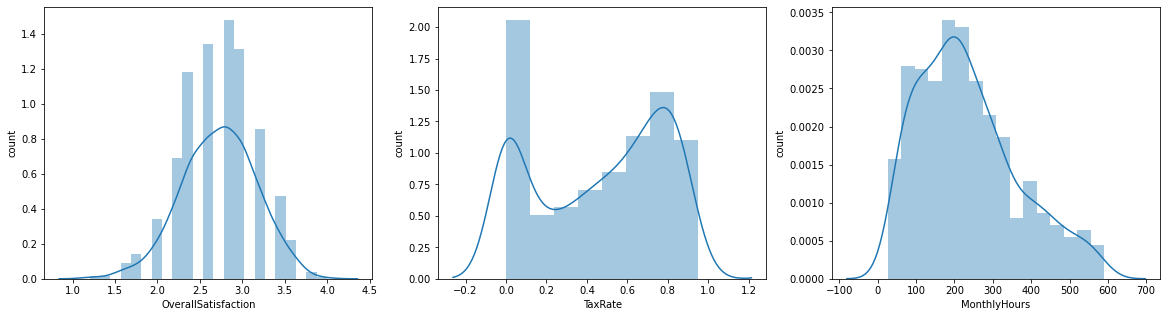

In [196]:
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df_extra["OverallSatisfaction"].dropna(), kde=True)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df_extra["TaxRate"].dropna(), kde=True)
plt.ylabel("count")
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df_extra["MonthlyHours"].dropna(), kde=True)
plt.ylabel("count")

plt.show()

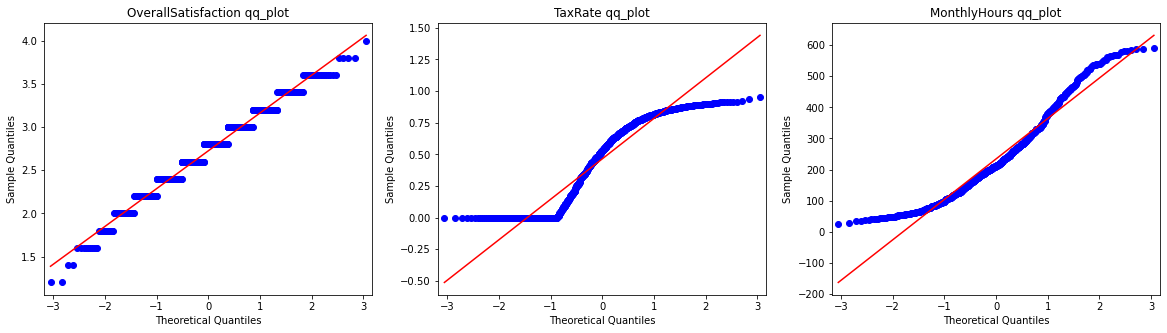

In [197]:
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
qqplot(df_extra["OverallSatisfaction"].dropna(), line='s', ax=ax)
plt.title("OverallSatisfaction" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 1))
qqplot(df_extra["TaxRate"].dropna(), line='s', ax=ax)
plt.title("TaxRate" + " qq_plot")
ax = plt.subplot2grid(fig_dims, (0, 2))
qqplot(df_extra["MonthlyHours"].dropna(), line='s', ax=ax)
plt.title("MonthlyHours" + " qq_plot")

plt.show()

<b> Attrition-JobRole additional plots </b>  
We are interested to find the causes why some employees are leaving the company. To better understand jobrole figures intention to leave the company, we used some 3-dimensioned boxplot and whisker plots.

In [198]:
jobroles = ["Research Director", "Manager", "Sales Executive", "Research Scientist", "Laboratory Technician",
            "Sales Representative", "Manufacturing Director", "Healthcare Representative", "Human Resources"]

In [199]:
mean_attributes = ["JobInvolvement", "JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction", 
                   "WorkLifeBalance", "DistanceFromHome", "Age", "YearsAtCompany", "StockOptionLevel",
                  "PercentSalaryHike", "YearsInCurrentRole", "TrainingTimesLastYear", "MonthlyIncome"]

In [200]:
def print_jobrole_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str)].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == no_str)].shape[0]
    print(jobRole, value1, value2, str(round((value1 / (value1 + value2))*100, 2)) + "%", sep="\t")

for jb in jobroles:
    print_jobrole_attrition(jb)

Research Director	1	50	1.96%
Manager	4	77	4.94%
Sales Executive	44	217	16.86%
Research Scientist	40	200	16.67%
Laboratory Technician	54	158	25.47%
Sales Representative	26	43	37.68%
Manufacturing Director	8	107	6.96%
Healthcare Representative	5	101	4.72%
Human Resources	10	31	24.39%


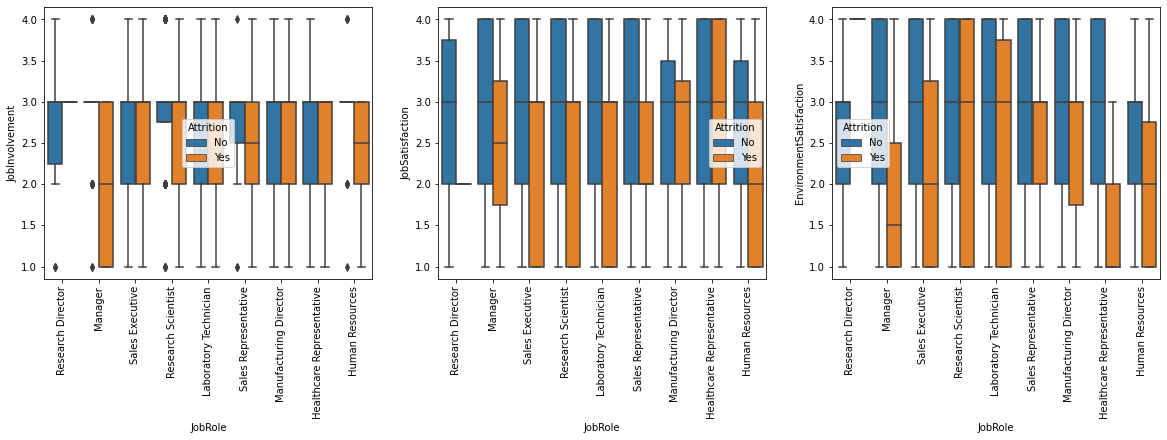

In [201]:
curr_column = "Attrition"
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
ax = sns.boxplot(data=df, x="JobRole", y="JobInvolvement", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 1))
ax = sns.boxplot(data=df, x="JobRole", y="JobSatisfaction", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 2))
ax = sns.boxplot(data=df, x="JobRole", y="EnvironmentSatisfaction", hue=curr_column)
plt.xticks(rotation=90)
plt.show()

In [202]:
df_copy = df.copy()
df_copy["OverallSatisfaction"] = df_extra["OverallSatisfaction"]

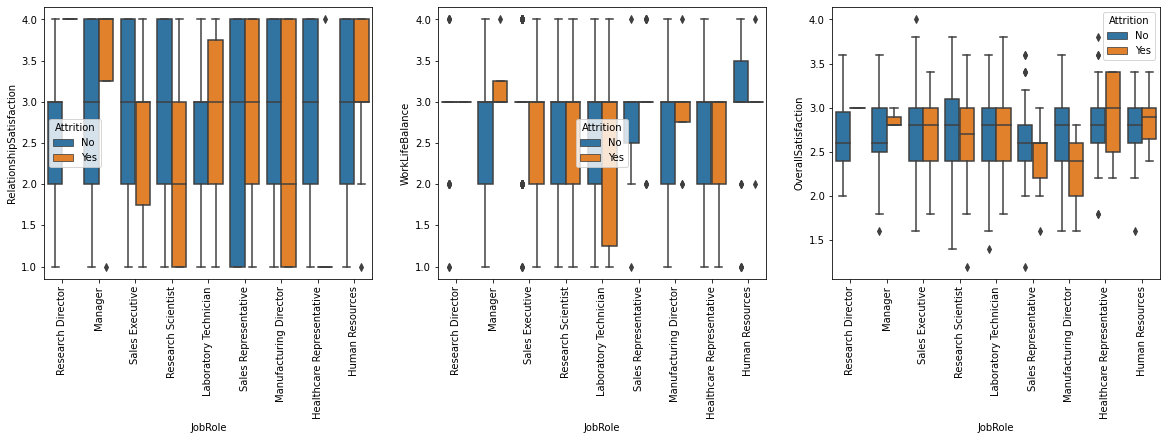

In [203]:
curr_column = "Attrition"
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
ax = sns.boxplot(data=df, x="JobRole", y="RelationshipSatisfaction", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 1))
ax = sns.boxplot(data=df, x="JobRole", y="WorkLifeBalance", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 2))
ax = sns.boxplot(data=df_copy, x="JobRole", y="OverallSatisfaction", hue=curr_column)
plt.xticks(rotation=90)

plt.show()

In [204]:
def print_mean_attrition(attribute, jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str)][[attribute]]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == no_str)] [[attribute]]
    print(jobRole,  value1.shape[0], value2.shape[0], round(float(value1.mean()), 2), 
          round(float(value2.mean()), 2), sep="\t")

for ma in mean_attributes: 
    print("\n\t", ma, "\t", sep="\t")
    for jr in jobroles:
        print_mean_attrition(ma, jr)


		JobInvolvement		
Research Director	1	50	3.0	2.8
Manager	4	77	2.0	2.82
Sales Executive	44	217	2.52	2.76
Research Scientist	40	200	2.52	2.88
Laboratory Technician	54	158	2.57	2.73
Sales Representative	26	43	2.42	2.72
Manufacturing Director	8	107	2.62	2.69
Healthcare Representative	5	101	2.4	2.75
Human Resources	10	31	2.4	2.9

		JobSatisfaction		
Research Director	1	50	2.0	2.66
Manager	4	77	2.5	2.75
Sales Executive	44	217	2.48	2.76
Research Scientist	40	200	2.4	2.85
Laboratory Technician	54	158	2.46	2.78
Sales Representative	26	43	2.31	2.84
Manufacturing Director	8	107	2.75	2.64
Healthcare Representative	5	101	2.8	2.68
Human Resources	10	31	2.1	2.68

		EnvironmentSatisfaction		
Research Director	1	50	4.0	2.54
Manager	4	77	2.0	2.86
Sales Executive	44	217	2.41	2.71
Research Scientist	40	200	2.6	2.72
Laboratory Technician	54	158	2.46	2.82
Sales Representative	26	43	2.5	2.74
Manufacturing Director	8	107	2.5	2.93
Healthcare Representative	5	101	1.6	2.83
Human Resources	10	31	2.1	2.71

		Rel

In [205]:
df_copy = df.copy() 
df_copy["Gender"] = df_copy["Gender"].fillna("Male")
df_copy["BusinessTravel"] = df_copy["BusinessTravel"].fillna("Travel_Rarely")
df_copy["MaritalStatus"] = df_copy["MaritalStatus"].fillna("Married")

encoder = OrdinalEncoder(categories=[['No', 'Yes']]) 
df_copy["OverTime"] = encoder.fit_transform(df_copy["OverTime"].values.reshape(-1,1))[:,0].astype(int)

encoder = OrdinalEncoder(categories=[['Male', 'Female']])   
df_copy["Gender"] = encoder.fit_transform(df_copy["Gender"].values.reshape(-1,1))[:,0].astype(int)

categories_list = ["Non-Travel", "Travel_Rarely", "Travel_Frequently"] 
encoder = OrdinalEncoder(categories=[categories_list])   
df_copy["BusinessTravel"] = encoder.fit_transform(df_copy["BusinessTravel"].values.reshape(-1,1))[:,0].astype(int)

categories_list = ["Single", "Married", "Divorced"]
encoder = OrdinalEncoder(categories=[categories_list])  
df_copy["MaritalStatus"] = encoder.fit_transform(df_copy["MaritalStatus"].values.reshape(-1,1))[:,0].astype(int)

encoder = OrdinalEncoder()
df_copy["Department"] = encoder.fit_transform(df_copy["Department"].values.reshape(-1,1))[:,0].astype(int)

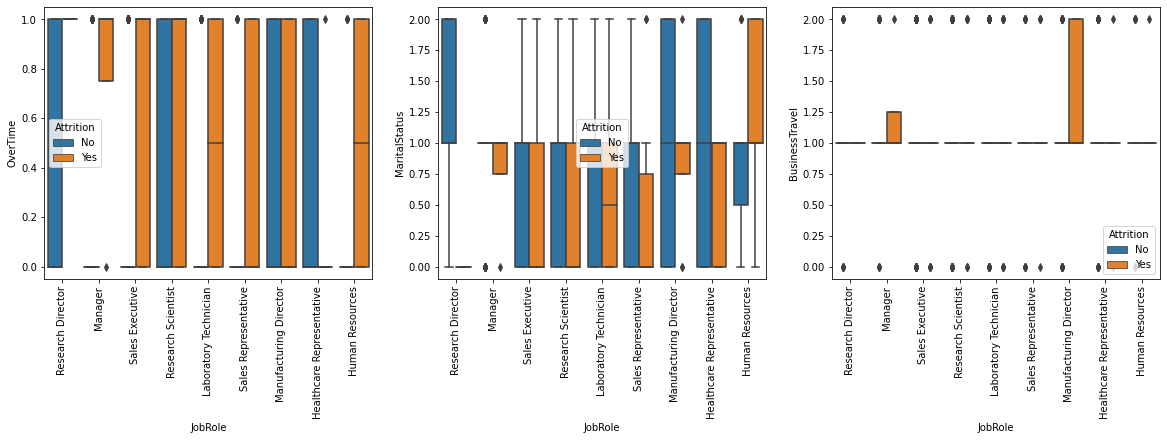

In [206]:
curr_column = "Attrition"
fig =plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
ax = sns.boxplot(data=df_copy, x="JobRole", y="OverTime", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 1))
ax = sns.boxplot(data=df_copy, x="JobRole", y="MaritalStatus", hue=curr_column)
plt.xticks(rotation=90)

ax = plt.subplot2grid(fig_dims, (0, 2))
ax = sns.boxplot(data=df_copy, x="JobRole", y="BusinessTravel", hue=curr_column)
plt.xticks(rotation=90)

plt.show()

In [207]:
def print_gender_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["Gender"] == "Male")].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["Gender"] == "Female")].shape[0]
    print(jobRole, value1, value2, str(round((value1 / (value1 + value2))*100, 2)) + "%",
          str(round((value2 / (value1 + value2))*100, 2)) + "%", sep="\t")


for jr in jobroles:
    print_gender_attrition(jr)

Research Director	1	0	100.0%	0.0%
Manager	1	3	25.0%	75.0%
Sales Executive	27	14	65.85%	34.15%
Research Scientist	23	16	58.97%	41.03%
Laboratory Technician	26	24	52.0%	48.0%
Sales Representative	15	10	60.0%	40.0%
Manufacturing Director	4	2	66.67%	33.33%
Healthcare Representative	5	0	100.0%	0.0%
Human Resources	7	3	70.0%	30.0%


In [208]:
def print_overtime_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["OverTime"] == yes_str)].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["OverTime"] == no_str)].shape[0]
    print(jobRole, value1, value2, str(round((value1 / (value1 + value2))*100, 2)) + "%", sep="\t")

for jr in jobroles:
    print_overtime_attrition(jr)

Research Director	1	0	100.0%
Manager	3	1	75.0%
Sales Executive	24	20	54.55%
Research Scientist	27	13	67.5%
Laboratory Technician	27	27	50.0%
Sales Representative	12	14	46.15%
Manufacturing Director	3	5	37.5%
Healthcare Representative	1	4	20.0%
Human Resources	5	5	50.0%


In [209]:
def print_maritalstatus_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["MaritalStatus"] == "Married")].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["MaritalStatus"] != "Married")].shape[0]
    print(jobRole, value1, value2, str(round((value1 / (value1 + value2))*100, 2)) + "%", sep="\t")

for jr in jobroles:
    print_maritalstatus_attrition(jr)

Research Director	0	1	0.0%
Manager	3	1	75.0%
Sales Executive	16	28	36.36%
Research Scientist	13	27	32.5%
Laboratory Technician	17	37	31.48%
Sales Representative	5	21	19.23%
Manufacturing Director	5	3	62.5%
Healthcare Representative	3	2	60.0%
Human Resources	5	5	50.0%


In [210]:
def print_businesstarvel_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["BusinessTravel"] == "Travel_Frequently")].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["BusinessTravel"] != "Travel_Frequently")].shape[0]
    print(jobRole, value1, value2, str(round((value1 / (value1 + value2))*100, 2)) + "%", sep="\t")

for jr in jobroles:
    print_businesstarvel_attrition(jr)

Research Director	0	1	0.0%
Manager	1	3	25.0%
Sales Executive	7	37	15.91%
Research Scientist	6	34	15.0%
Laboratory Technician	9	45	16.67%
Sales Representative	4	22	15.38%
Manufacturing Director	3	5	37.5%
Healthcare Representative	1	4	20.0%
Human Resources	1	9	10.0%


In [211]:
def print_department_attrition(jobRole):
    yes_str = "Yes"
    no_str = "No"
    value1 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["Department"] == "Research & Development")].shape[0]
    value2 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["Department"] == "Sales")].shape[0]
    value3 = df[(df["JobRole"] == jobRole) & (df["Attrition"] == yes_str) & (df["Department"] == "Human Resources")].shape[0]
    print(jobRole, value1, value2, value3, str(round((value1 / (value1 + value2 + value3))*100, 2)) + "%",
          str(round((value2 / (value1 + value2 + value3))*100, 2)) + "%", 
          str(round((value3 / (value1 + value2 + value3))*100, 2)) + "%",sep="\t")

for jr in jobroles:
    print_department_attrition(jr)

Research Director	1	0	0	100.0%	0.0%	0.0%
Manager	2	2	0	50.0%	50.0%	0.0%
Sales Executive	0	44	0	0.0%	100.0%	0.0%
Research Scientist	40	0	0	100.0%	0.0%	0.0%
Laboratory Technician	54	0	0	100.0%	0.0%	0.0%
Sales Representative	0	26	0	0.0%	100.0%	0.0%
Manufacturing Director	8	0	0	100.0%	0.0%	0.0%
Healthcare Representative	5	0	0	100.0%	0.0%	0.0%
Human Resources	0	0	10	0.0%	0.0%	100.0%


<h6> General insight </h6>

In [212]:
def draw_stacked_bar(column_name1, column_name2, df1, df2, annotate_flag, ax, xticks_rotation, loc, cmap, title):
    
    patch_handles = []
    frames = [df1[[column_name1]], df2[[column_name2]]]
    concat_df = pd.concat(frames, axis=1)  # merge Dataframes across columns
    
    # get a frequency table of  column_name1 and column_name2
    pclass_xt = pd.crosstab(concat_df[column_name1], concat_df[column_name2]).dropna()
    if cmap != "":
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax, cmap=cmap))
    else:
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax))
    plt.xlabel(column_name1)
    plt.ylabel('count')
    plt.xticks(rotation=xticks_rotation)
    
    # get sub-DataFrame made out by column_name1 and column_name2 concatenation, without NaN values
    curr_df = concat_df[[column_name1, column_name2]].dropna()
    unique_values = sorted(curr_df[column_name1].unique())  # alphabetical order
    tmp_xticks_tot_elements = {}

    # search all of the bar segments and annotate
    for rec in ax.patches:
        height = rec.get_height()
        x = rec.get_x() + rec.get_width() / 2
        y = rec.get_y() + height / 2
        current_value = unique_values[int(x)]  # index with xticks unique column_name1's values
        tot_current_value = curr_df[curr_df[column_name1] == current_value][column_name1].shape[0] 
        percentage =  "{:.0f}%".format(height /tot_current_value*100)

        try:
            tmp_count = tmp_xticks_tot_elements[str(x)]
            tmp_count += height
            tmp_xticks_tot_elements[str(x)] = tmp_count
        except KeyError:
             tmp_xticks_tot_elements[str(x)] = height

        if annotate_flag:
            ax.text(x, y, percentage, ha='center', va='bottom')

    # put total number of elements on top of each bar
    for x, tot_x in tmp_xticks_tot_elements.items():
        ax.text(float(x), tot_x, str(int(tot_x)), ha='center', va='bottom')
        
    # adjust legend's position
    if loc != "":
        plt.legend(title=column_name2, loc=loc)
        
    plt.title(title)

In [213]:
def draw_stacked_attrition(column_name, ax):
    df2 = pd.crosstab(df[column_name], df["Attrition"])
    df2.plot.bar(stacked=True, ax=ax)
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title(label="Attrition by " + column_name)

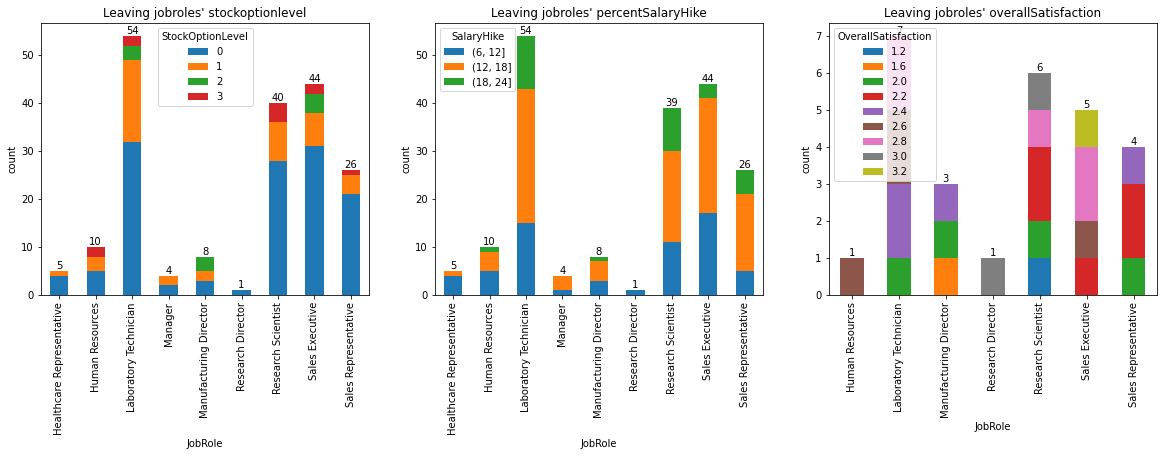

In [214]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "StockOptionLevel", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], 
                 False, ax, 90, "", "", "Leaving jobroles' stockoptionlevel")
ax = plt.subplot2grid(fig_dims, (0, 1))
df_hike = df.copy()
df_hike["SalaryHike"] = pd.cut(x=df["PercentSalaryHike"], bins=[6, 12, 18, 24])
draw_stacked_bar(curr_column, "SalaryHike", df[df["Attrition"] == "Yes"], 
                 df_hike[df_hike["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' percentSalaryHike")
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverallSatisfaction", df[df["Attrition"] == "Yes"], 
                 df_extra[df_extra["Attrition"] == 1], False, ax, 90, "", "", "Leaving jobroles' overallSatisfaction")

In [215]:
df[(df["Attrition"] == "Yes")  & (df["StockOptionLevel"] > 0)].shape[0]

65

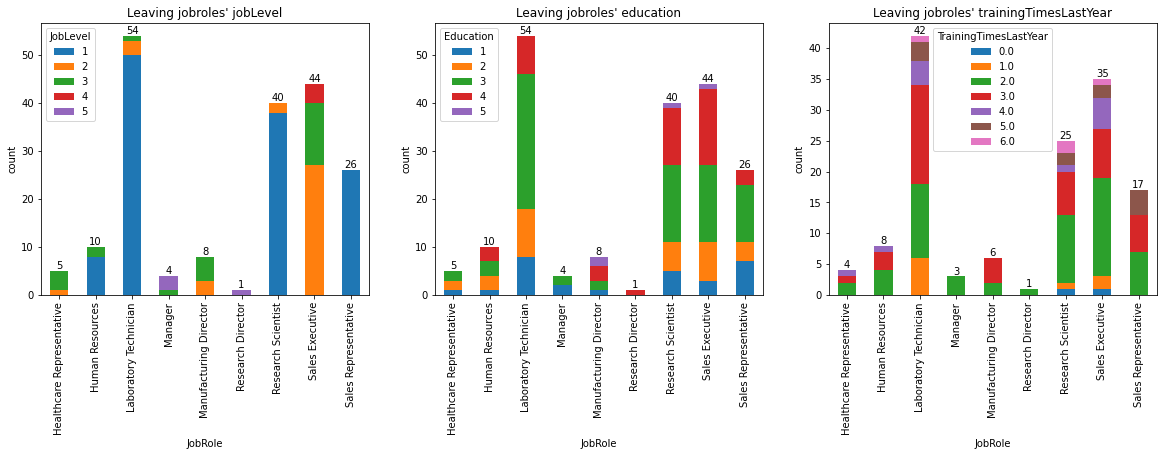

In [216]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobLevel", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' jobLevel")
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "Education", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' education")
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "TrainingTimesLastYear", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "upper center", "",
                                                                         "Leaving jobroles' trainingTimesLastYear")

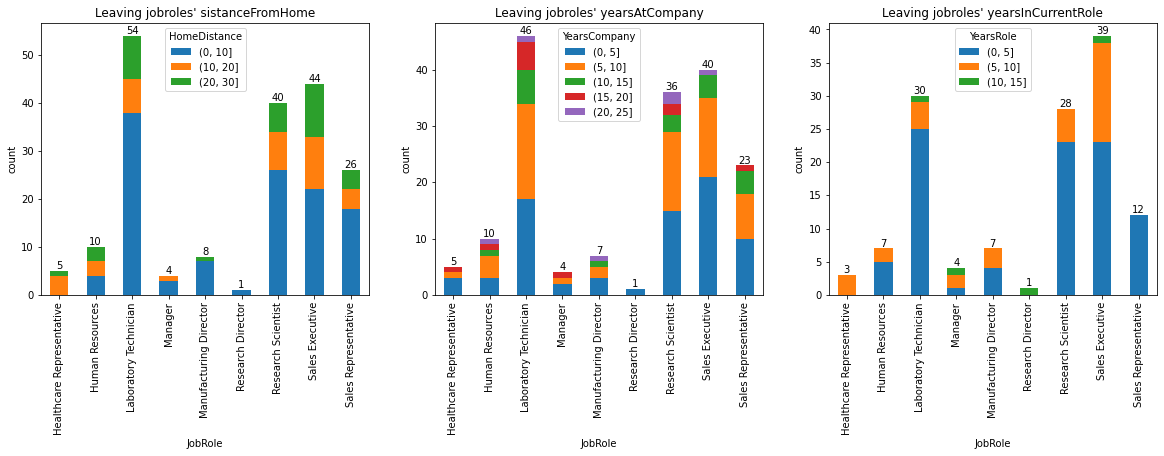

In [217]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_dist = df.copy()
df_dist["HomeDistance"] = pd.cut(x=df["DistanceFromHome"], bins=[0, 10, 20, 30])
draw_stacked_bar(curr_column, "HomeDistance", df[df["Attrition"] == "Yes"], 
                 df_dist[df_dist["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' sistanceFromHome")
ax = plt.subplot2grid(fig_dims, (0, 1))
df_yc = df.copy()
df_yc["YearsCompany"] = pd.cut(x=df["YearsAtCompany"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsCompany", df[df["Attrition"] == "Yes"], 
                 df_yc[df_yc["Attrition"] == "Yes"], False, ax, 90, "upper center", "", 
                                                                         "Leaving jobroles' yearsAtCompany")
ax = plt.subplot2grid(fig_dims, (0, 2))
df_yr = df.copy()
df_yr["YearsRole"] = pd.cut(x=df["YearsInCurrentRole"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsRole", df[df["Attrition"] == "Yes"], 
                 df_yr[df_yr["Attrition"] == "Yes"], False, ax, 90, "upper center", "",
                                                                         "Leaving jobroles' yearsInCurrentRole")

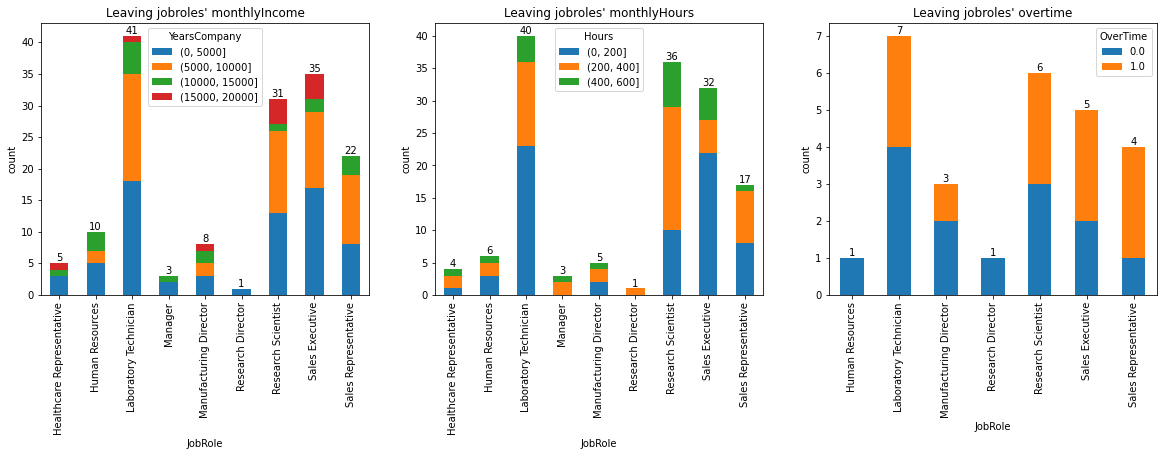

In [218]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_income = df.copy()
df_income["YearsCompany"] = pd.cut(x=df["MonthlyIncome"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
draw_stacked_bar(curr_column, "YearsCompany", df[df["Attrition"] == "Yes"], 
                 df_income[df_income["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' monthlyIncome")
ax = plt.subplot2grid(fig_dims, (0, 1))
df_h = df.copy()
df_h["Hours"] = pd.cut(x=df_extra["MonthlyHours"], bins=[0, 200, 400, 600, 800, 1000])
draw_stacked_bar(curr_column, "Hours", df[df["Attrition"] == "Yes"], 
                 df_h[df_h["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' monthlyHours")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverTime", df[df["Attrition"] == "Yes"], 
                 df_extra[df_extra["Attrition"] == 1], False, ax, 90, "", "",   "Leaving jobroles' overtime")

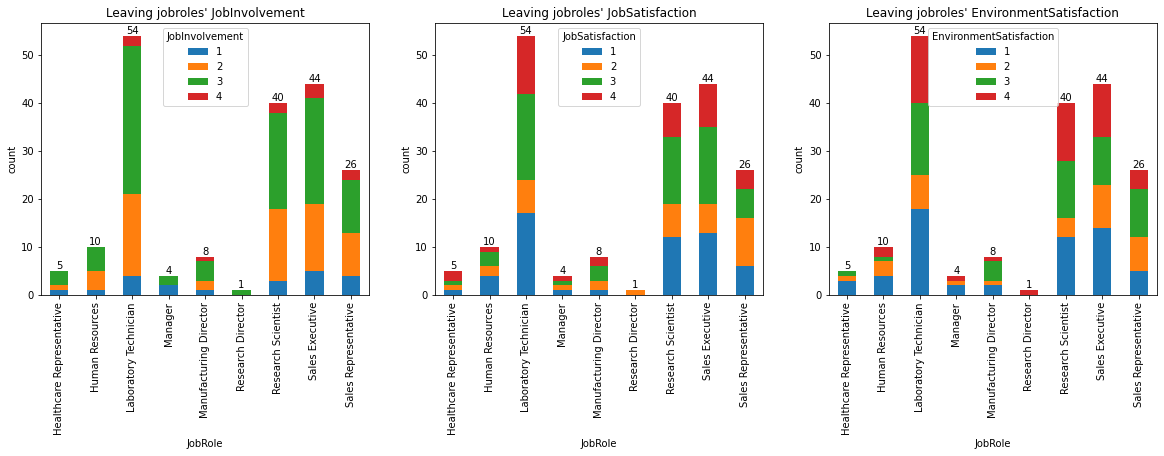

In [219]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobInvolvement", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' JobInvolvement")
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "JobSatisfaction", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' JobSatisfaction")
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "EnvironmentSatisfaction", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "upper center", "",
                                                            "Leaving jobroles' EnvironmentSatisfaction")

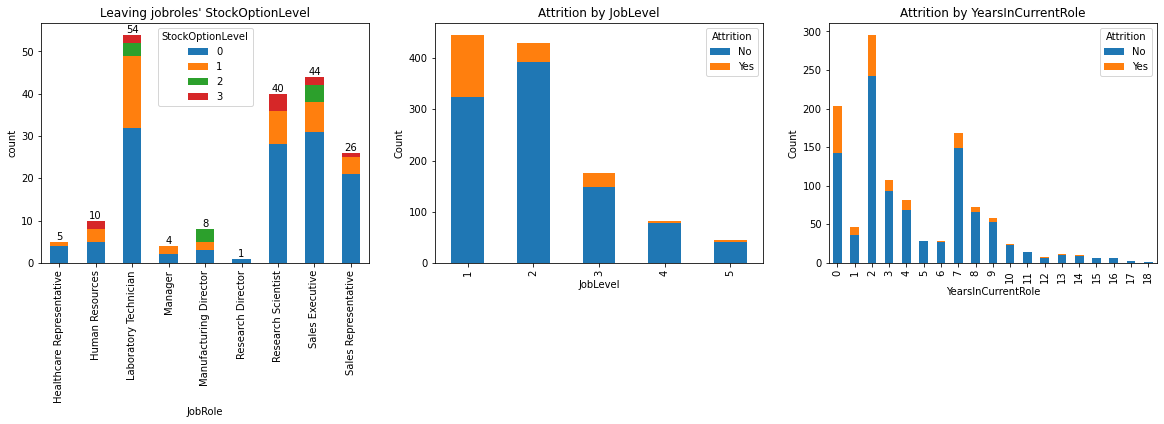

In [220]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar("JobRole", "StockOptionLevel", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "upper center", "",
                                                                "Leaving jobroles' StockOptionLevel")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("JobLevel", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("YearsInCurrentRole", ax)
plt.show()

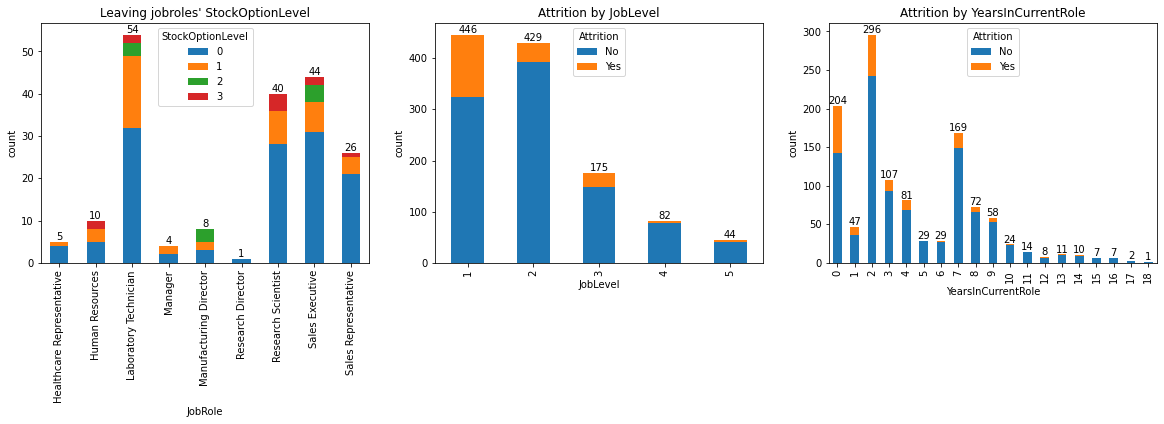

In [221]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar("JobRole", "StockOptionLevel", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "upper center", "",
                                                                "Leaving jobroles' StockOptionLevel")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar("JobLevel", "Attrition", df, 
                 df, False, ax, 90, "upper center", "","Attrition by JobLevel")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar("YearsInCurrentRole", "Attrition", df, 
                 df, False, ax, 90, "upper center", "","Attrition by YearsInCurrentRole")
plt.show()

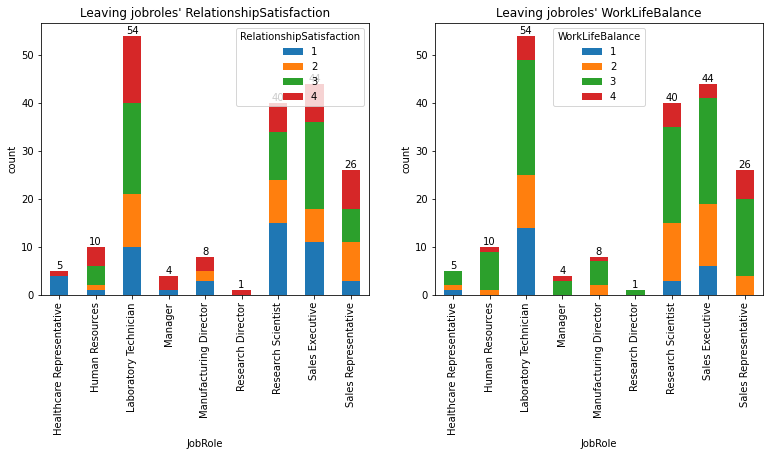

In [222]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "RelationshipSatisfaction", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                "Leaving jobroles' RelationshipSatisfaction")
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "WorkLifeBalance", df[df["Attrition"] == "Yes"], 
                 df[df["Attrition"] == "Yes"], False, ax, 90, "", "",
                                                                         "Leaving jobroles' WorkLifeBalance")

In [230]:
def draw_attrition_comparison(column_name, curr_tmp):
    fig =plt.subplots(figsize=(10, 10))
    fig_dims = (2, 2)

    ax = plt.subplot2grid(fig_dims, (0, 0))
    x = curr_tmp[curr_tmp["Attrition"] == "Yes"][column_name]
    sns.distplot(x, kde=False)
    ax.axvline(x.mean(), color='r', linestyle='--', label=str(round(x.mean(), 2)) + " mean")
    ax.axvline(x.median(), color='g', linestyle='-', label=str(round(x.median(), 2)) + " median")
    # ax.axvline(x.mode(), color='b', linestyle='-', label="mode")
    plt.ylabel("Yes Attrition")
    plt.legend()

    ax = plt.subplot2grid(fig_dims, (0, 1))
    x = curr_tmp[curr_tmp["Attrition"] == "No"][column_name]
    sns.distplot(x, kde=False)
    ax.axvline(x.mean(), color='r', linestyle='--', label=str(round(x.mean(), 2)) + " mean")
    ax.axvline(x.median(), color='g', linestyle='-', label=str(round(x.median(), 2)) + " median")
    # ax.axvline(x.mode(), color='b', linestyle='-', label="mode")
    plt.ylabel("No Attrition")
    plt.legend()

    plt.show()

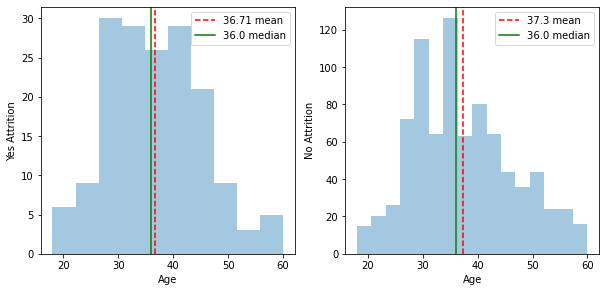

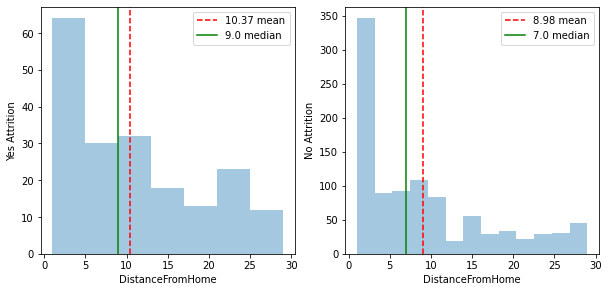

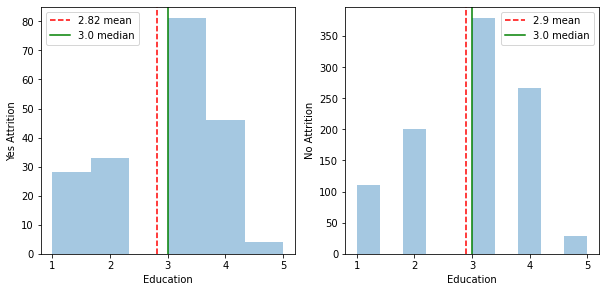

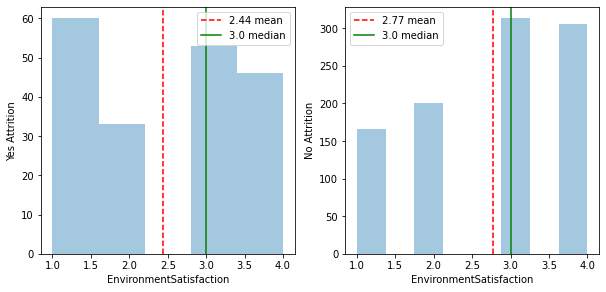

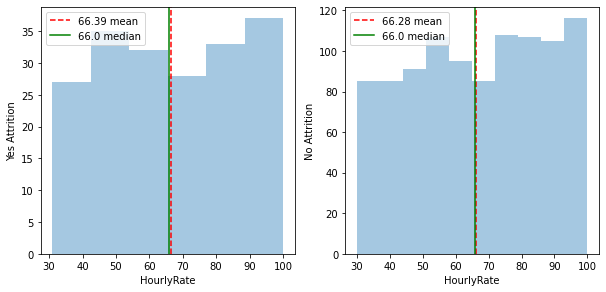

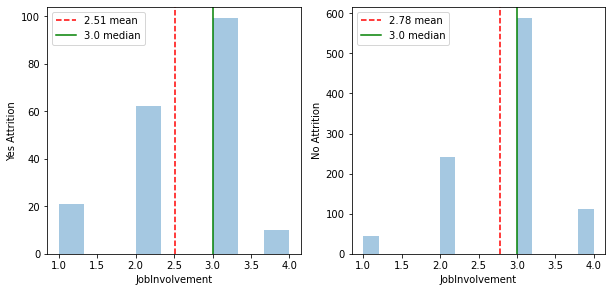

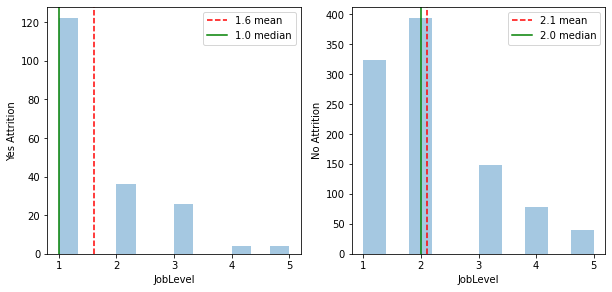

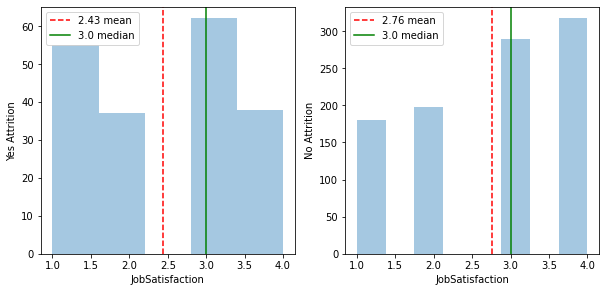

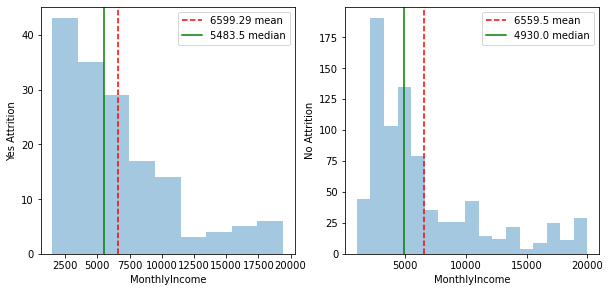

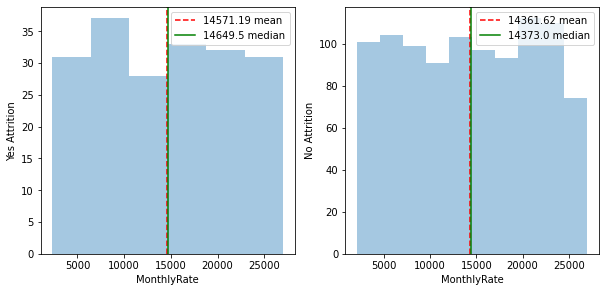

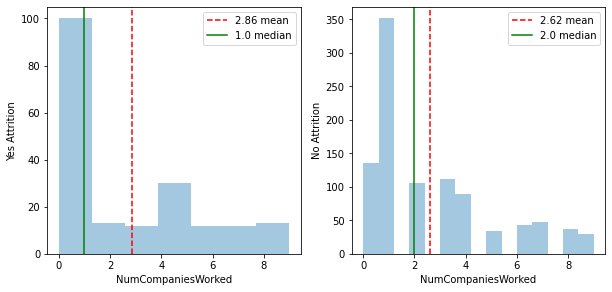

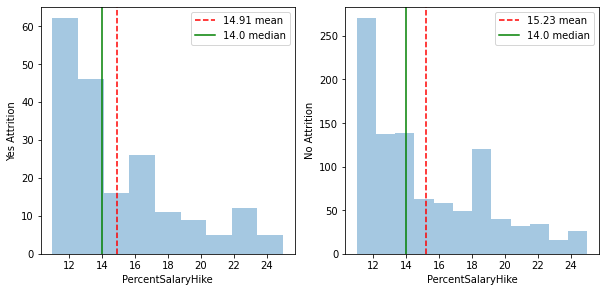

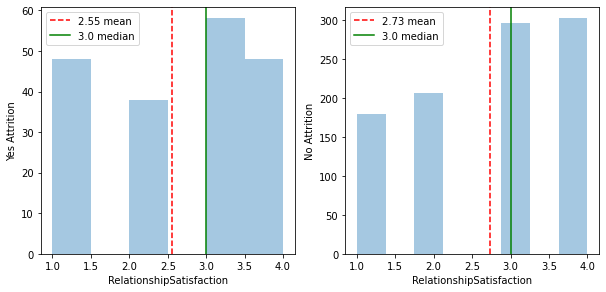

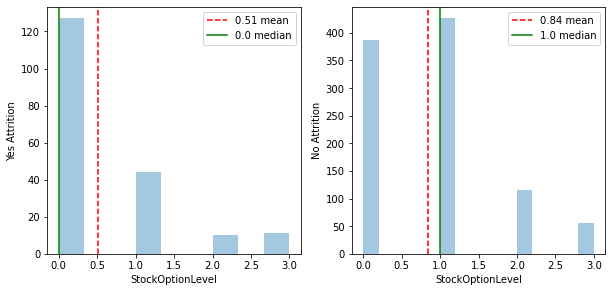

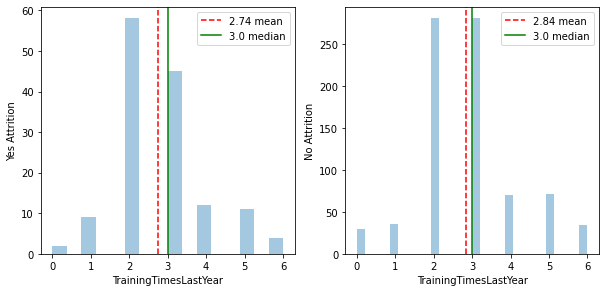

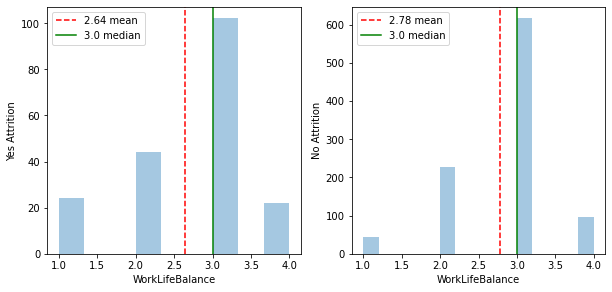

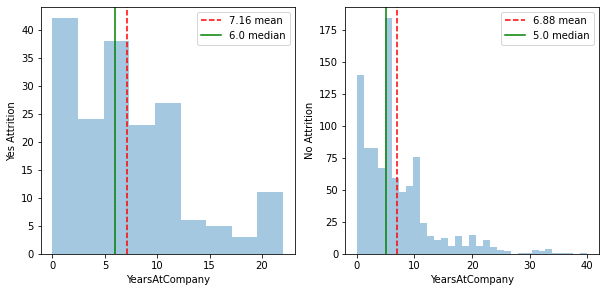

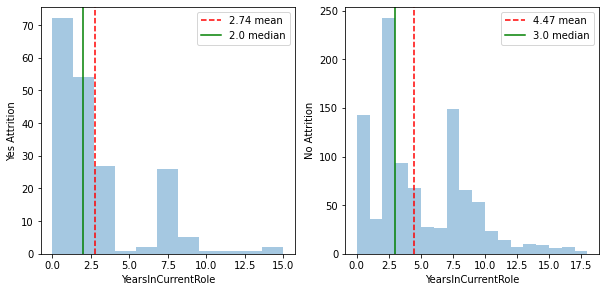

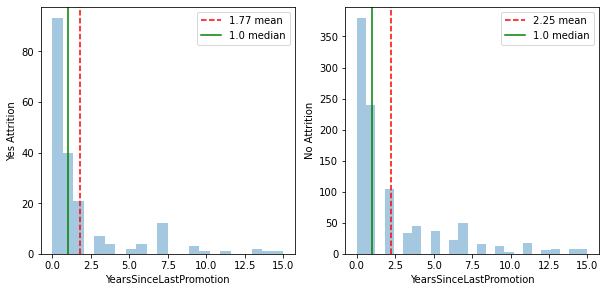

In [231]:
for column_name in list(df_impunted.columns):
    if column_name != "Attrition" and column_name != "BusinessTravel" and column_name != "Department" and \
    column_name != "EducationField" and column_name != "JobRole" and column_name != 'MonthlyHours' and \
    column_name != "MaritalStatus" and column_name != "TaxRate" and column_name != "OverallSatisfaction" and \
    column_name != "Gender" and column_name != "OverTime":
        draw_attrition_comparison(column_name, df)

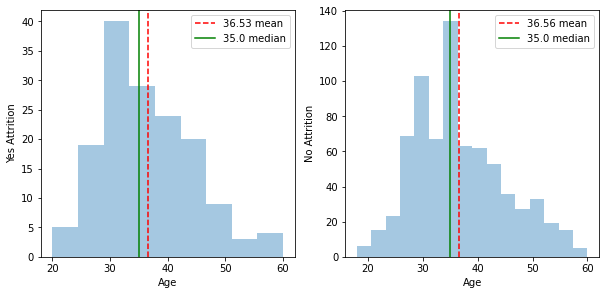

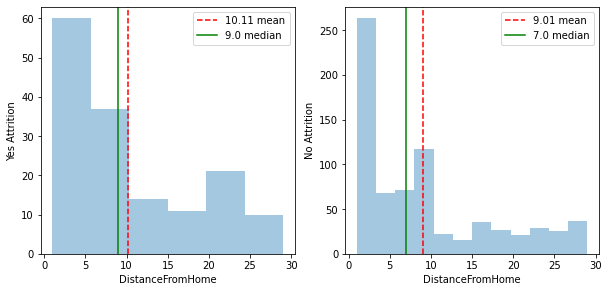

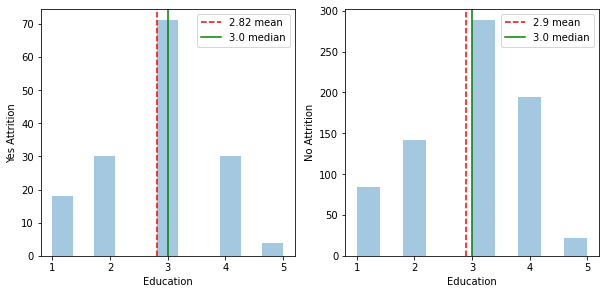

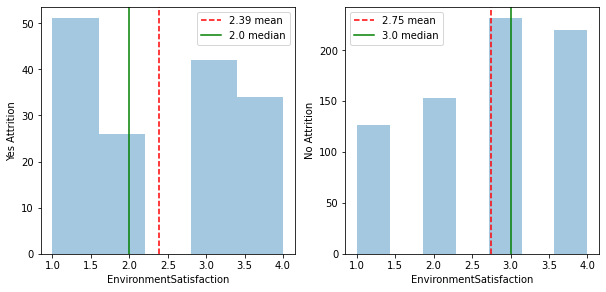

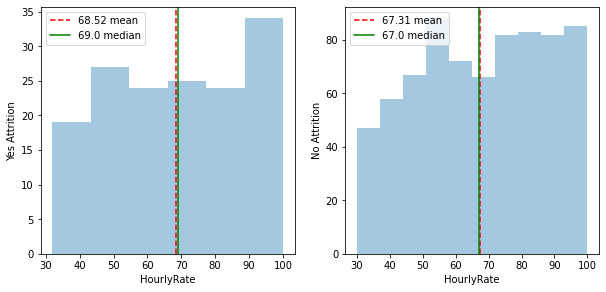

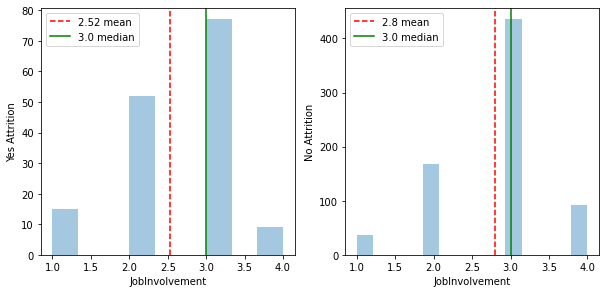

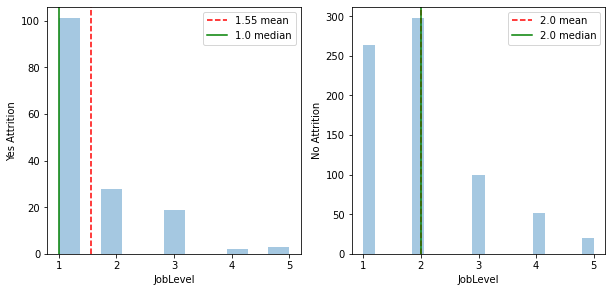

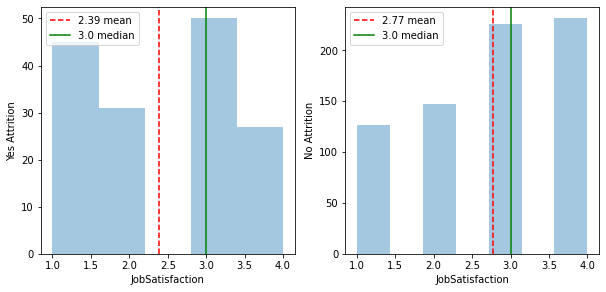

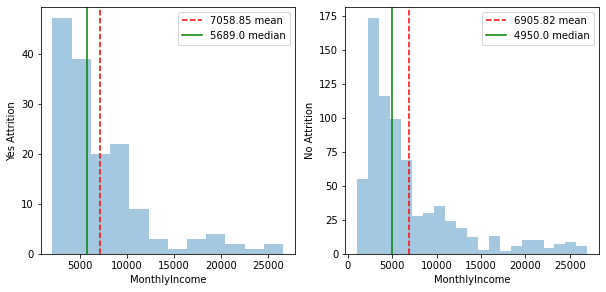

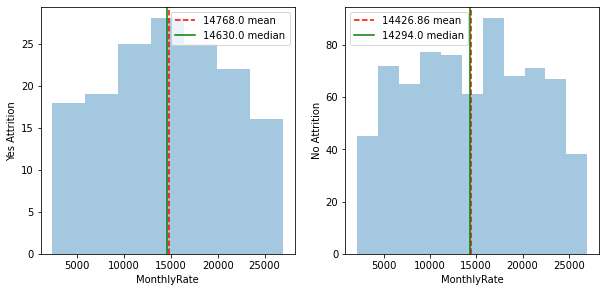

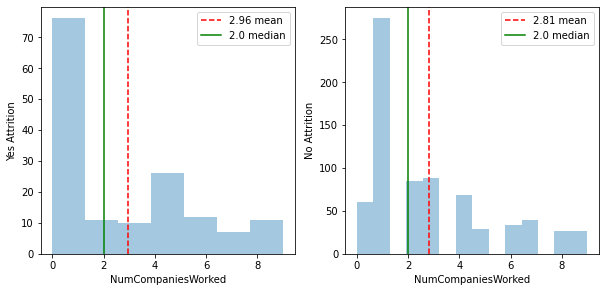

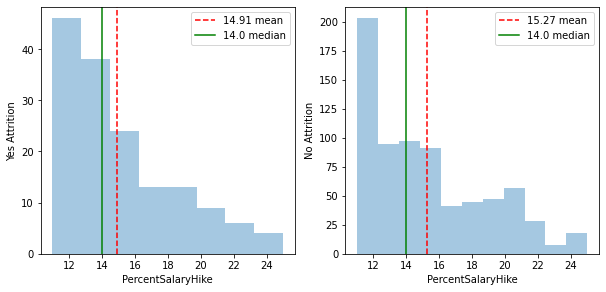

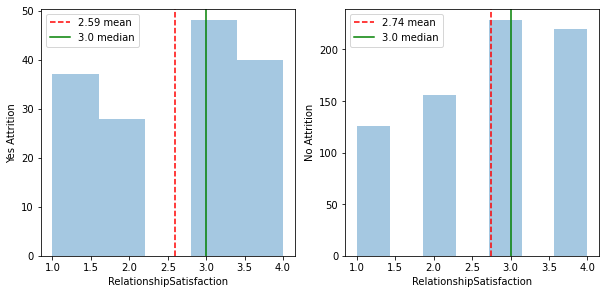

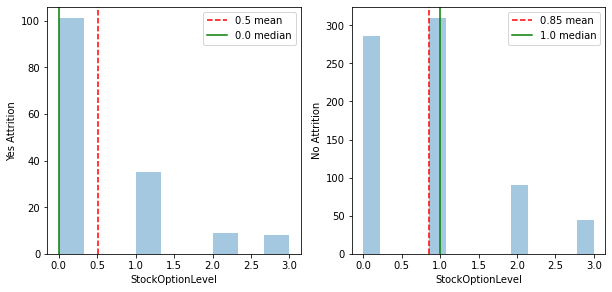

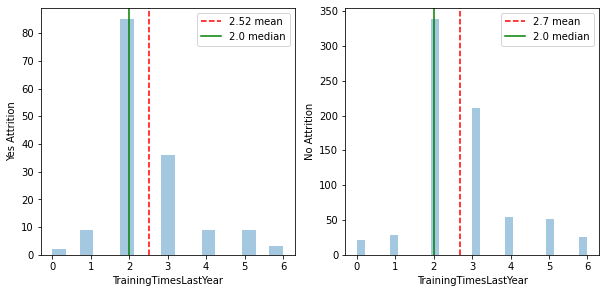

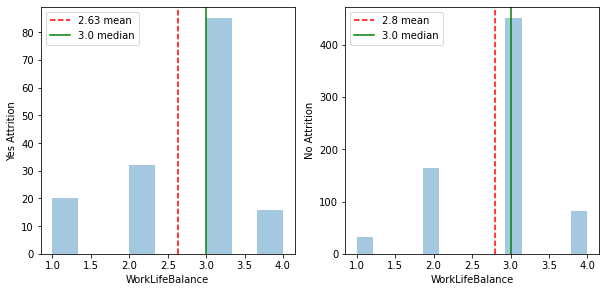

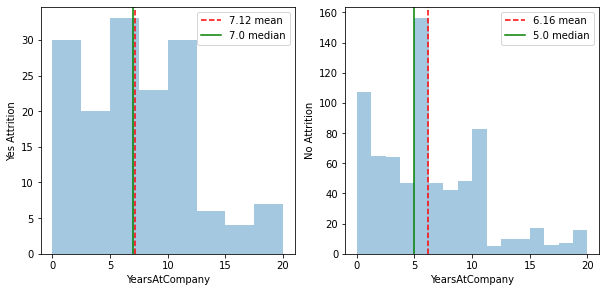

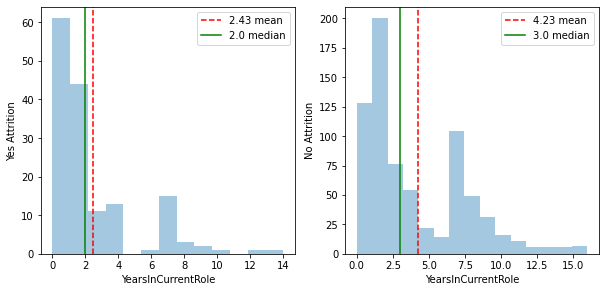

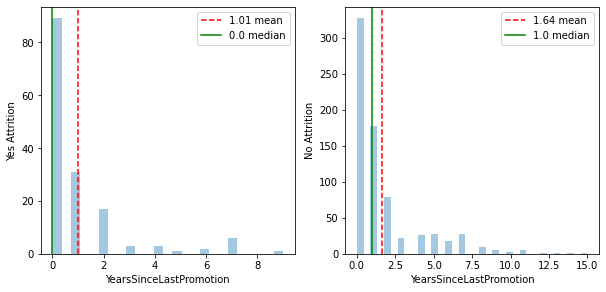

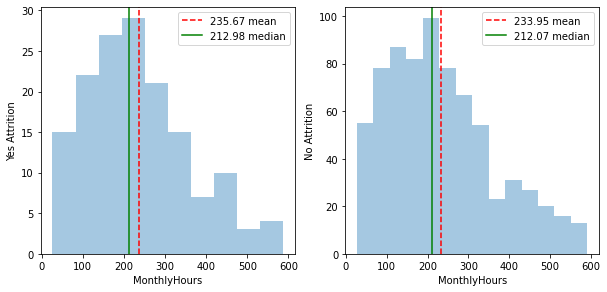

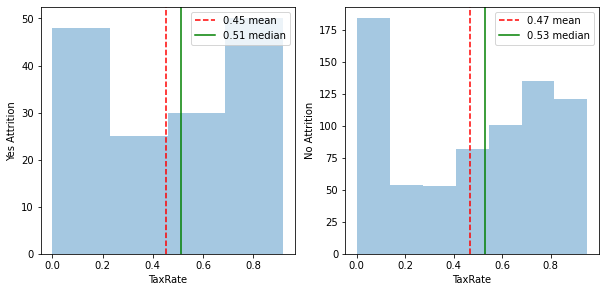

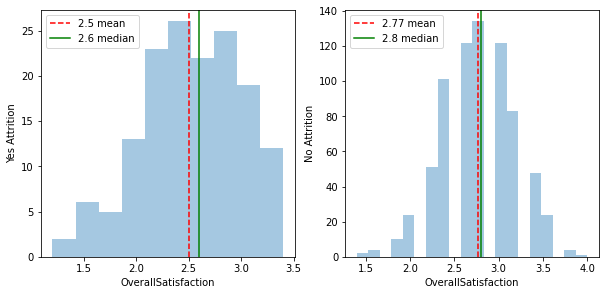

In [232]:
for column_name in list(df_impunted.columns):
    if column_name != "Attrition" and column_name != "BusinessTravel" and column_name != "Department" and \
    column_name != "EducationField" and column_name != "JobRole" and column_name != "MaritalStatus" and \
    column_name != "Gender" and column_name != "OverTime":
        draw_attrition_comparison(column_name, df_impunted)

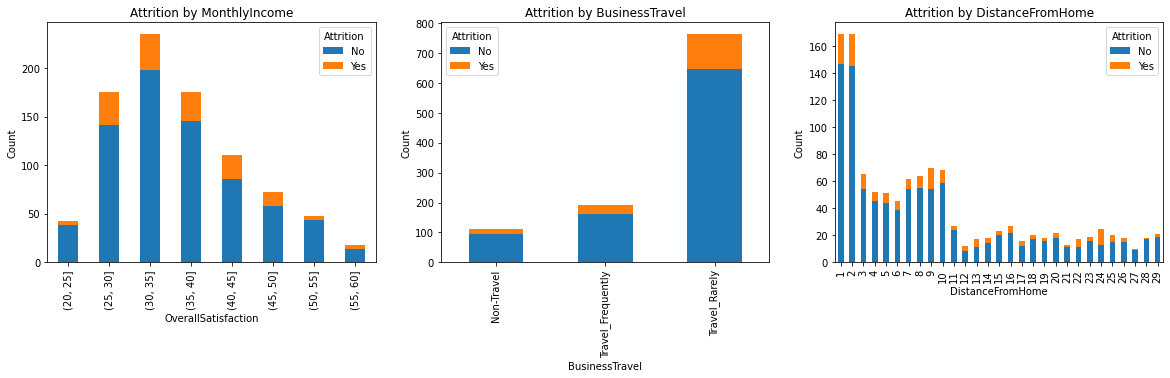

In [233]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_y = pd.DataFrame()
df_y["Age"] = pd.cut(x=df_impunted["Age"], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60])
df2 = pd.crosstab(df_y["Age"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("OverallSatisfaction")
plt.ylabel("Count")
plt.title(label="Attrition by " + "MonthlyIncome")


ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("BusinessTravel", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("DistanceFromHome", ax)
plt.show()

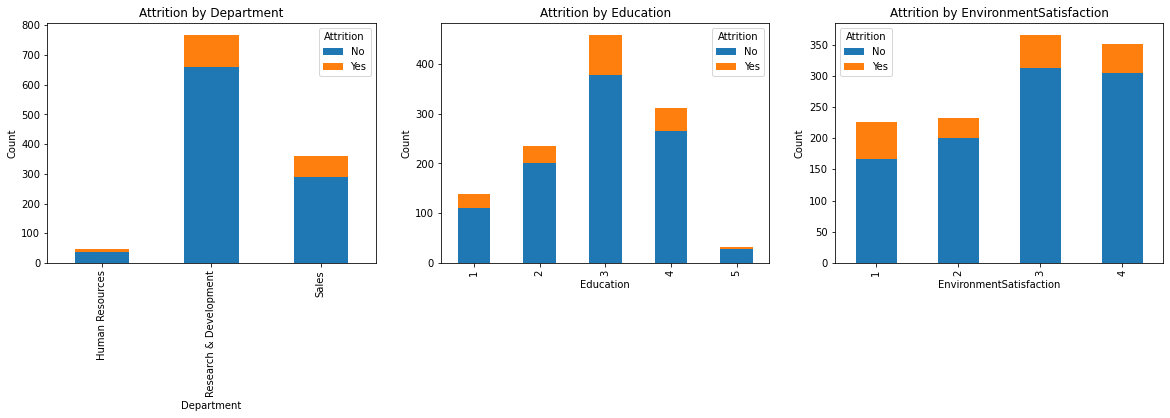

In [234]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("Department", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("Education", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("EnvironmentSatisfaction", ax)
plt.show()

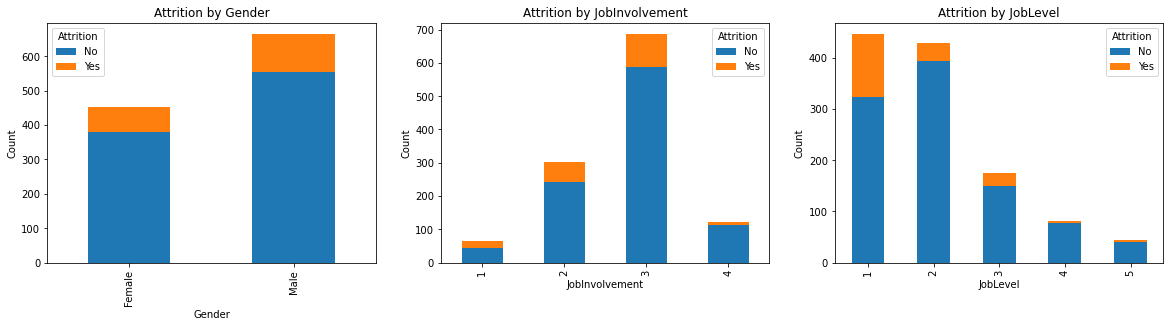

In [235]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("Gender", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("JobInvolvement", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("JobLevel", ax)
plt.show()

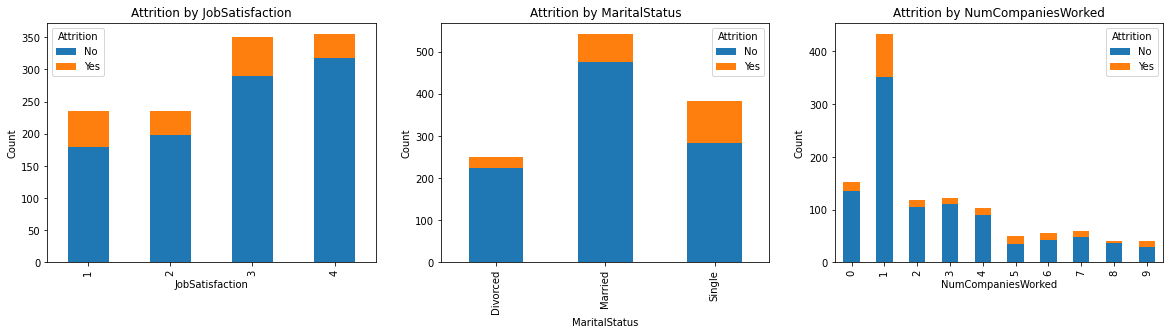

In [236]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("JobSatisfaction", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("MaritalStatus", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("NumCompaniesWorked", ax)
plt.show()

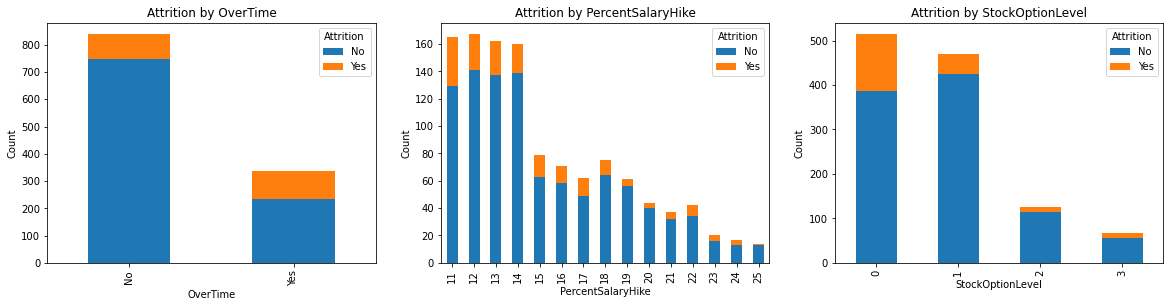

In [237]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("OverTime", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("PercentSalaryHike", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("StockOptionLevel", ax)
plt.show()

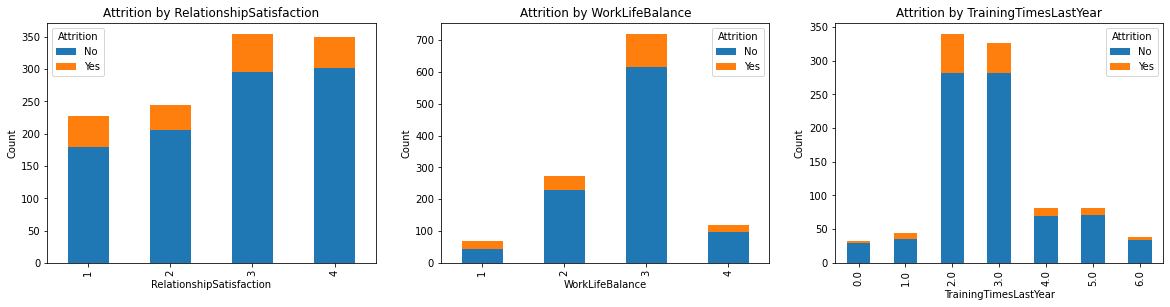

In [238]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("RelationshipSatisfaction", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("WorkLifeBalance", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("TrainingTimesLastYear", ax)
plt.show()

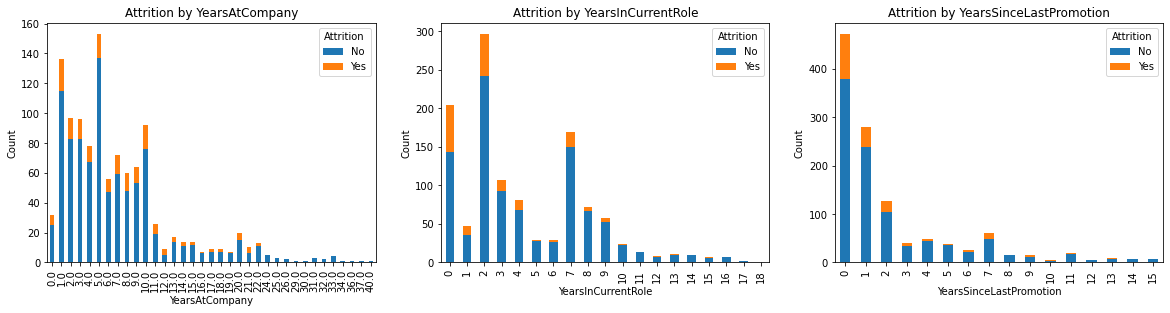

In [239]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("YearsAtCompany", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("YearsInCurrentRole", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("YearsSinceLastPromotion", ax)
plt.show()

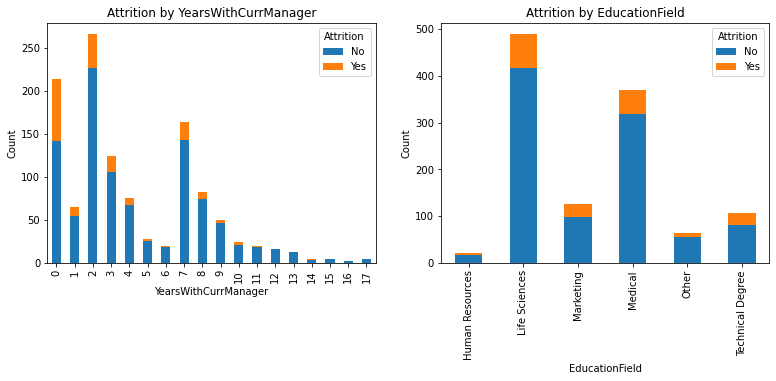

In [240]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("YearsWithCurrManager", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("EducationField", ax)

plt.show()

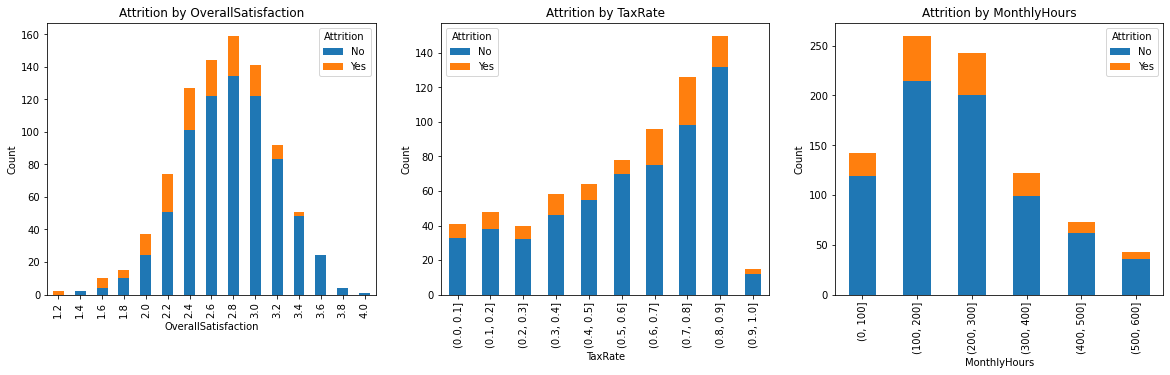

In [241]:
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df2 = pd.crosstab(df_impunted["OverallSatisfaction"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("OverallSatisfaction")
plt.ylabel("Count")
plt.title(label="Attrition by " + "OverallSatisfaction")

ax = plt.subplot2grid(fig_dims, (0, 1))
df_r = pd.DataFrame()
df_r["TaxRate"] = pd.cut(x=df_impunted["TaxRate"], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
df2 = pd.crosstab(df_r["TaxRate"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("TaxRate")
plt.ylabel("Count")
plt.title(label="Attrition by " + "TaxRate")

ax = plt.subplot2grid(fig_dims, (0, 2))
df_h = pd.DataFrame()
df_h["MonthlyHours"] = pd.cut(x=df_impunted["MonthlyHours"], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800])
df2 = pd.crosstab(df_h["MonthlyHours"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("MonthlyHours")
plt.ylabel("Count")
plt.title(label="Attrition by " + "MonthlyHours")

plt.show()

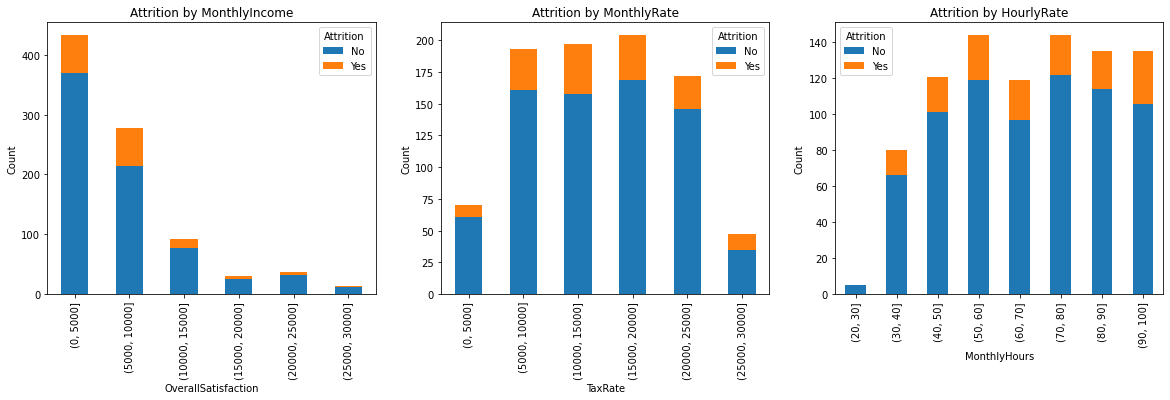

In [242]:
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_income = pd.DataFrame()
df_income["MonthlyIncome"] = pd.cut(x=df_impunted["MonthlyIncome"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
df2 = pd.crosstab(df_income["MonthlyIncome"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("OverallSatisfaction")
plt.ylabel("Count")
plt.title(label="Attrition by " + "MonthlyIncome")

ax = plt.subplot2grid(fig_dims, (0, 1))
df_income = pd.DataFrame()
df_income["MonthlyRate"] = pd.cut(x=df_impunted["MonthlyRate"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
df2 = pd.crosstab(df_income["MonthlyRate"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("TaxRate")
plt.ylabel("Count")
plt.title(label="Attrition by " + "MonthlyRate")

ax = plt.subplot2grid(fig_dims, (0, 2))
df_h = pd.DataFrame()
df_h["HourlyRate"] = pd.cut(x=df_impunted["HourlyRate"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df2 = pd.crosstab(df_h["HourlyRate"], df_impunted["Attrition"])
df2.plot.bar(stacked=True, ax=ax)
plt.xlabel("MonthlyHours")
plt.ylabel("Count")
plt.title(label="Attrition by " + "HourlyRate")

plt.show()

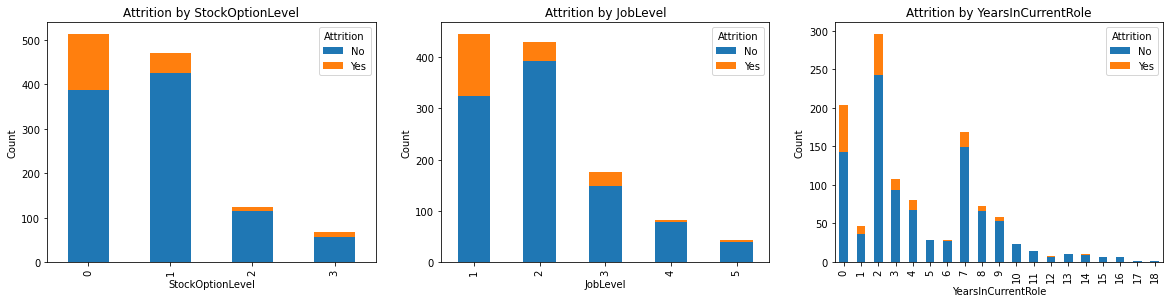

In [243]:
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_attrition("StockOptionLevel", ax)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_attrition("JobLevel", ax)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_attrition("YearsInCurrentRole", ax)
plt.show()

<h2> Scatter plots </h2>

<h6> HourlyRate scatter plots </h6>

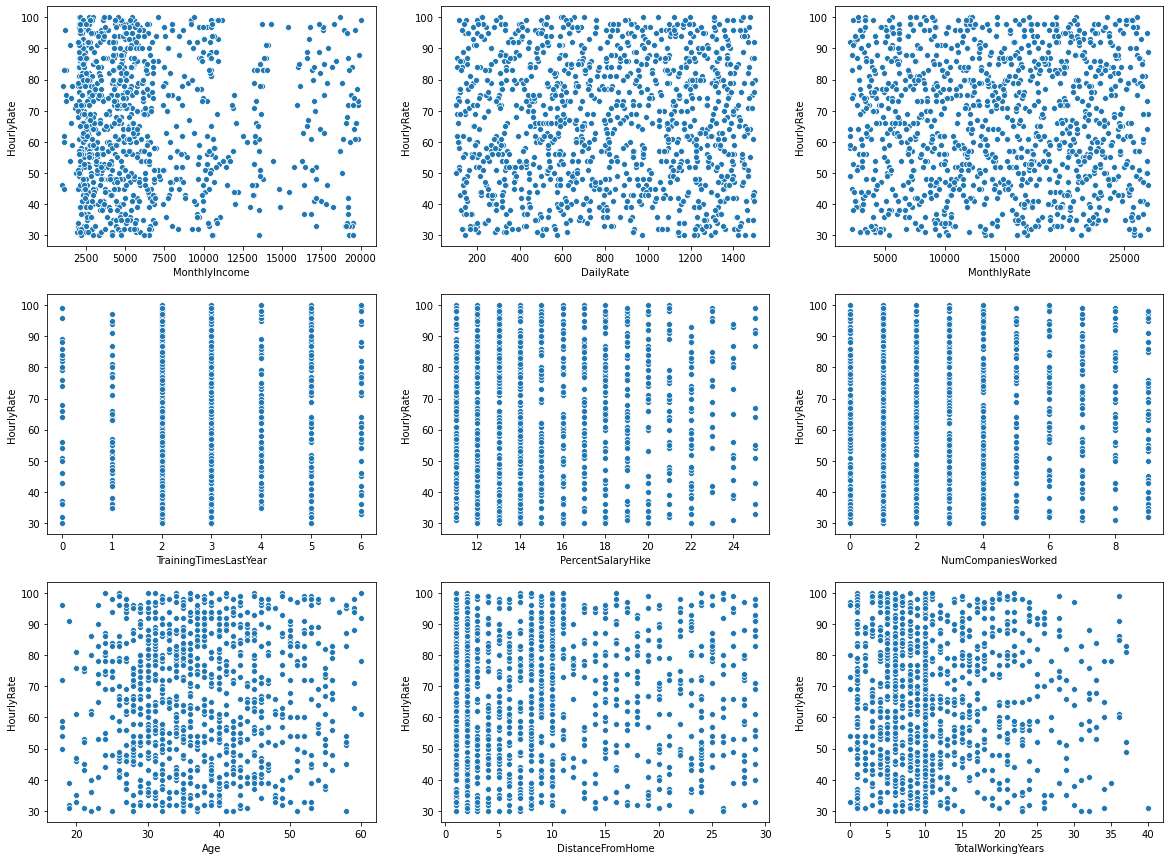

In [244]:
curr_column = "HourlyRate"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

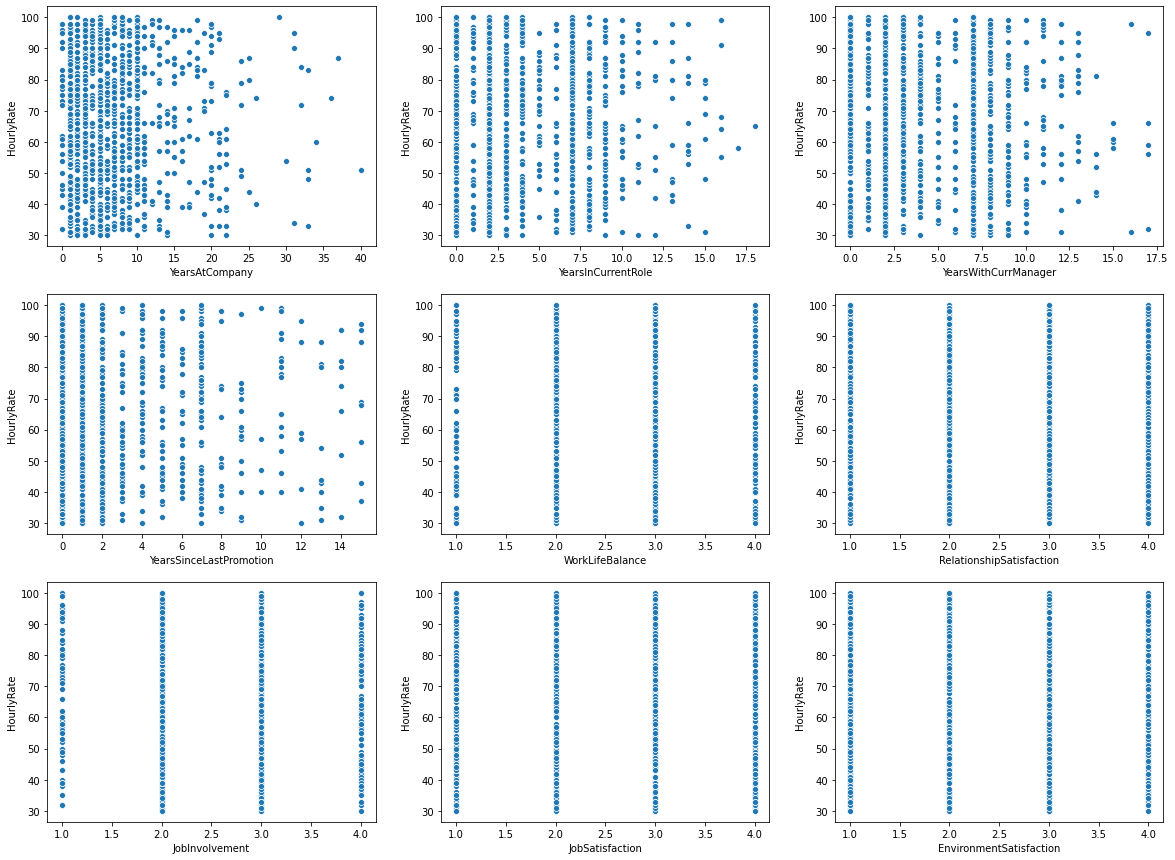

In [245]:
curr_column = "HourlyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

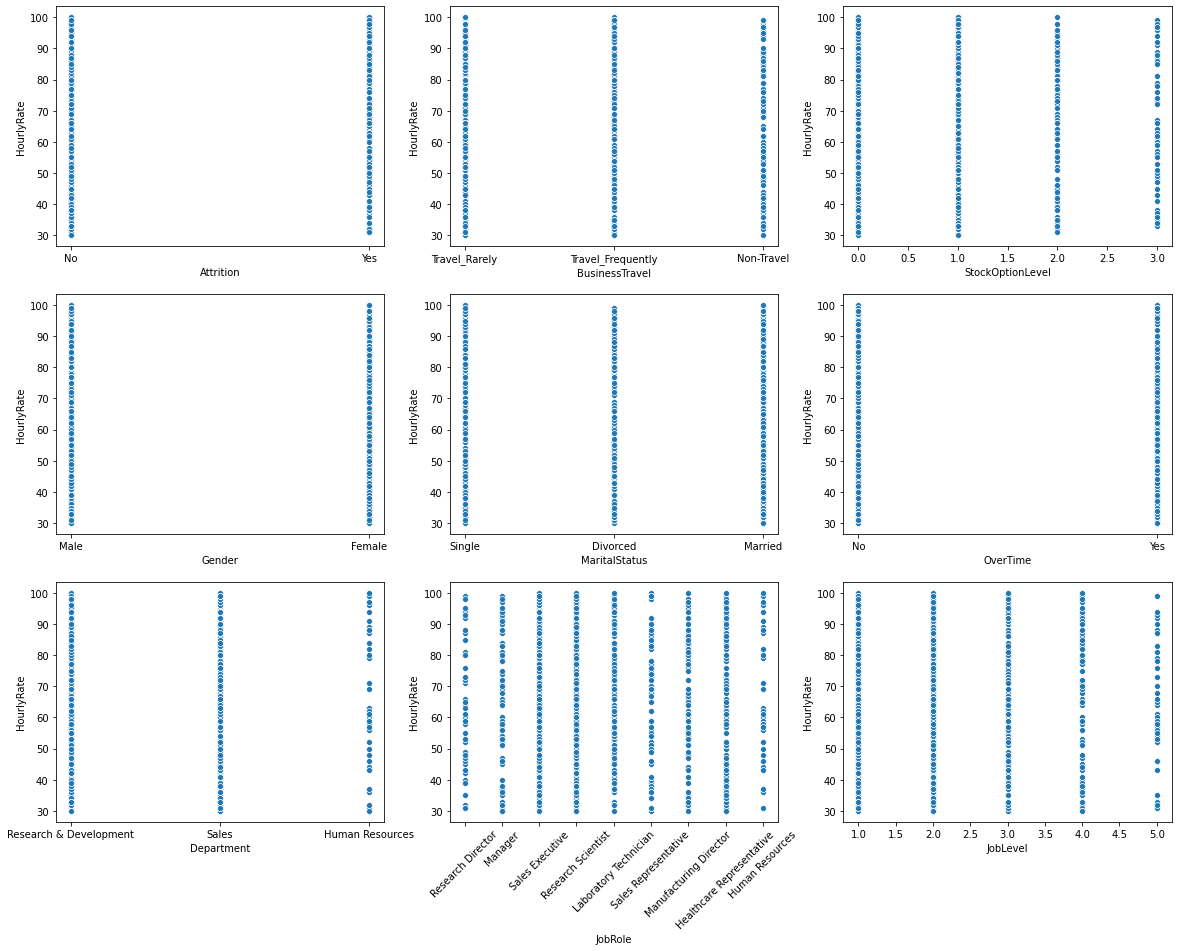

In [246]:
curr_column = "HourlyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> DailyRate scatter plots </h6>

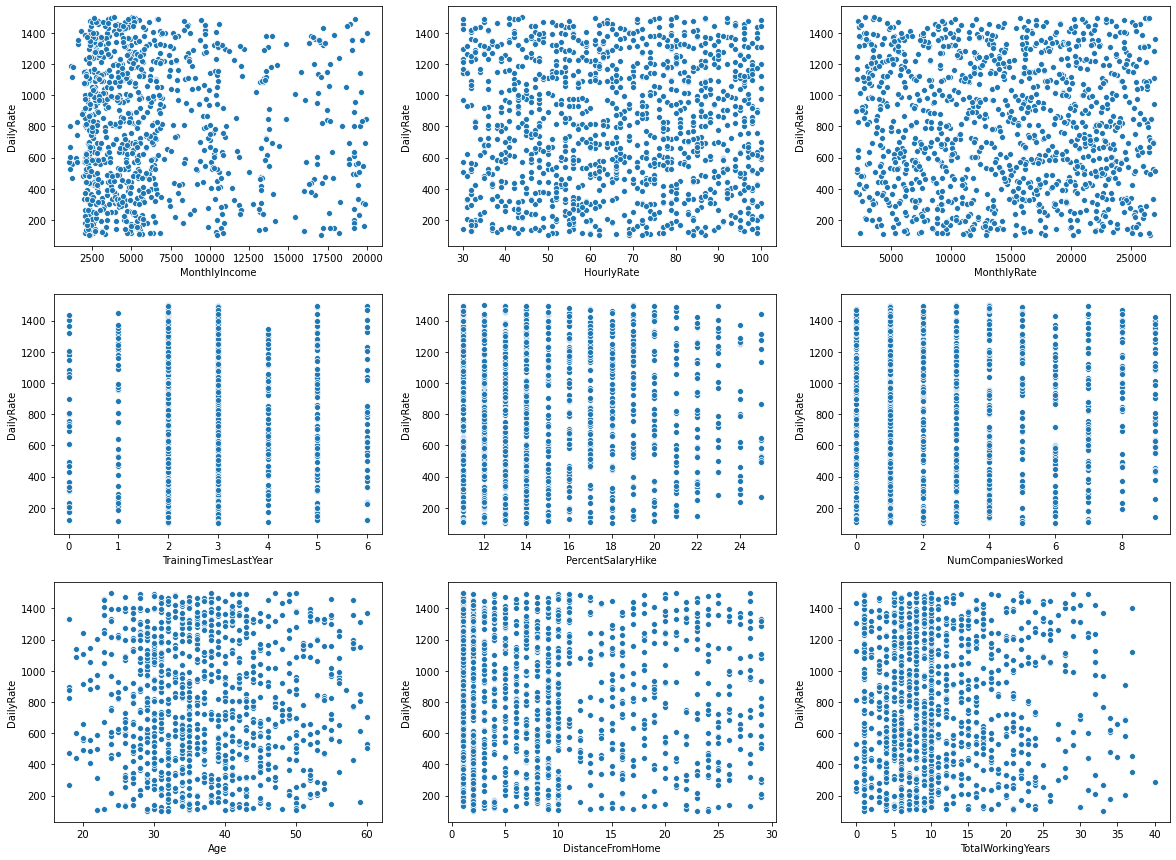

In [247]:
curr_column = "DailyRate"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

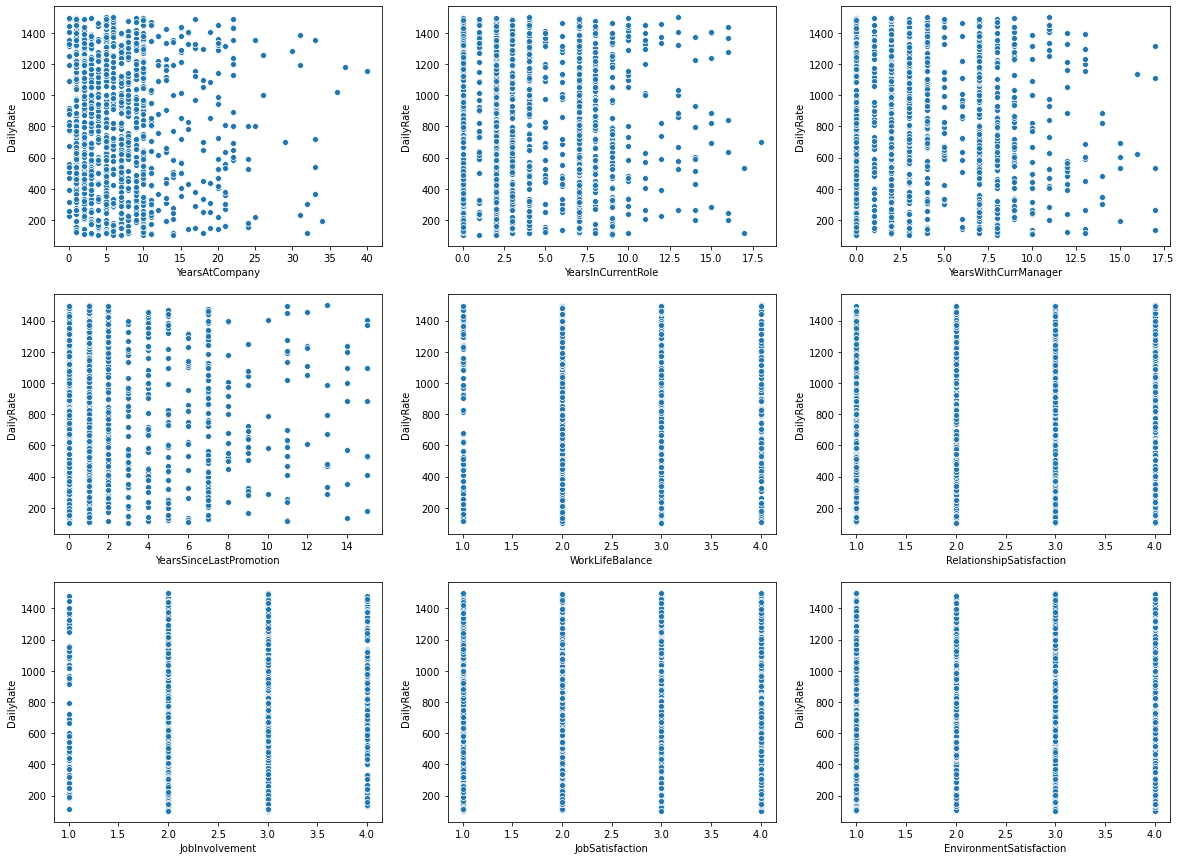

In [248]:
curr_column = "DailyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

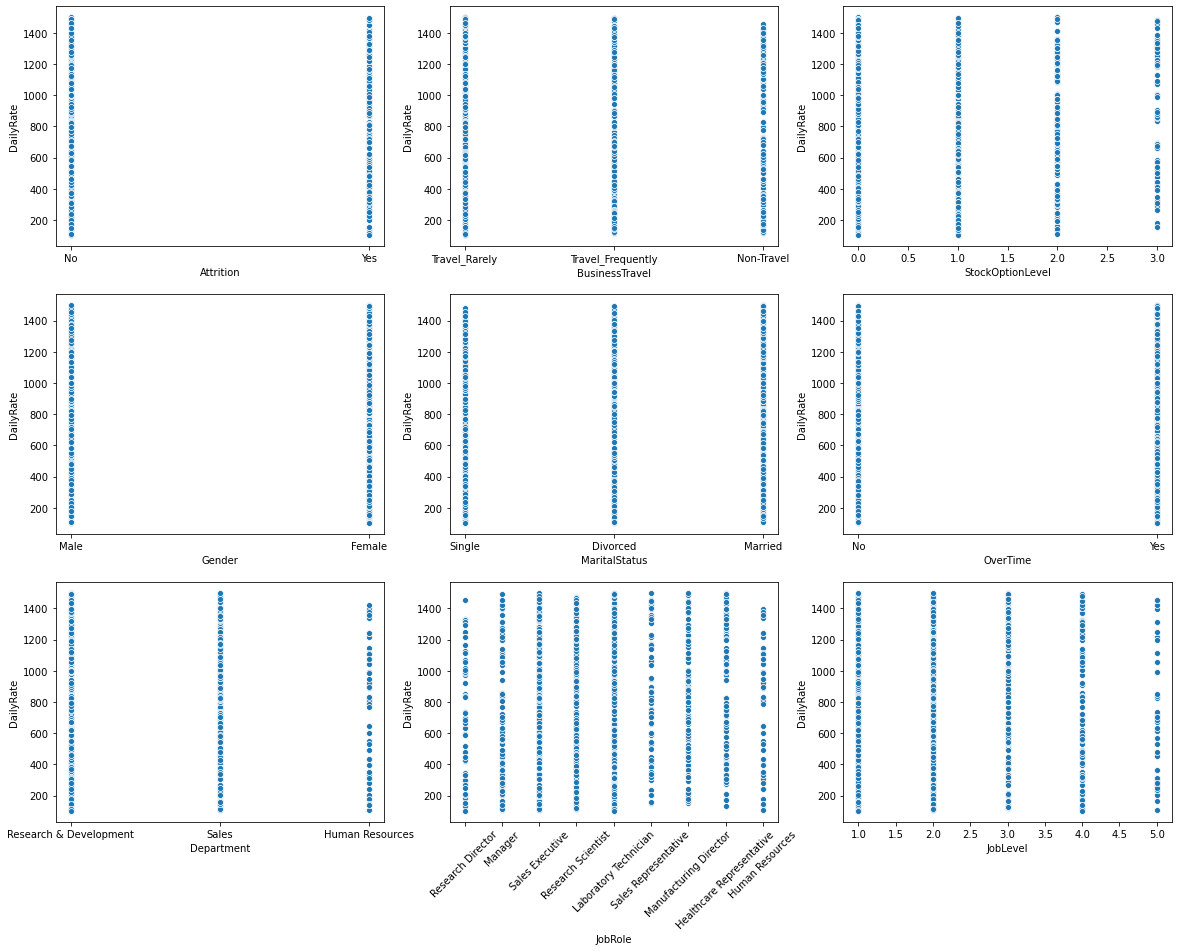

In [249]:
curr_column = "DailyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> MonthlyRate scatter plots </h6>

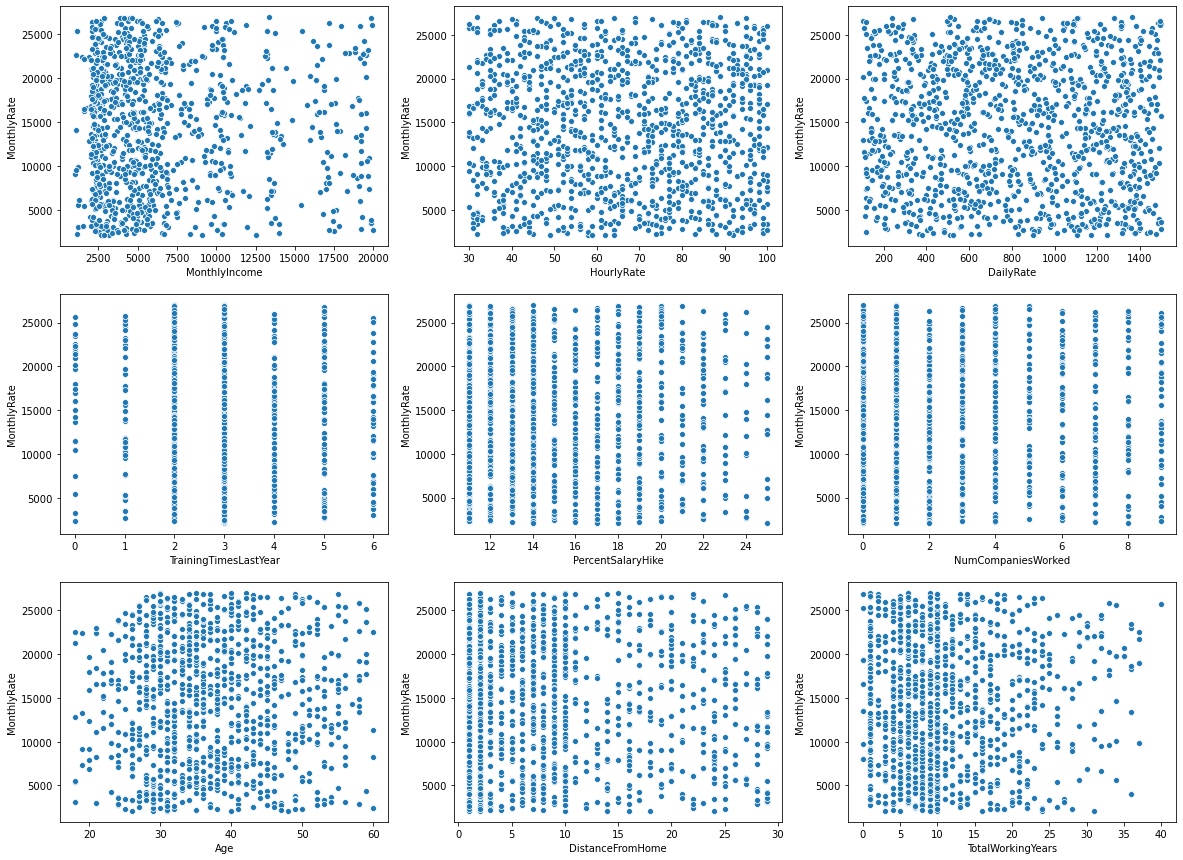

In [250]:
curr_column = "MonthlyRate"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

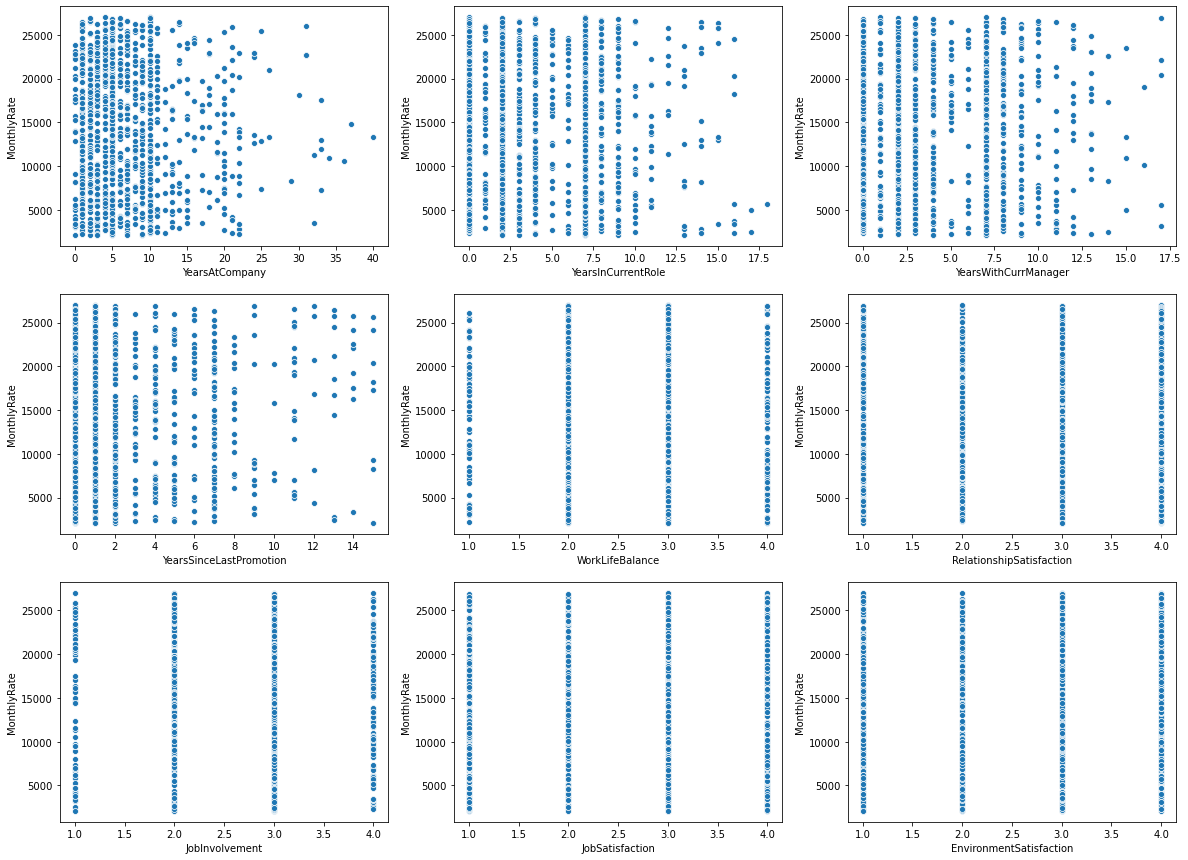

In [251]:
curr_column = "MonthlyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

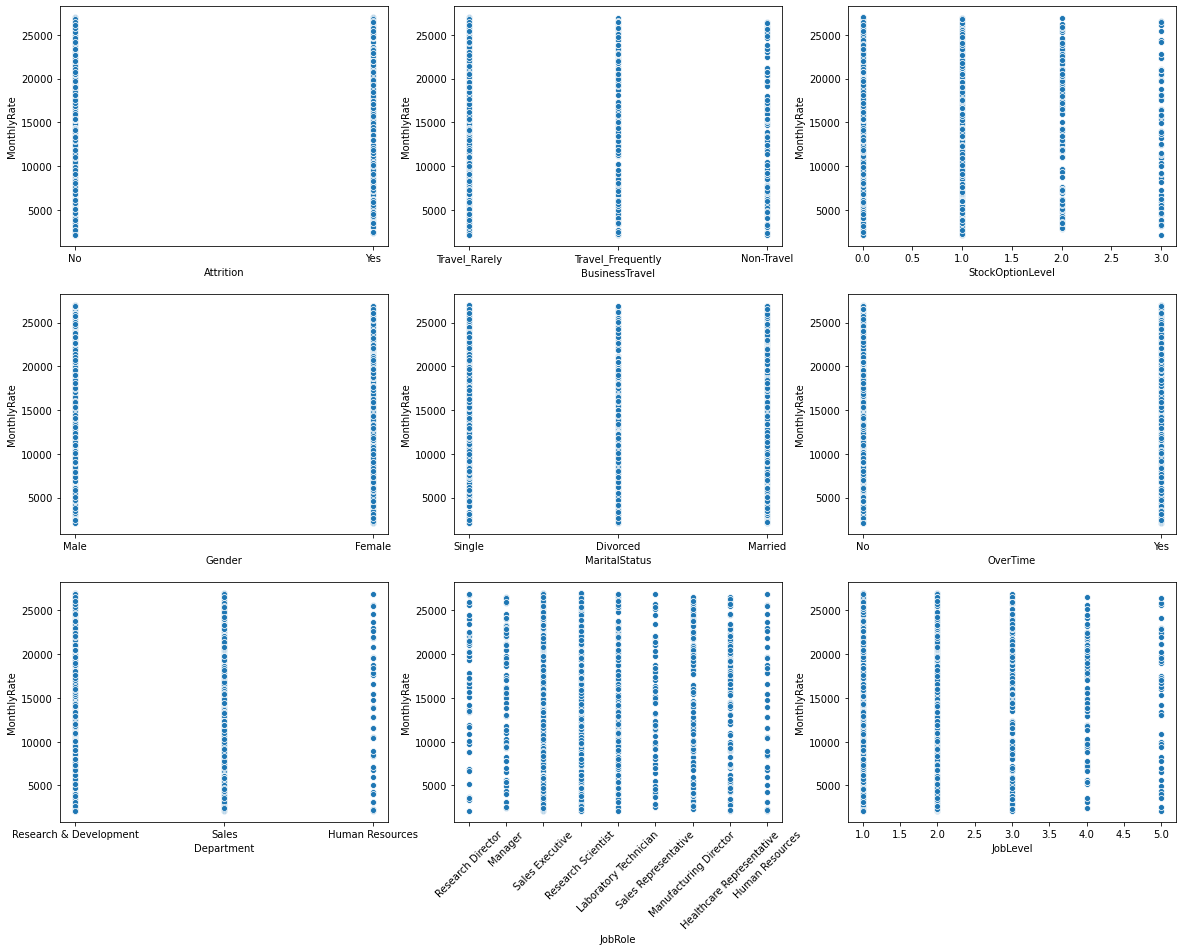

In [252]:
curr_column = "MonthlyRate"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> MonthlyIncome scatter plots </h6>

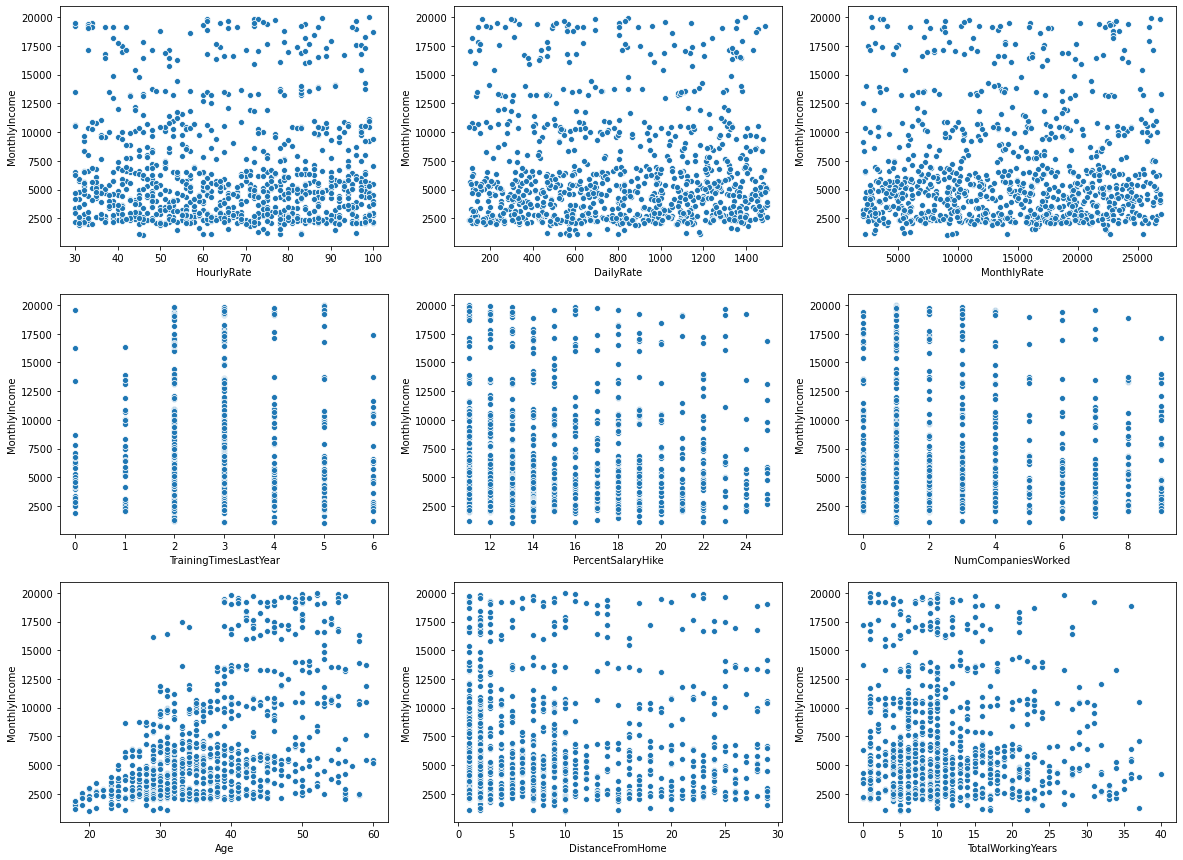

In [253]:
curr_column = "MonthlyIncome"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

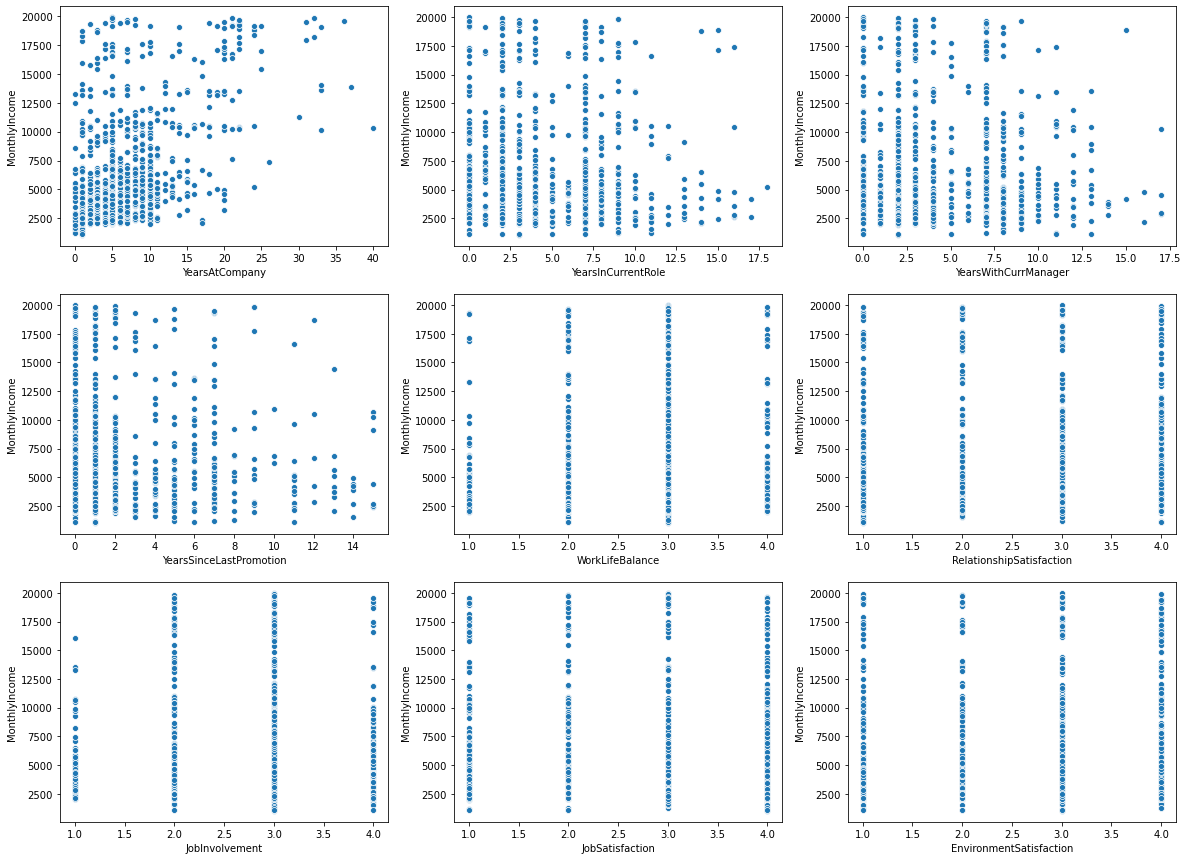

In [254]:
curr_column = "MonthlyIncome"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

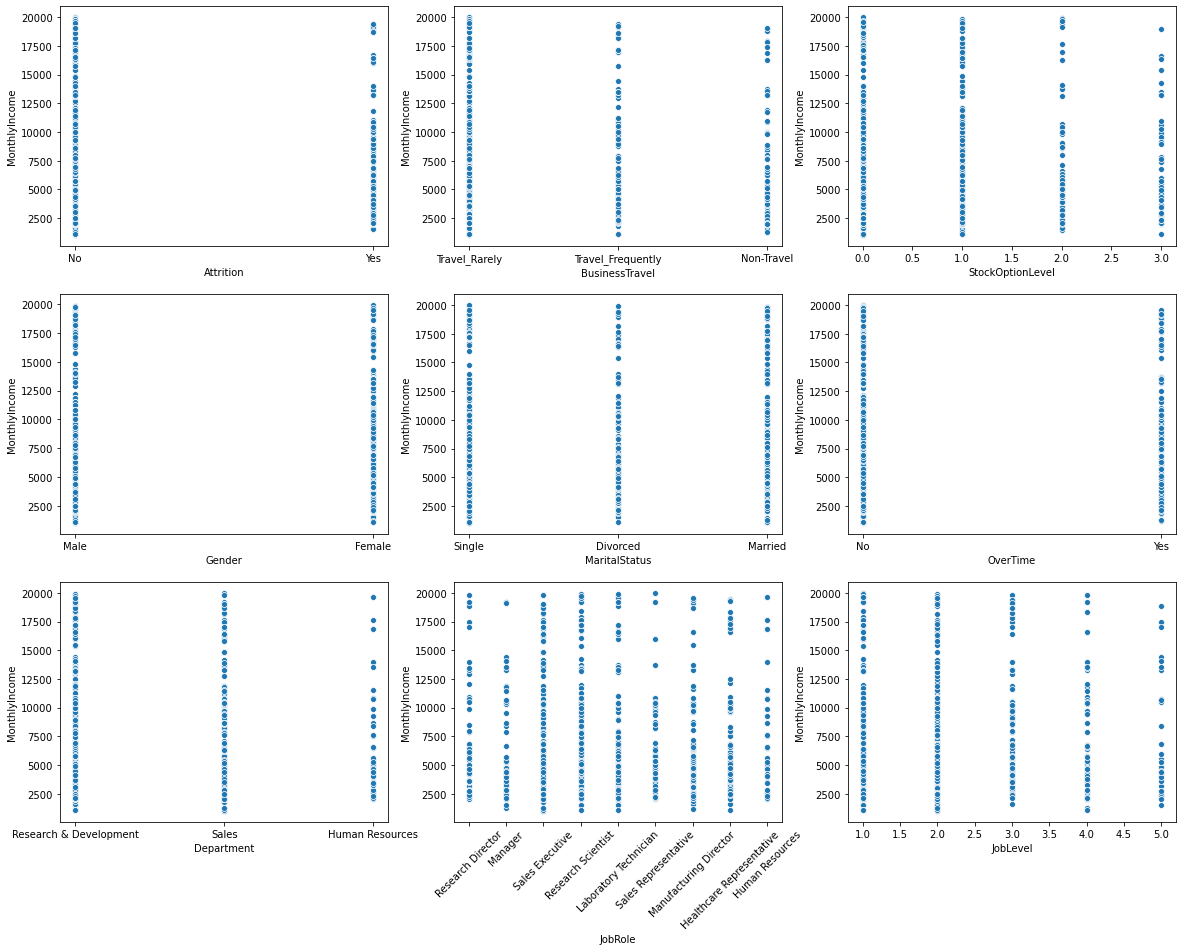

In [255]:
curr_column = "MonthlyIncome"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> DistanceFromHome scatter plots </h6>

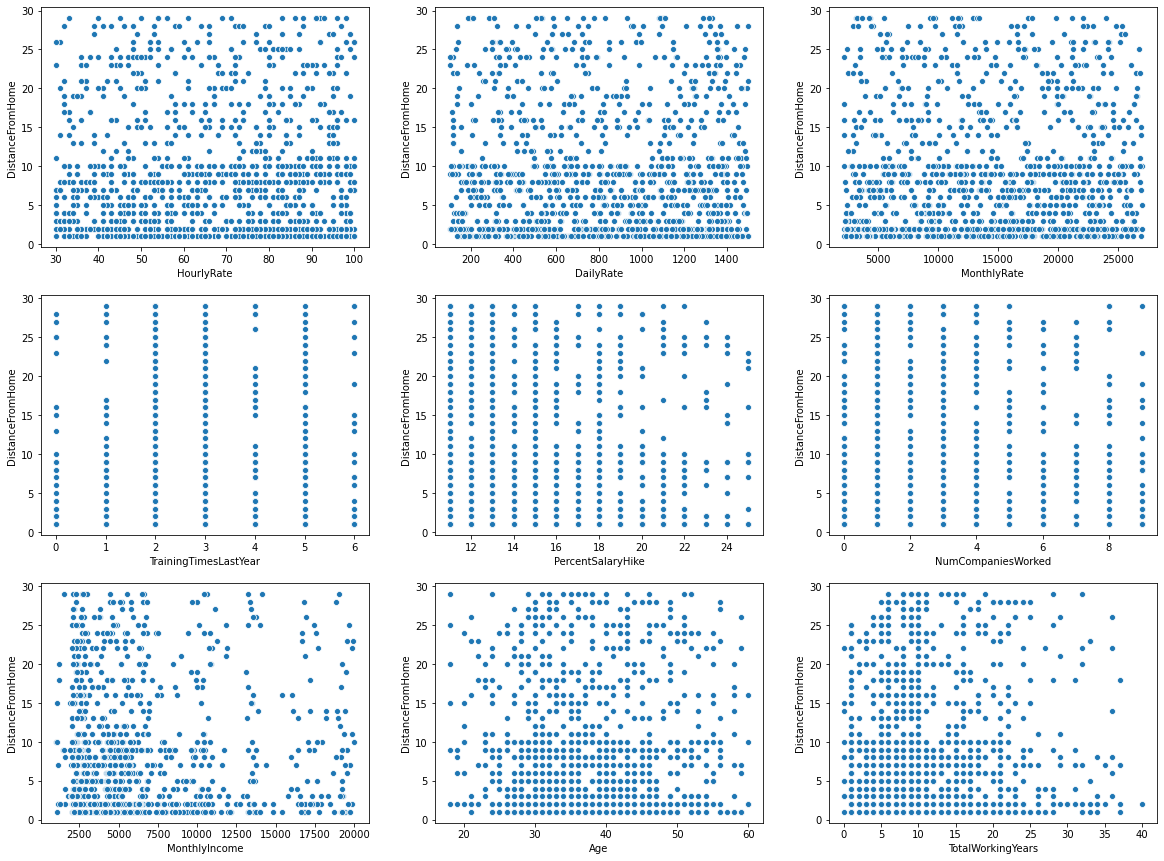

In [256]:
curr_column = "DistanceFromHome"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

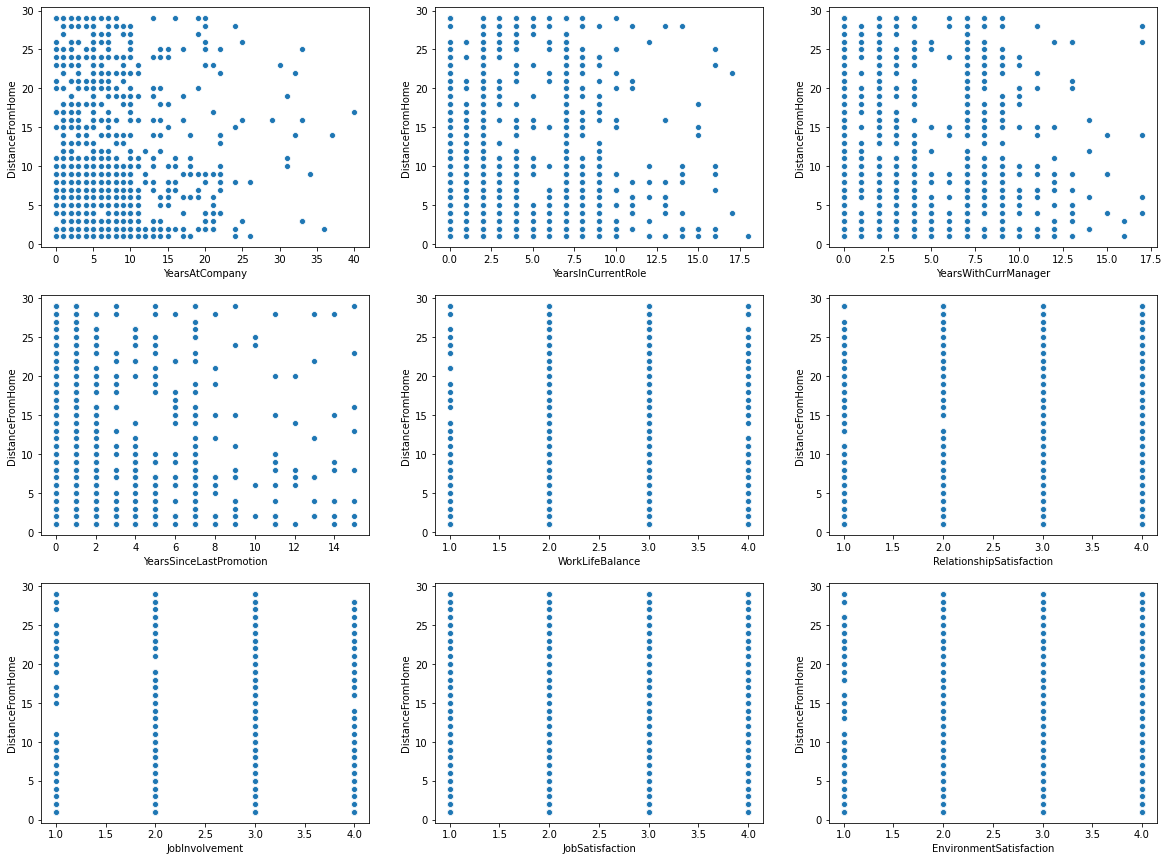

In [257]:
curr_column = "DistanceFromHome"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

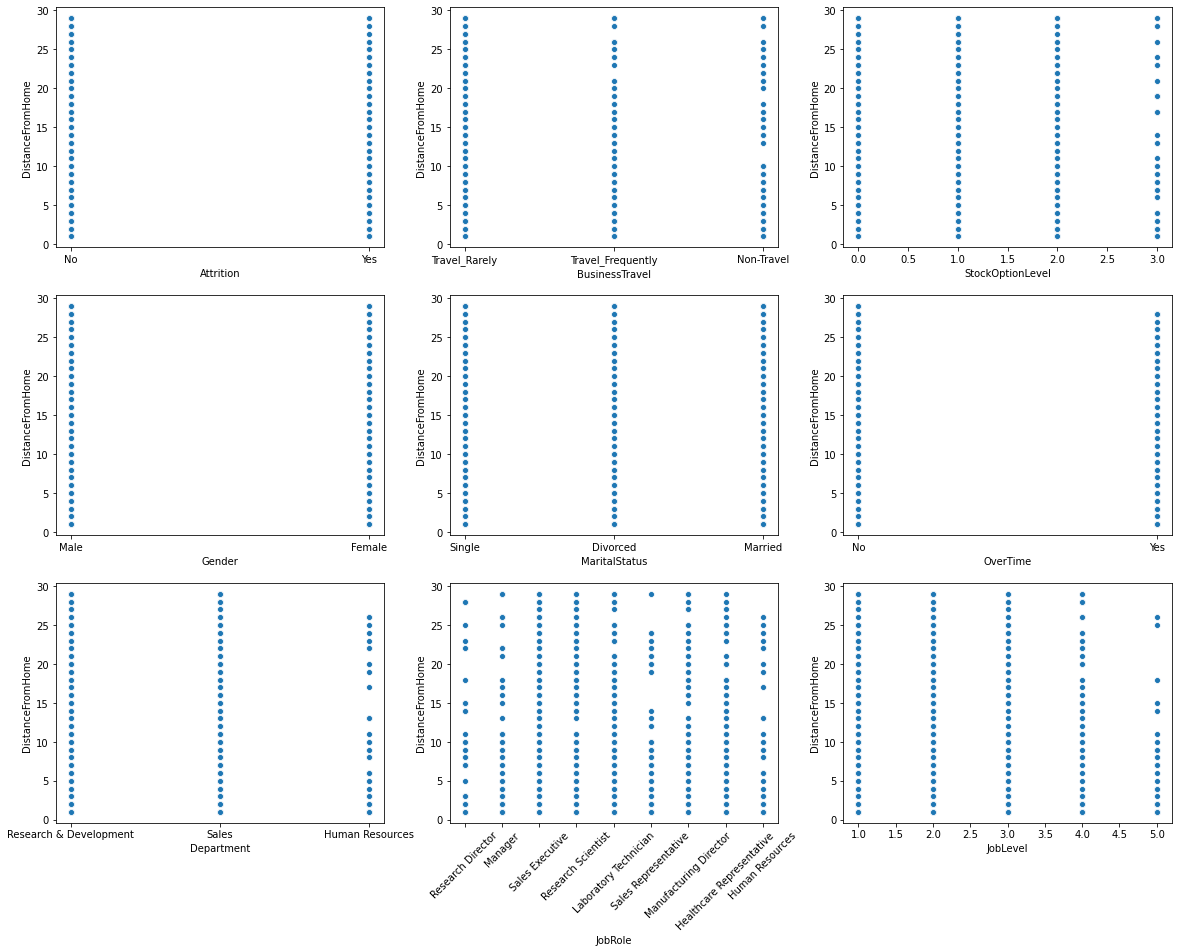

In [258]:
curr_column = "DistanceFromHome"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> Age scatter plots </h6>

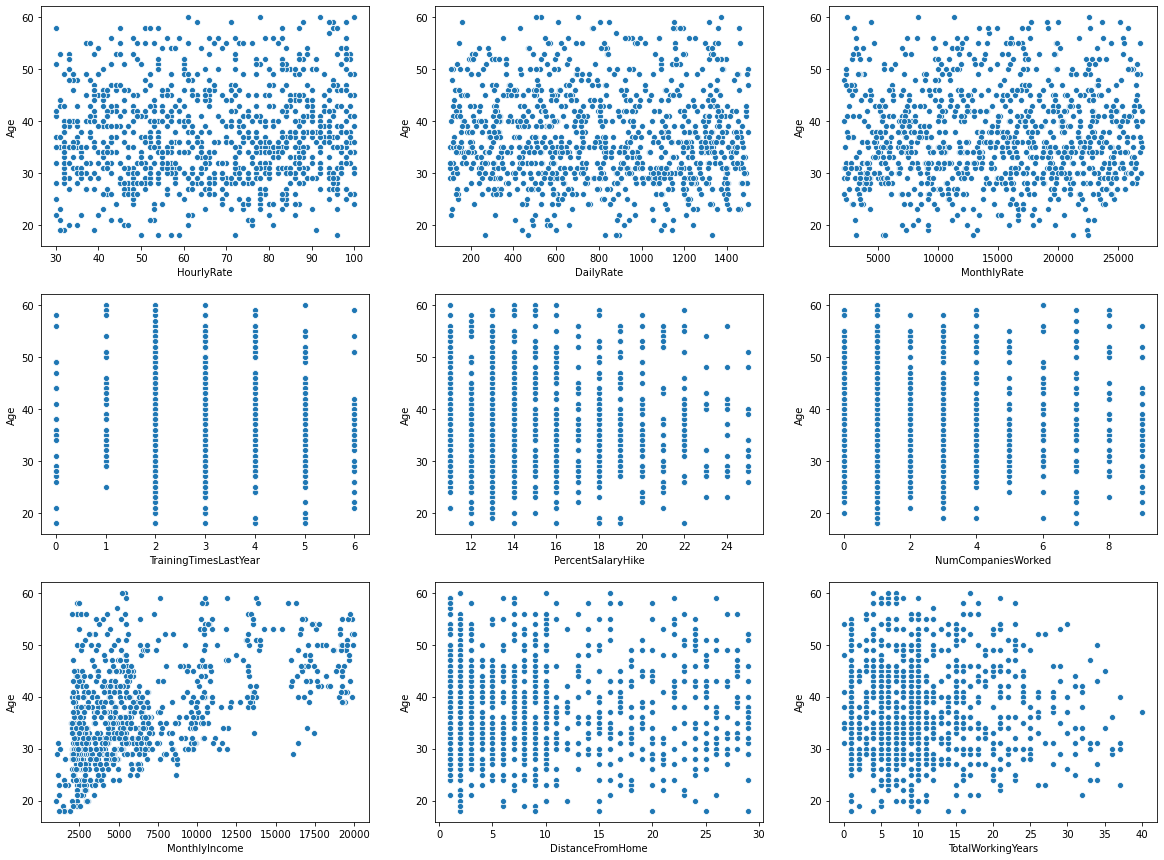

In [259]:
curr_column = "Age"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

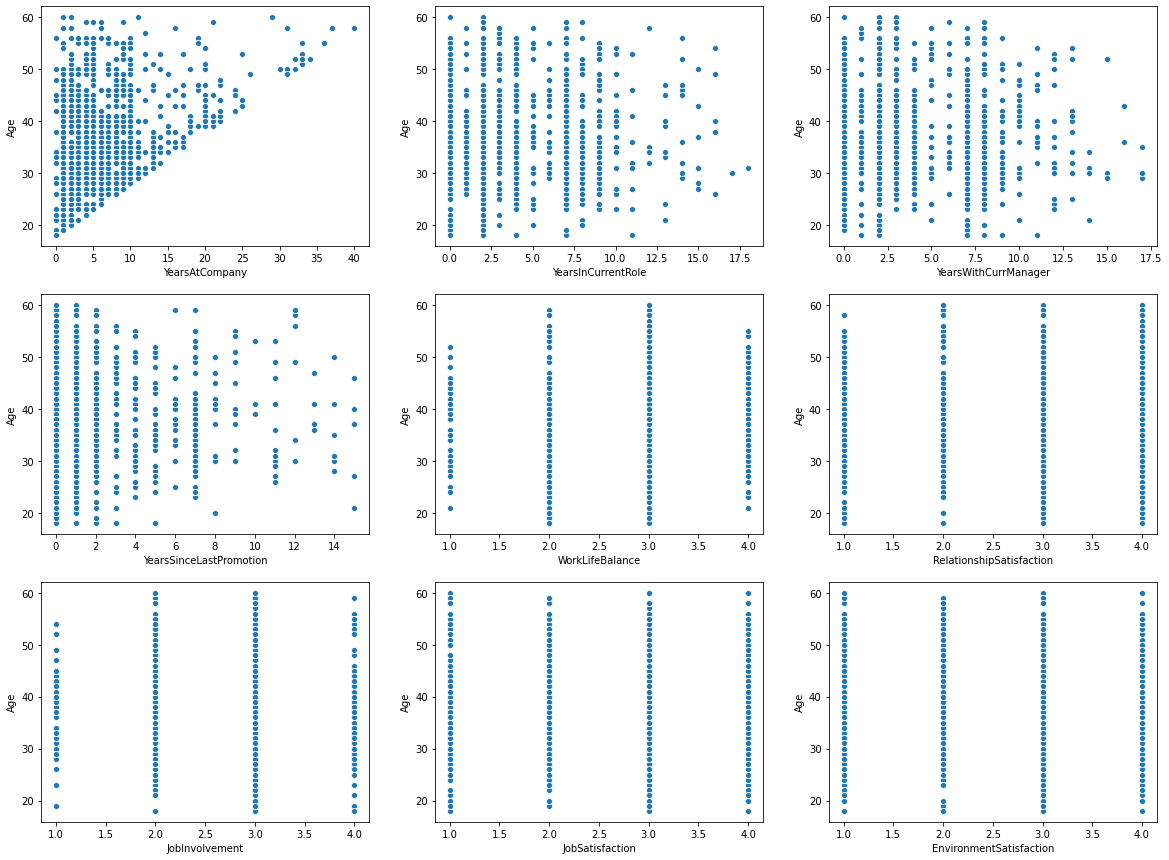

In [260]:
curr_column = "Age"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

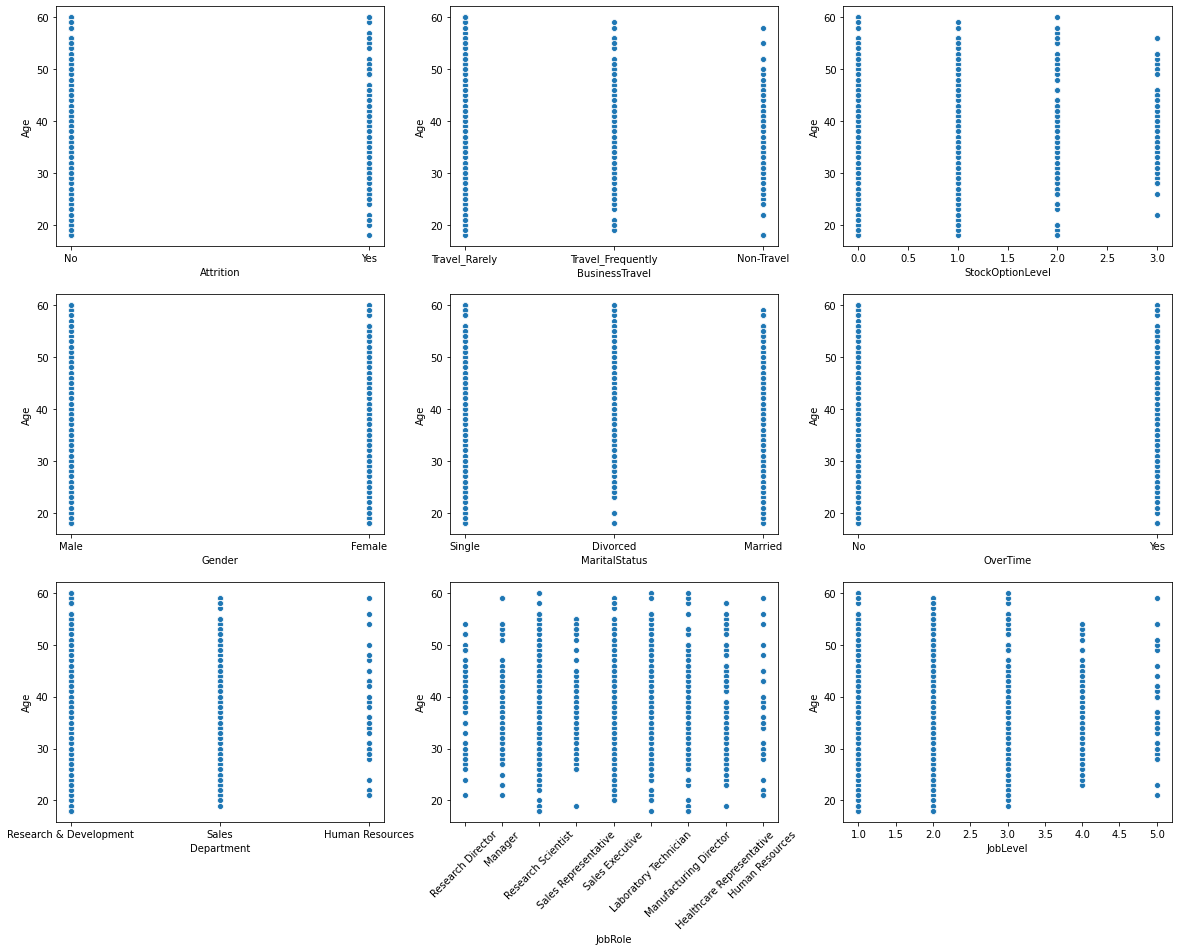

In [261]:
curr_column = "Age"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> NumCompaniesWorked scatter plots </h6>

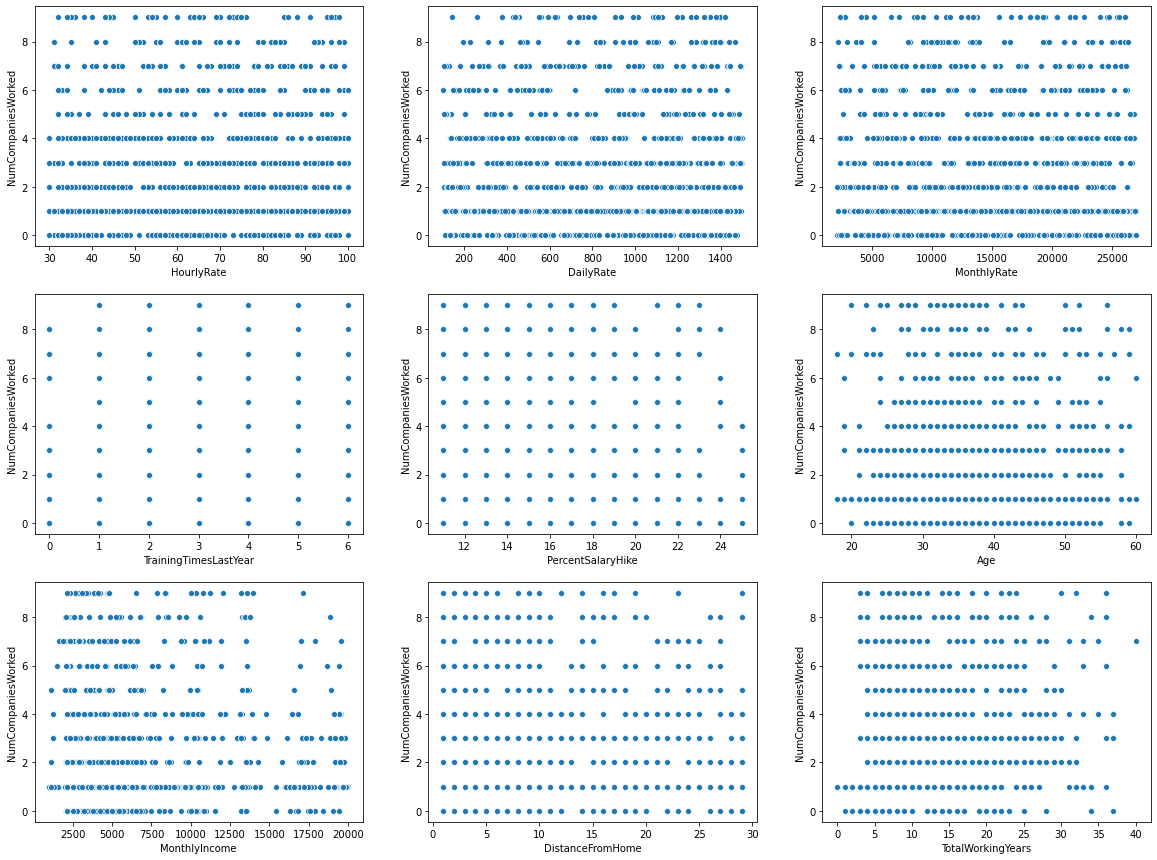

In [262]:
curr_column = "NumCompaniesWorked"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

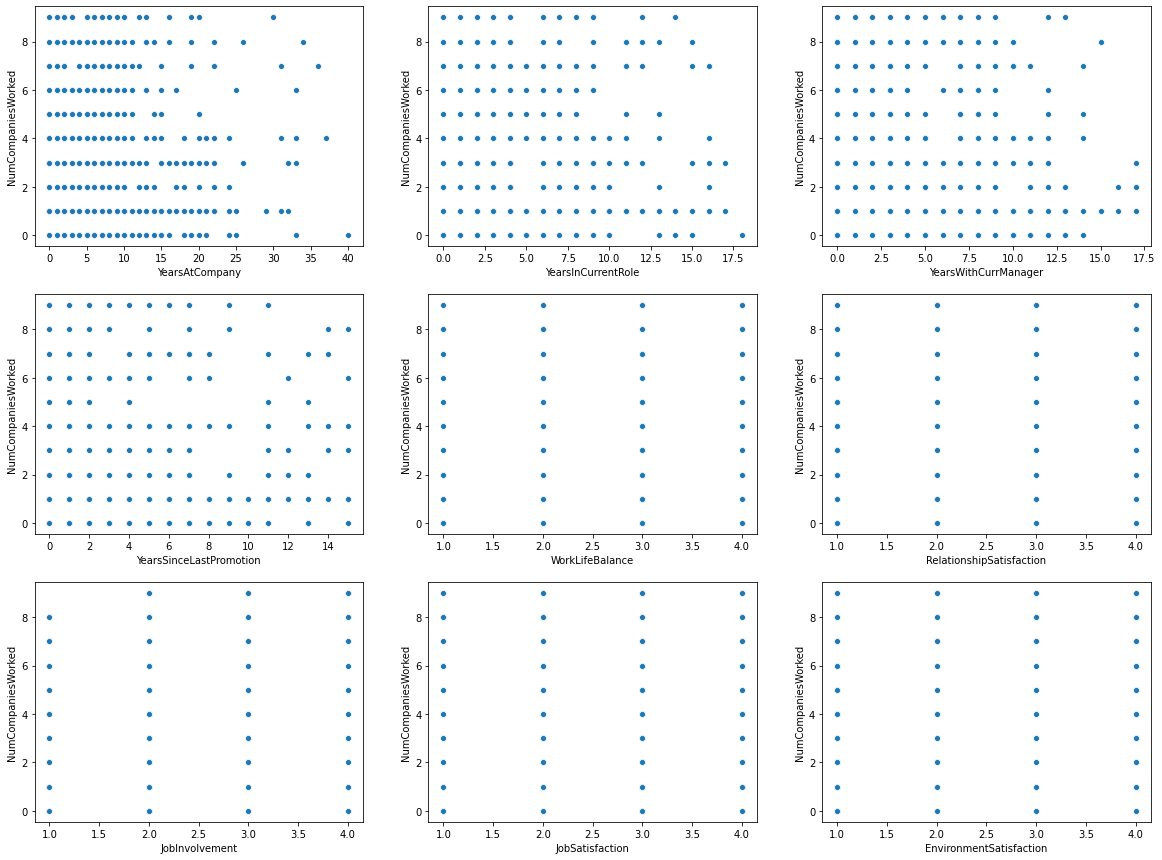

In [263]:
curr_column = "NumCompaniesWorked"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

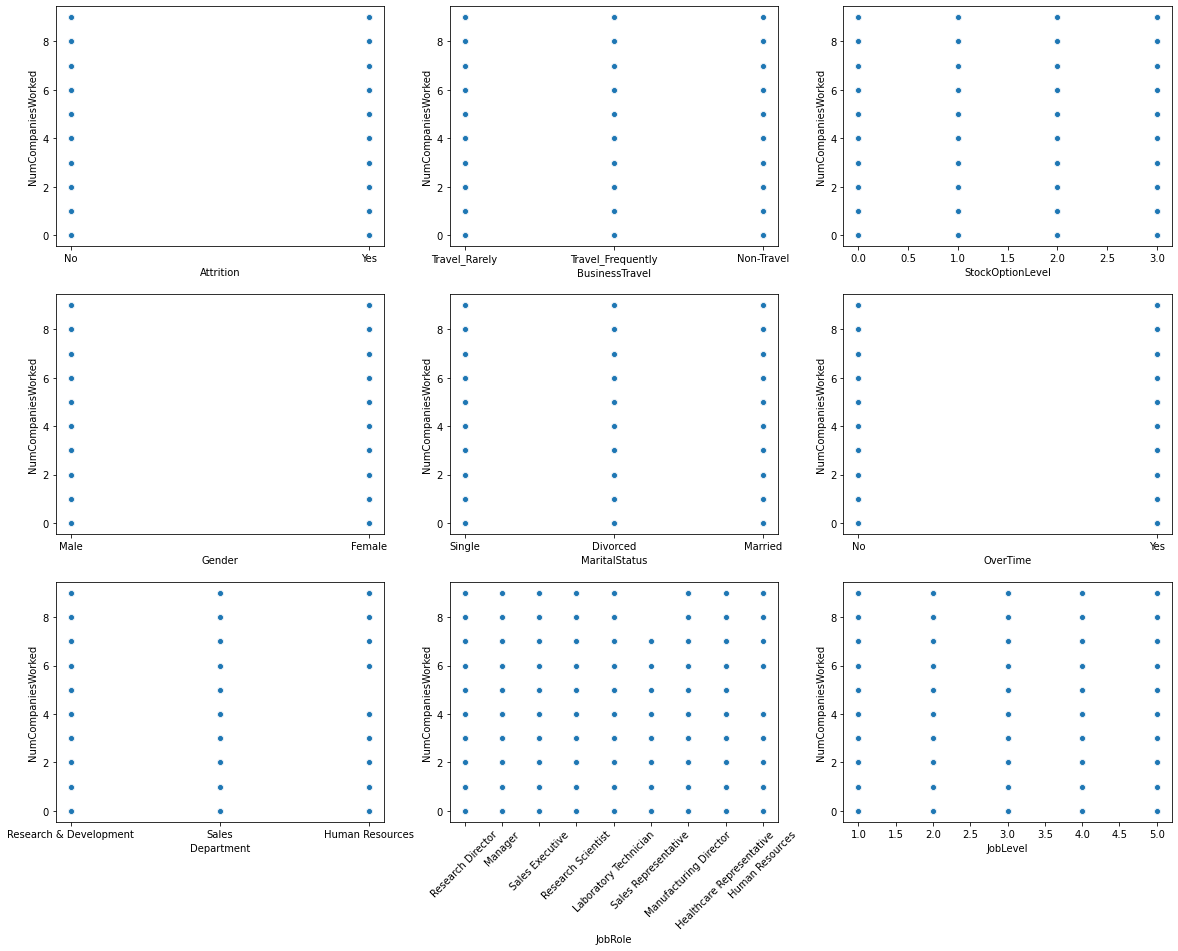

In [264]:
curr_column = "NumCompaniesWorked"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> TotalWorkingYears scatter plots </h6>

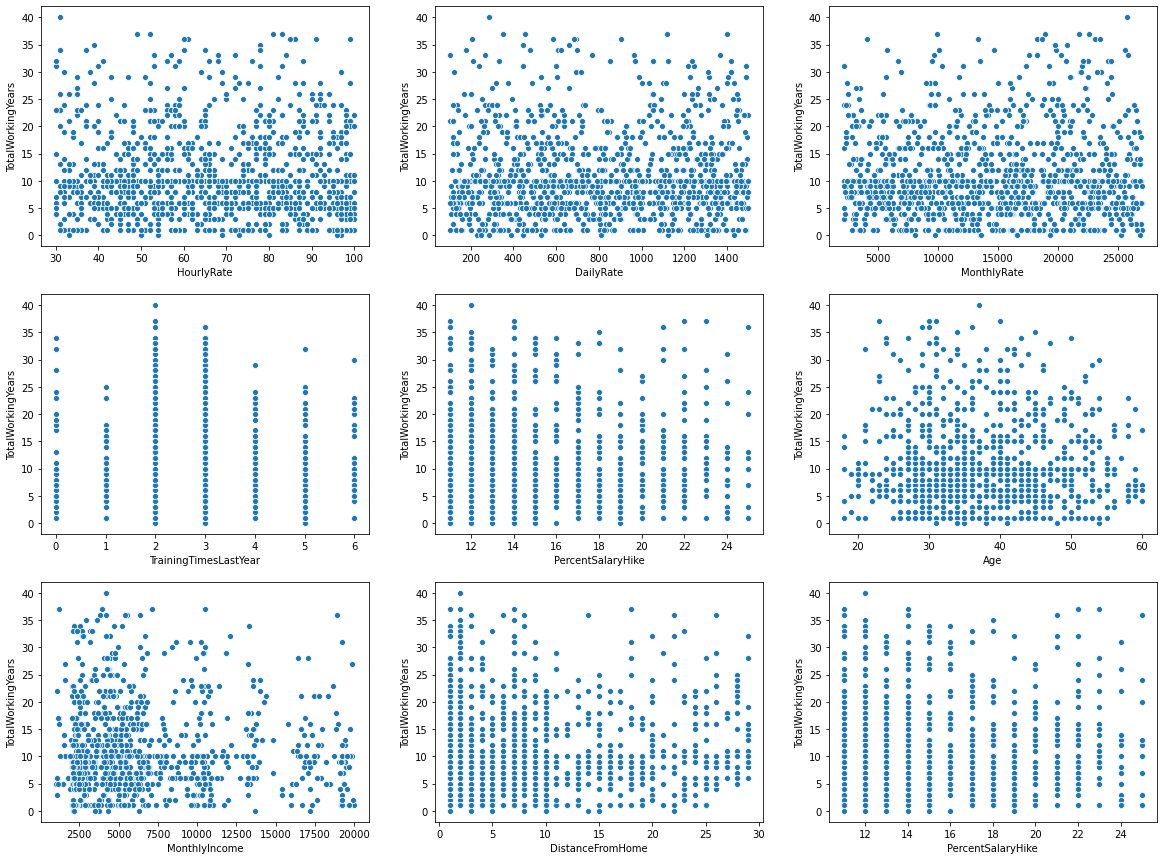

In [265]:
curr_column = "TotalWorkingYears"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)

plt.show()

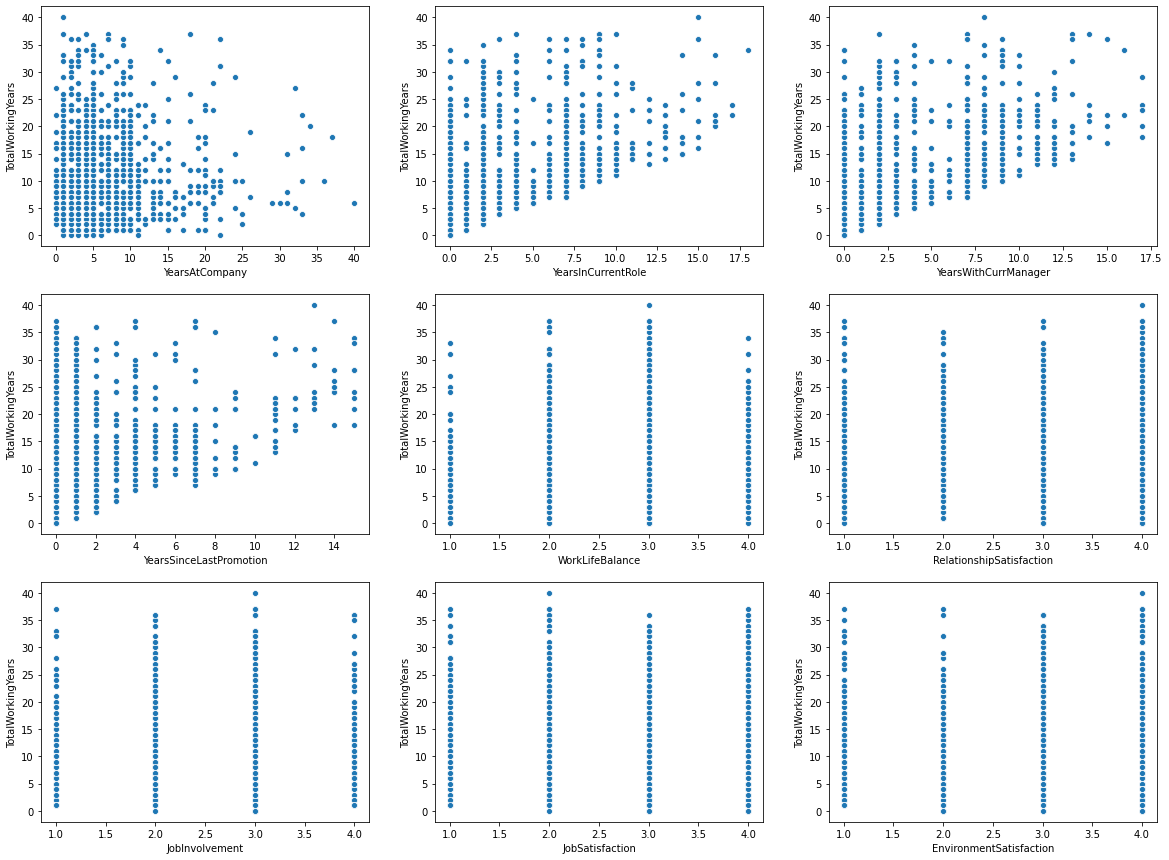

In [266]:
curr_column = "TotalWorkingYears"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

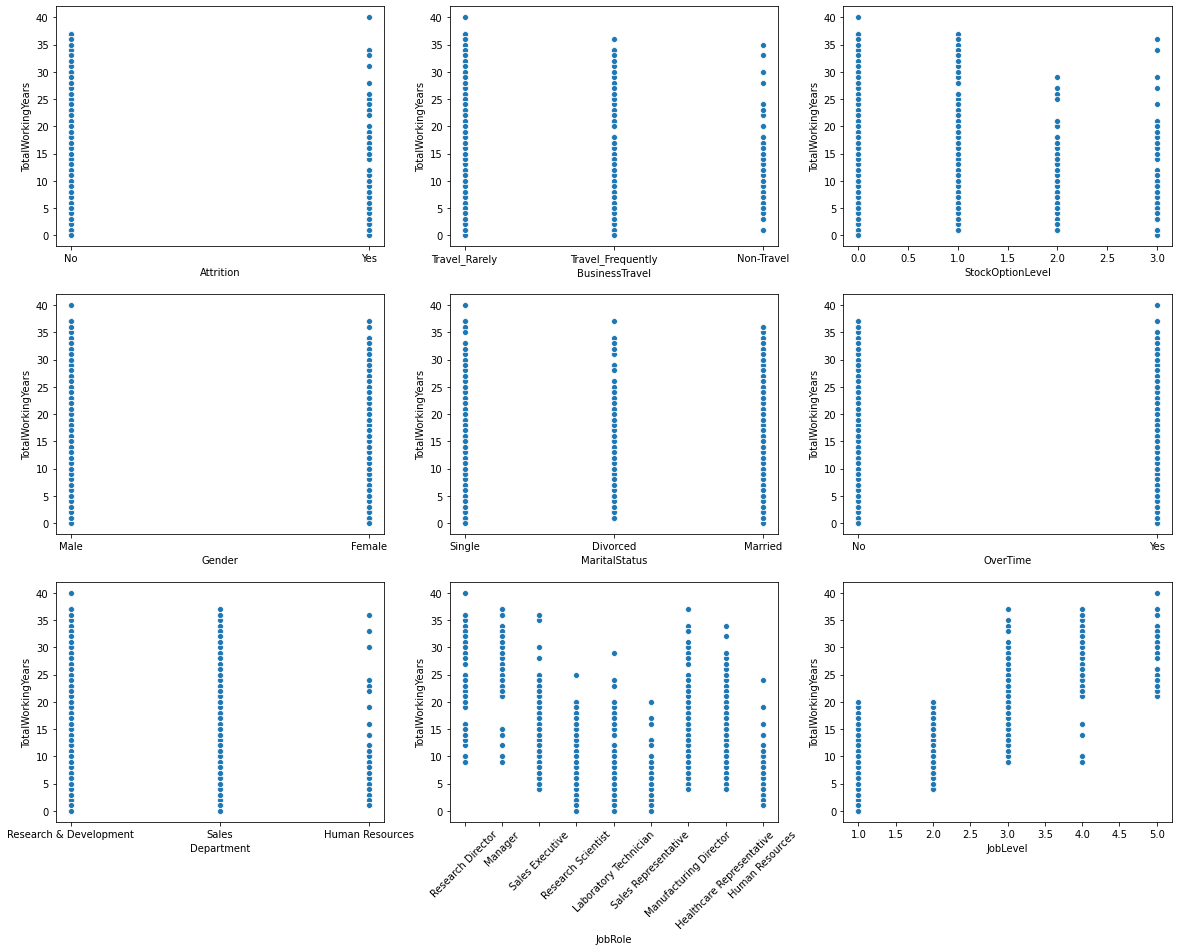

In [267]:
curr_column = "TotalWorkingYears"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> PercentSalaryHike scatter plots </h6>

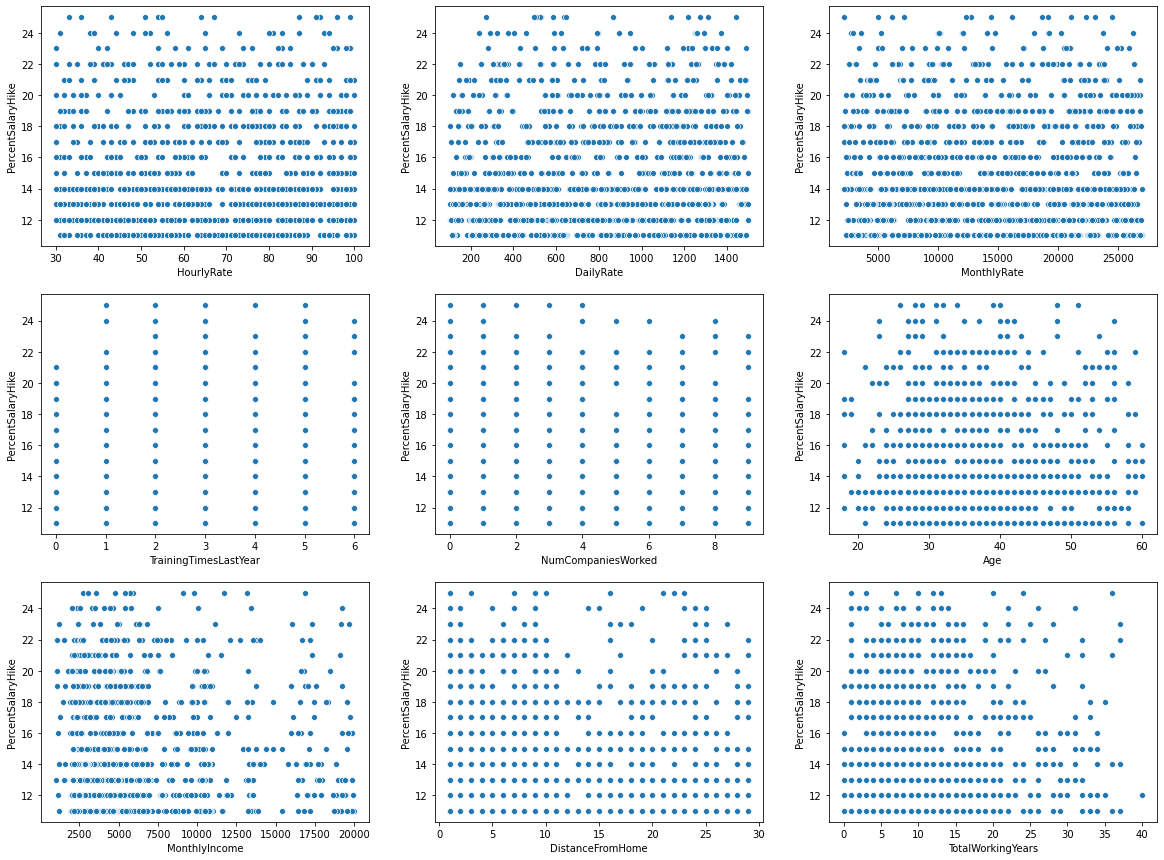

In [268]:
curr_column = "PercentSalaryHike"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

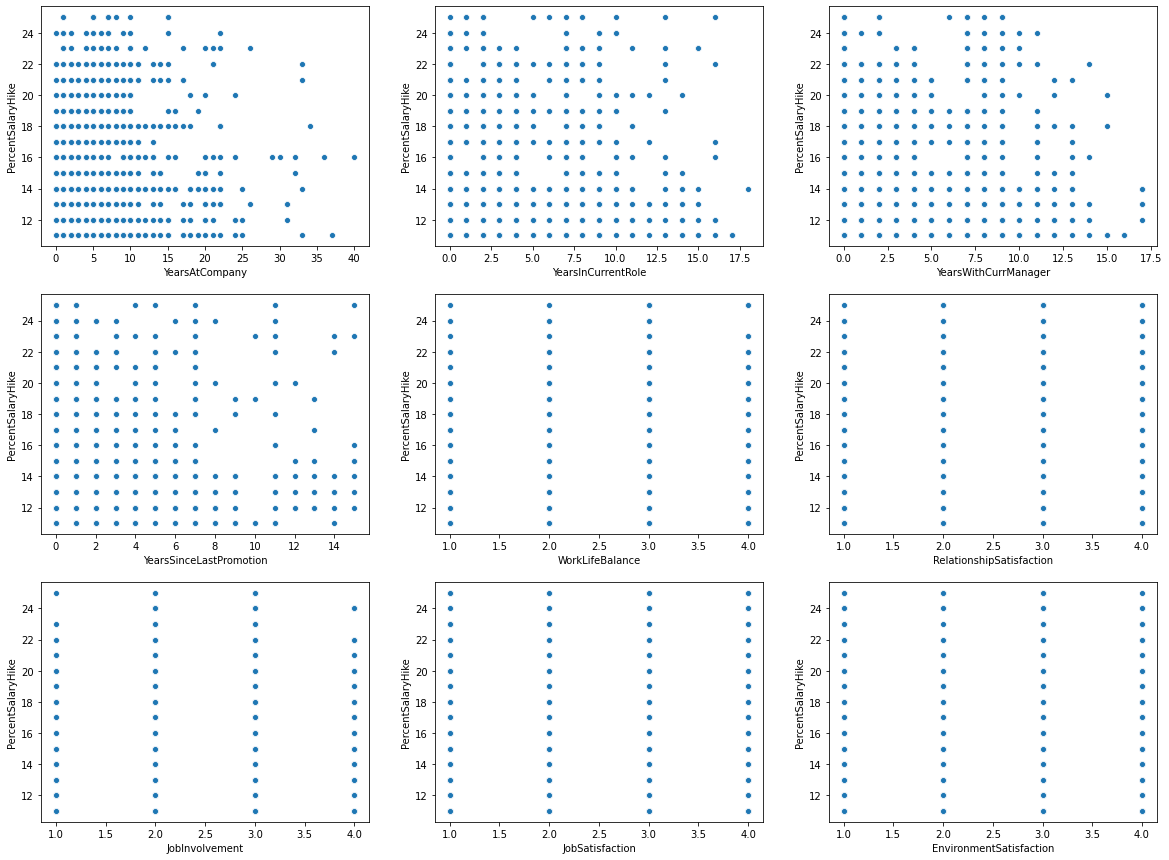

In [269]:
curr_column = "PercentSalaryHike"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

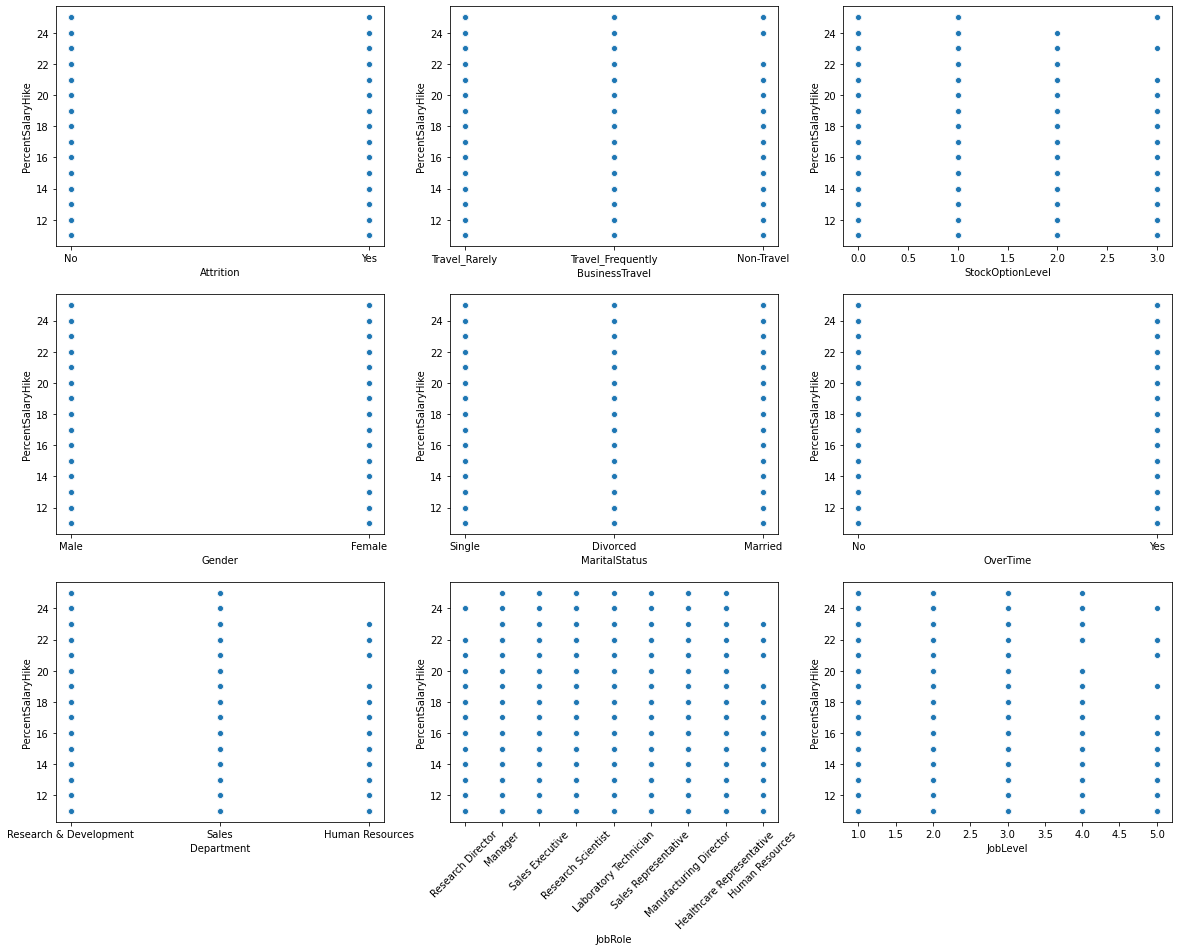

In [270]:
curr_column = "PercentSalaryHike"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> TrainingTimesLastYear scatter plots </h6>

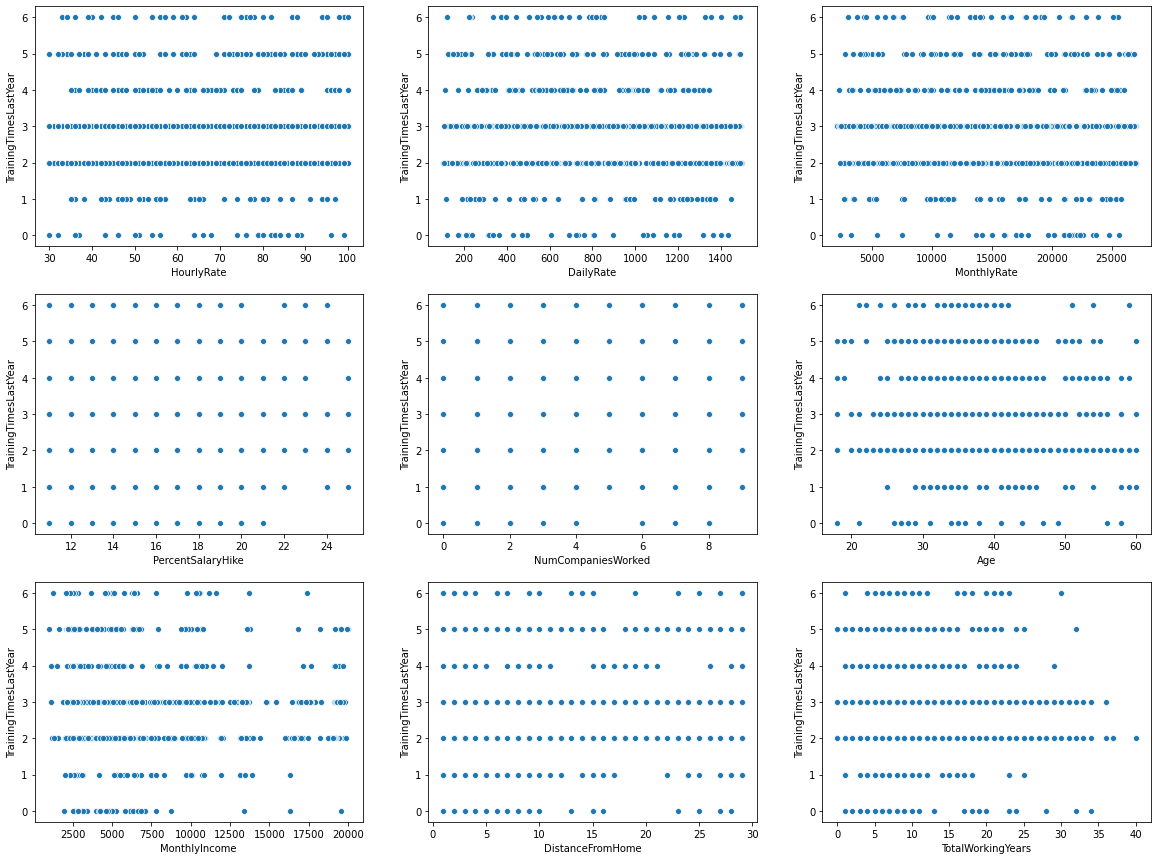

In [271]:
curr_column = "TrainingTimesLastYear"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

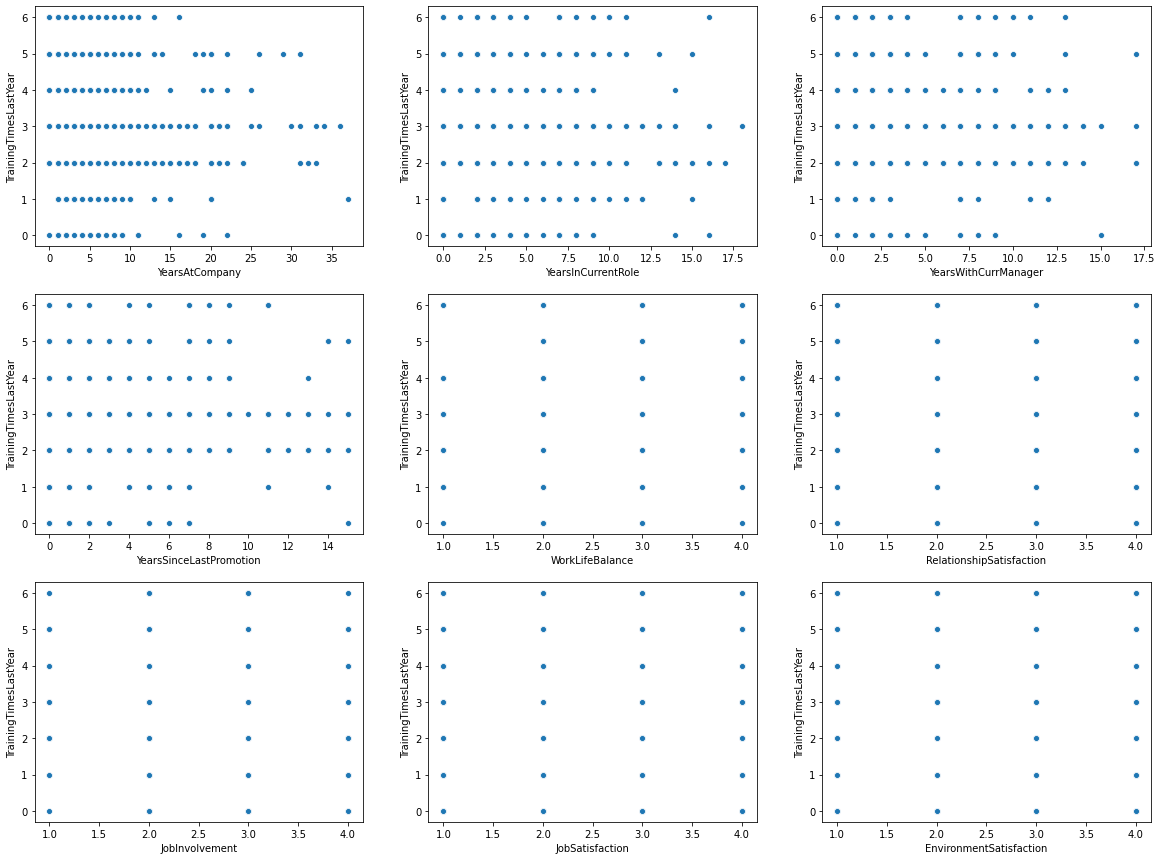

In [272]:
curr_column = "TrainingTimesLastYear"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

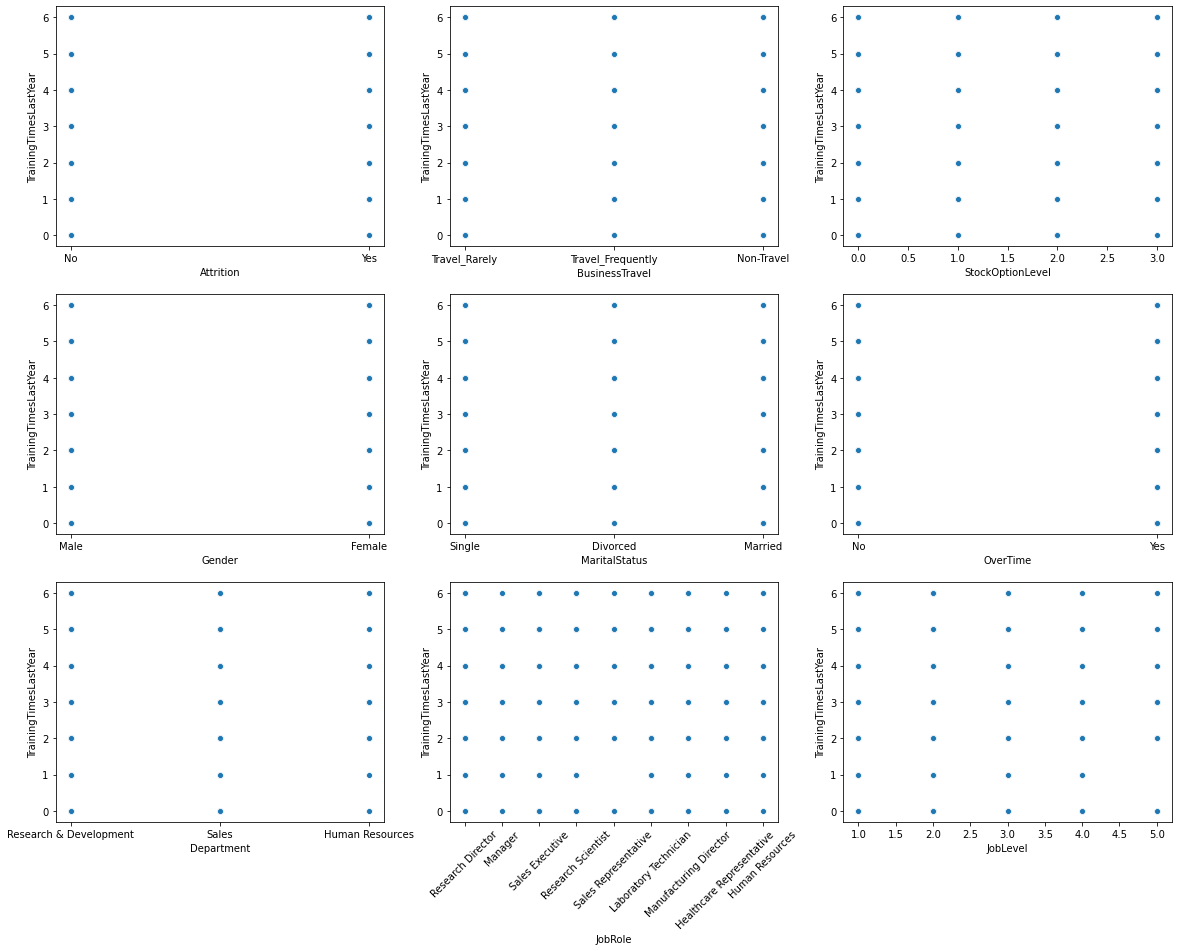

In [273]:
curr_column = "TrainingTimesLastYear"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> YearsAtCompany scatter plots </h6>

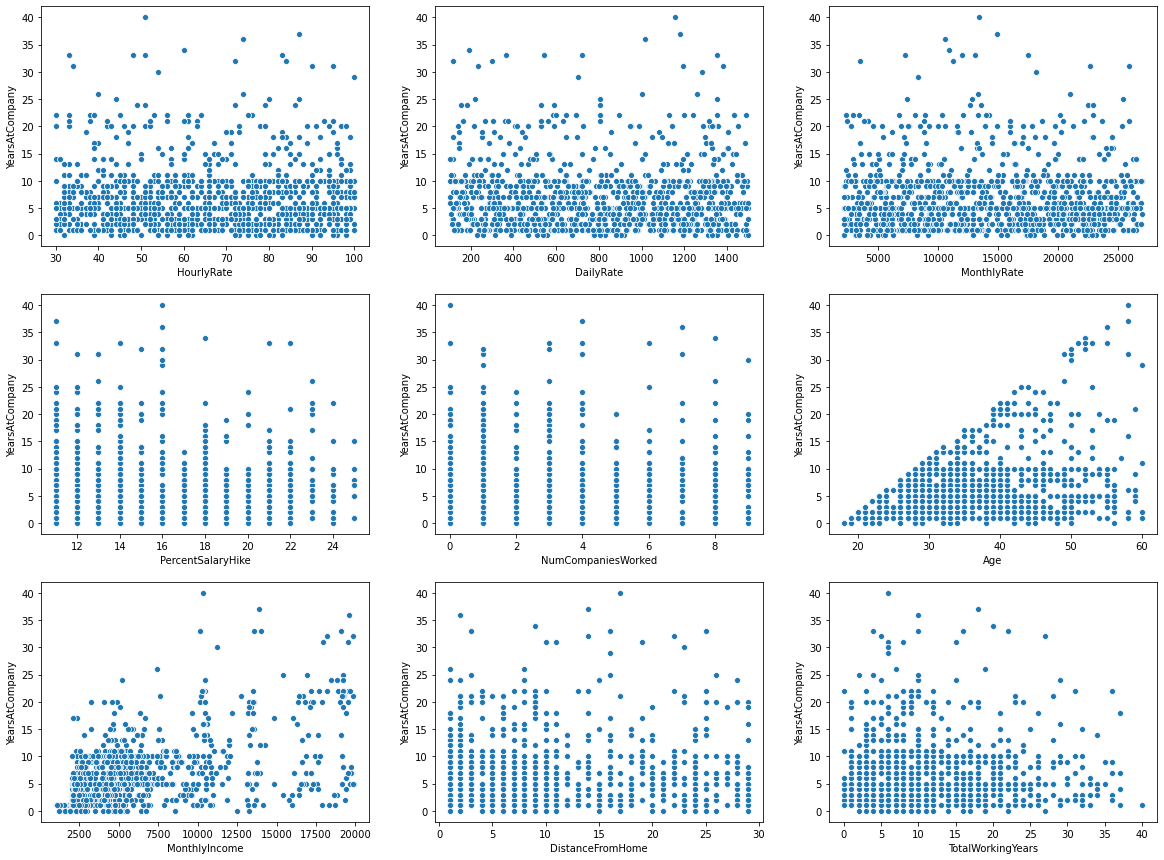

In [274]:
curr_column = "YearsAtCompany"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

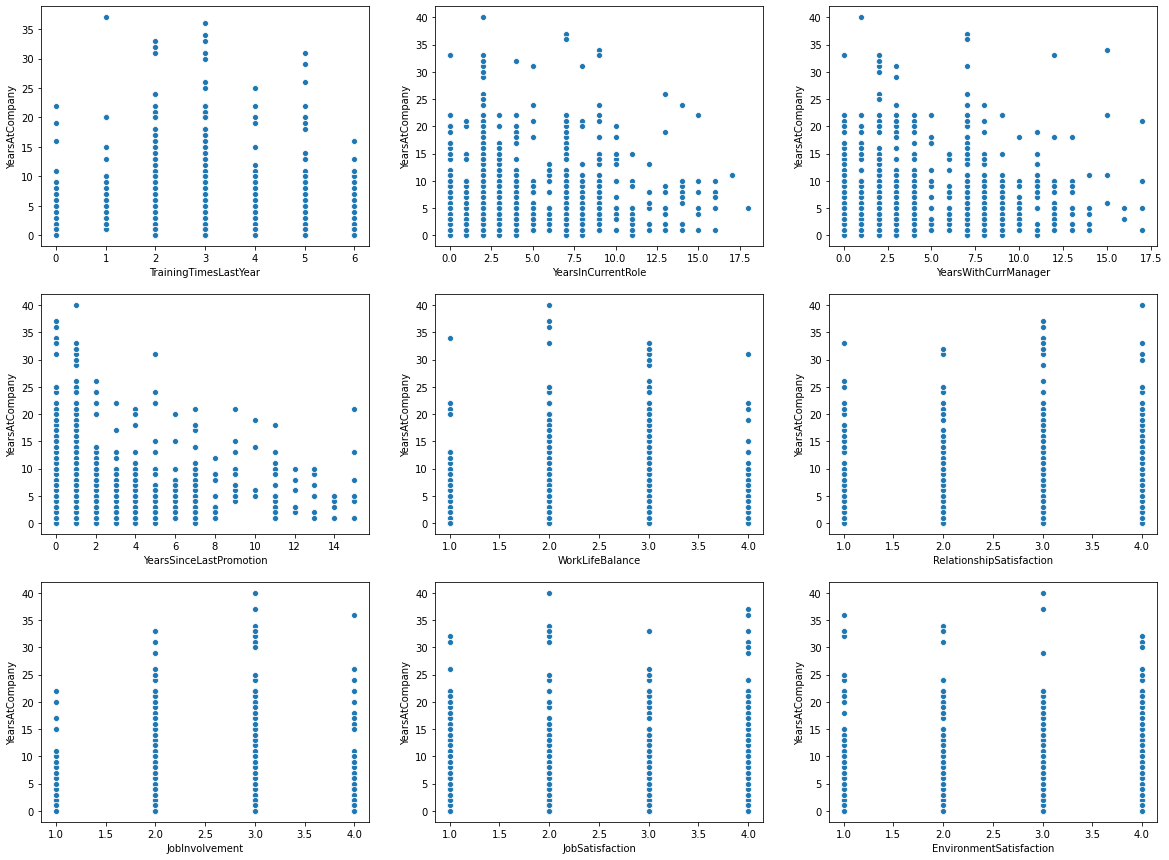

In [275]:
curr_column = "YearsAtCompany"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

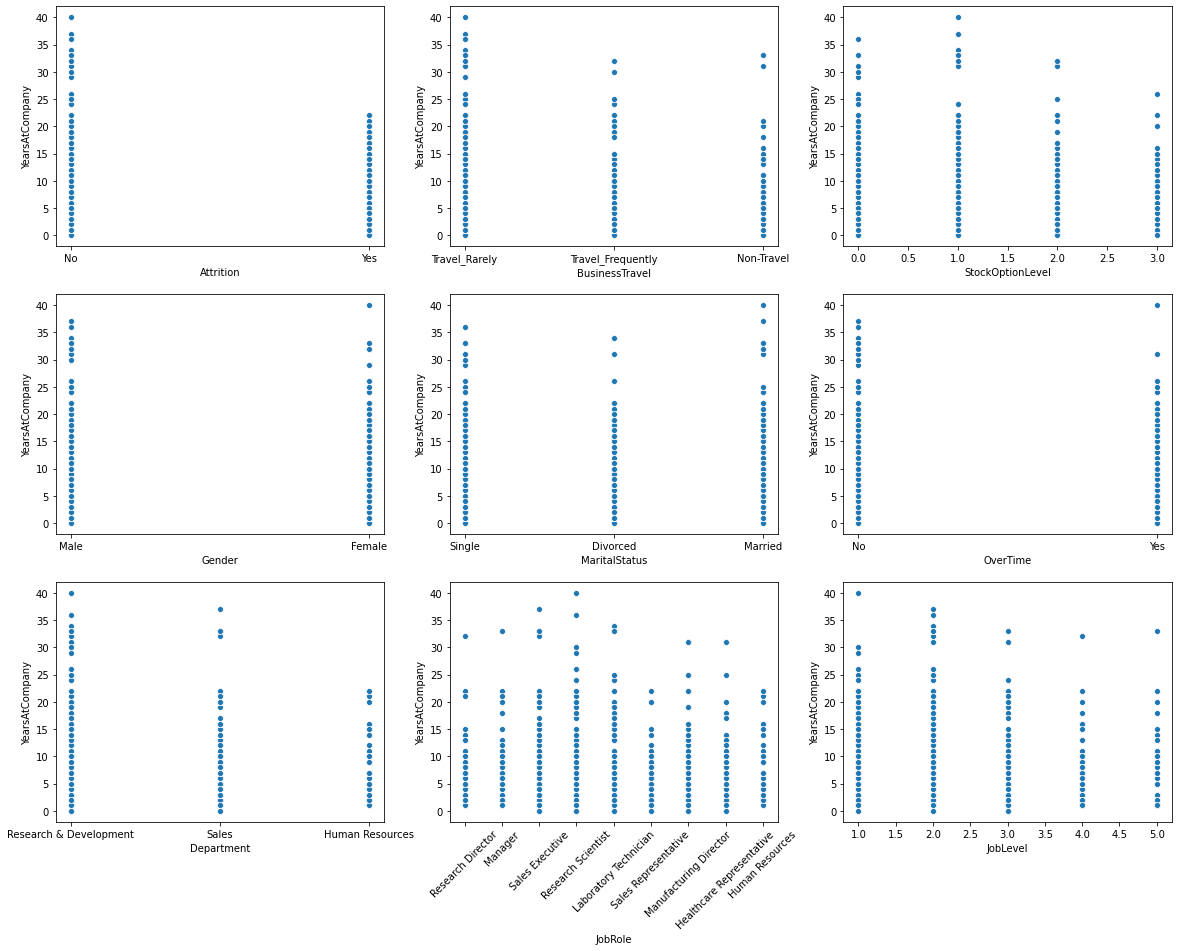

In [276]:
curr_column = "YearsAtCompany"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> YearsInCurrentRole scatter plots </h6>

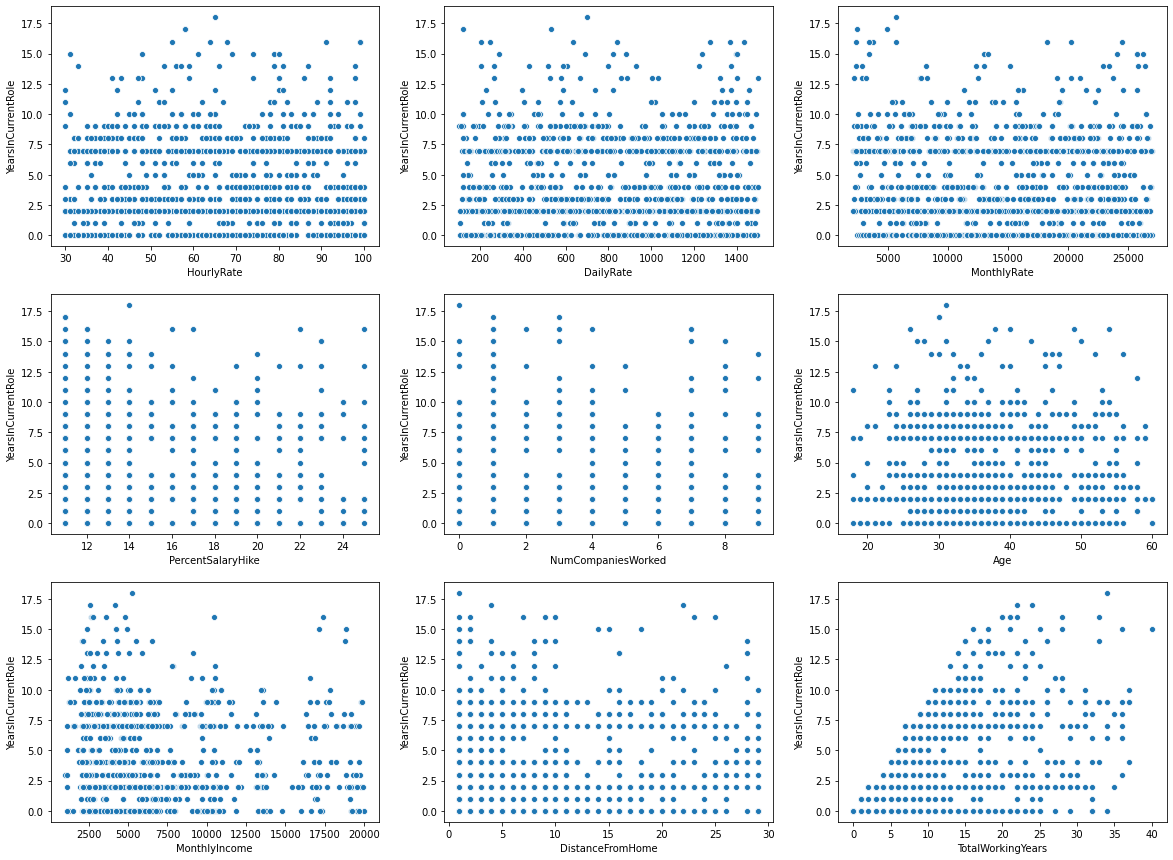

In [277]:
curr_column = "YearsInCurrentRole"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

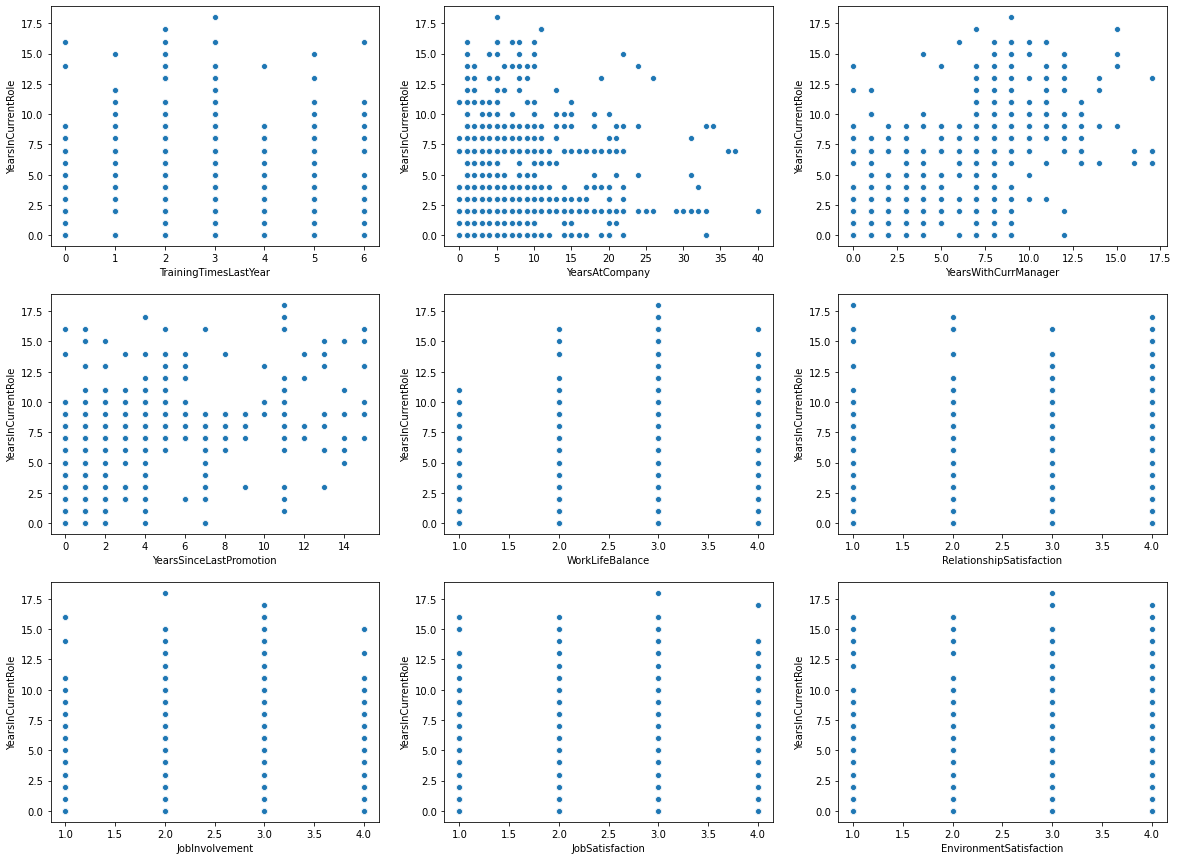

In [278]:
curr_column = "YearsInCurrentRole"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

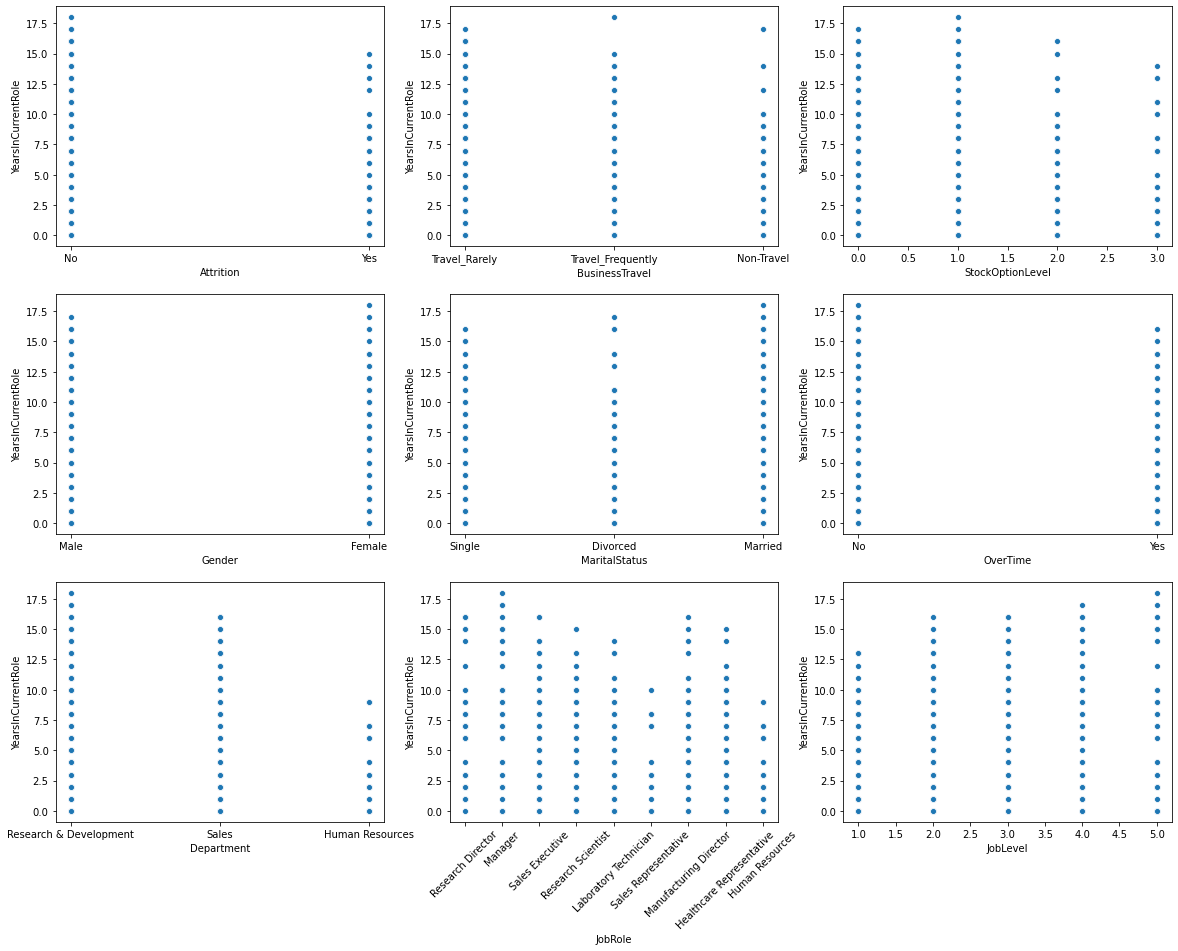

In [279]:
curr_column = "YearsInCurrentRole"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> YearsSinceLastPromotion scatter plots </h6>

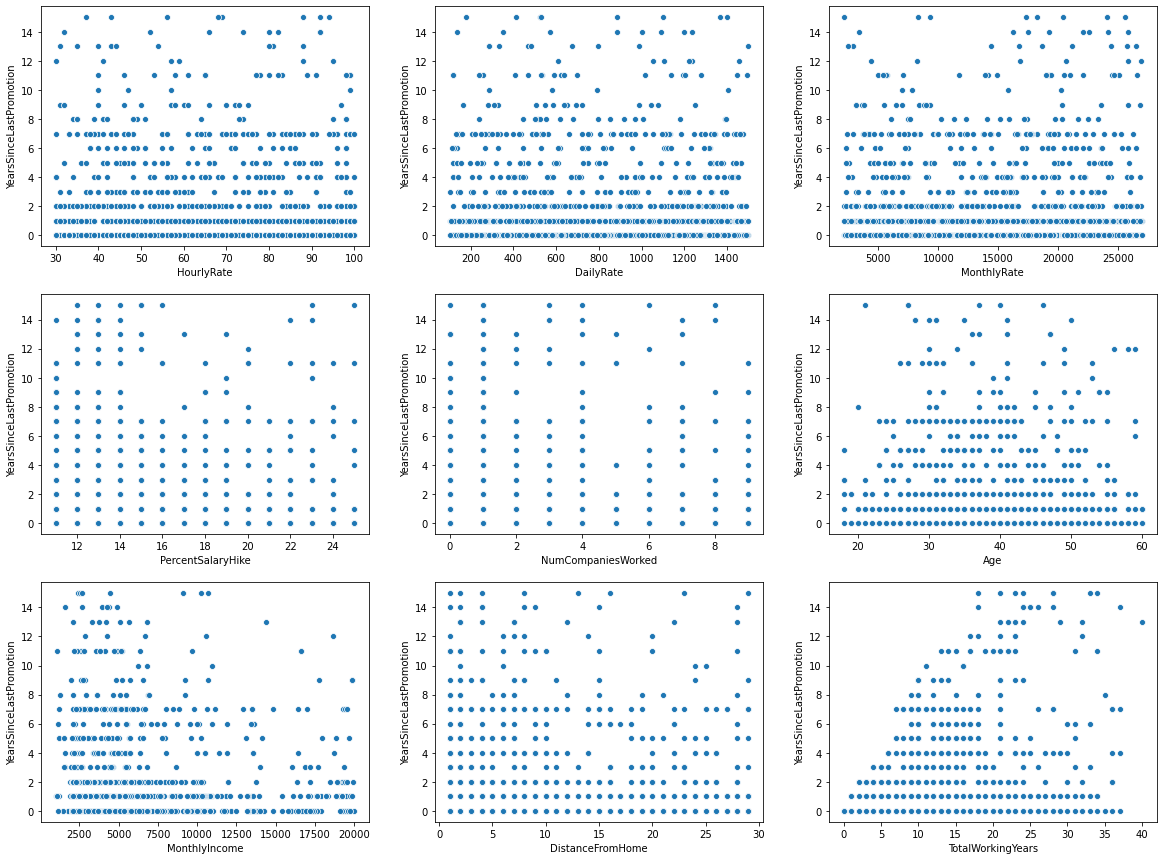

In [280]:
curr_column = "YearsSinceLastPromotion"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

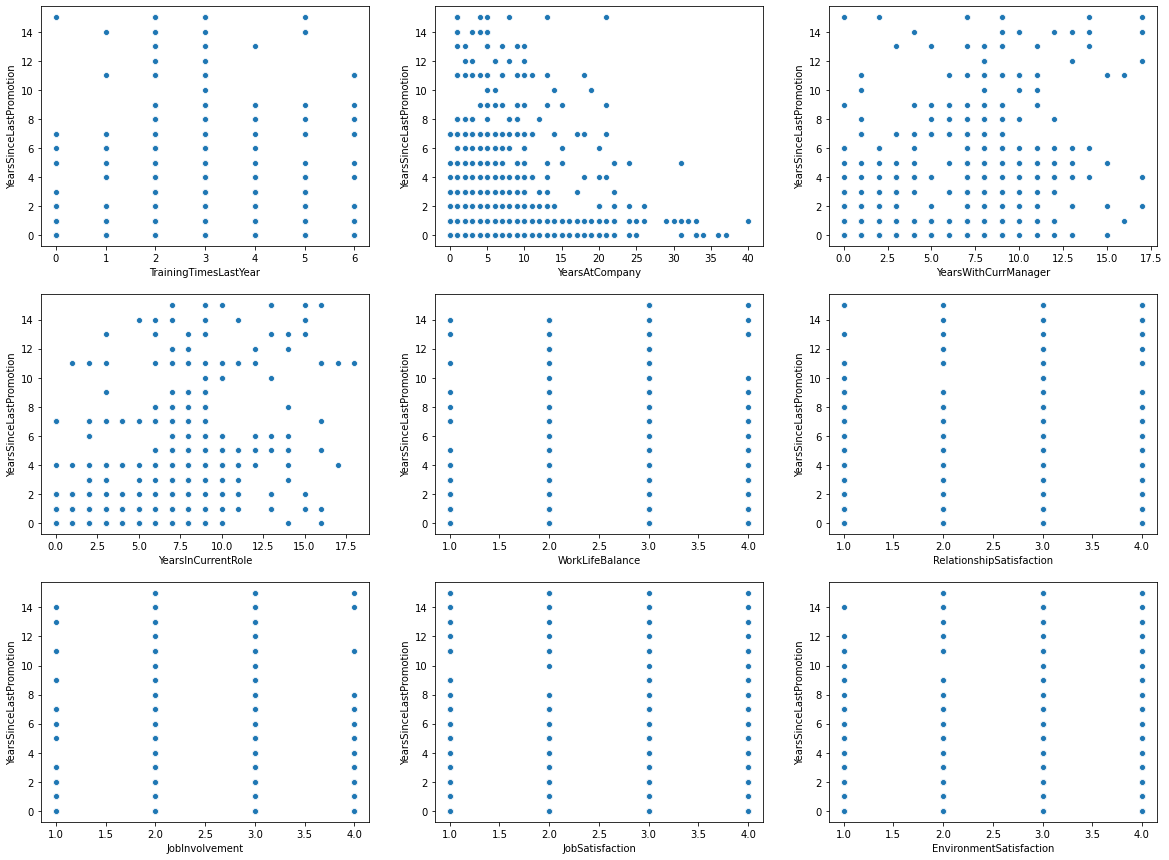

In [281]:
curr_column = "YearsSinceLastPromotion"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

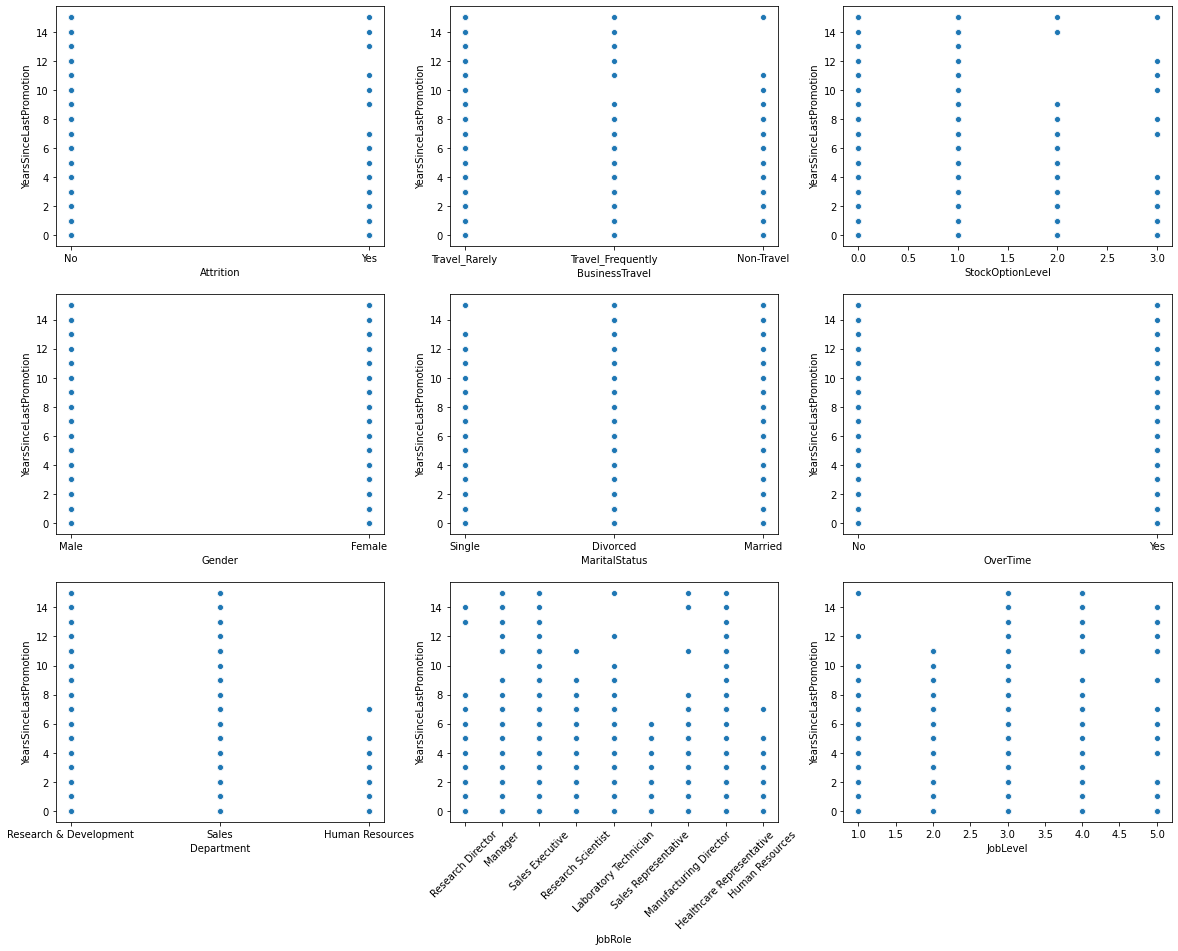

In [282]:
curr_column = "YearsSinceLastPromotion"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> YearsWithCurrManager scatter plots </h6>

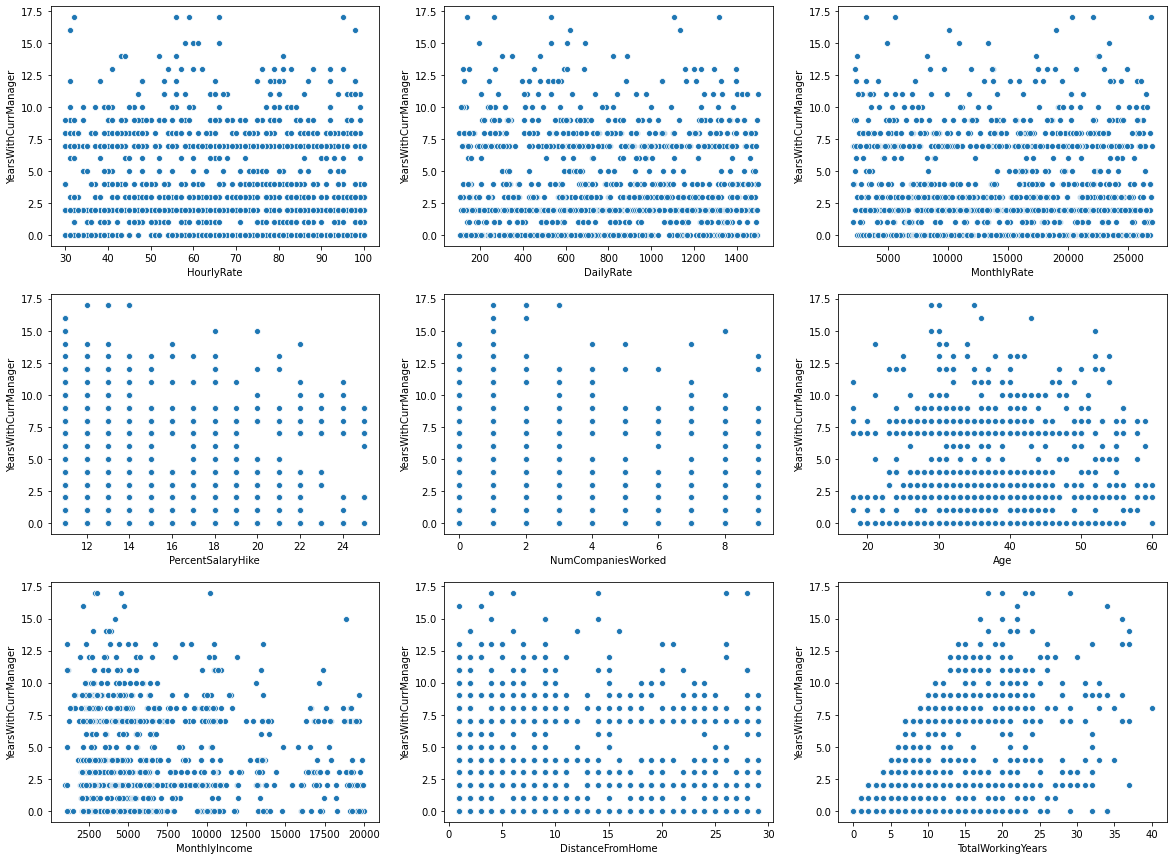

In [283]:
curr_column = "YearsWithCurrManager"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="Age",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

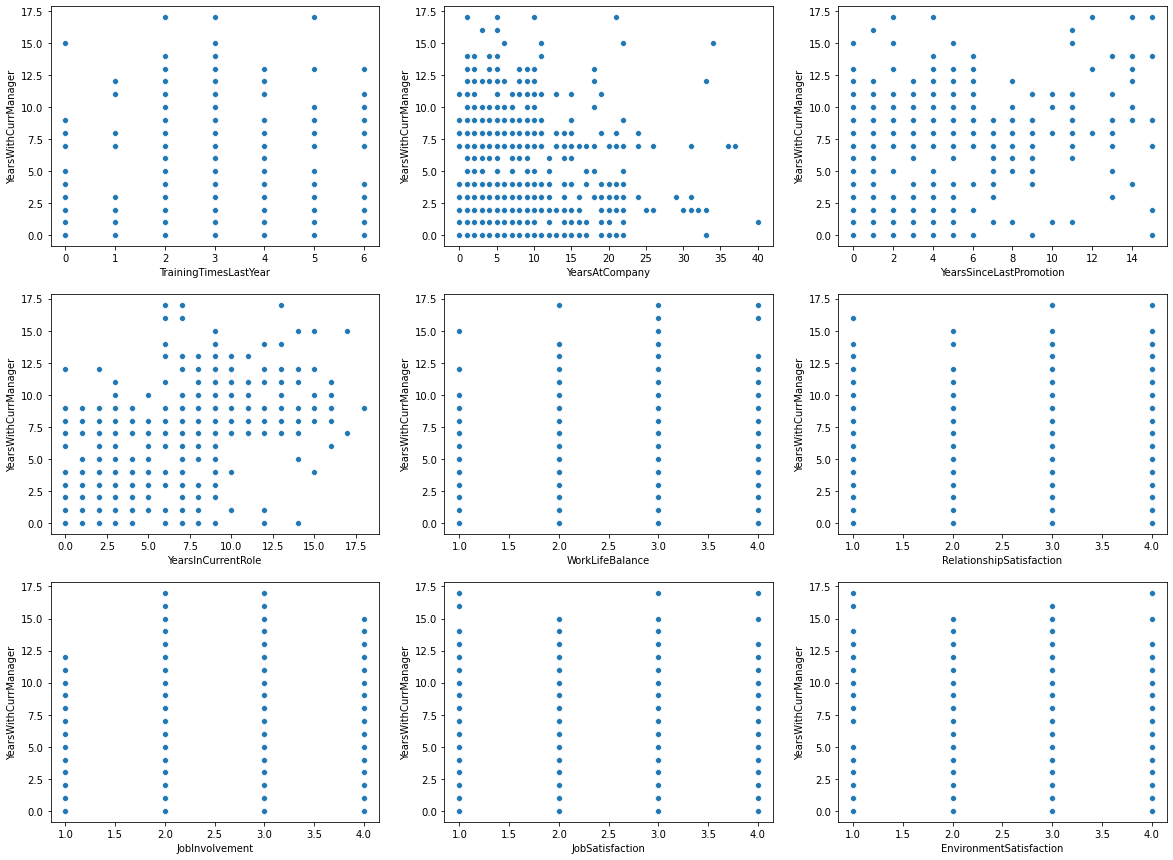

In [284]:
curr_column = "YearsWithCurrManager"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

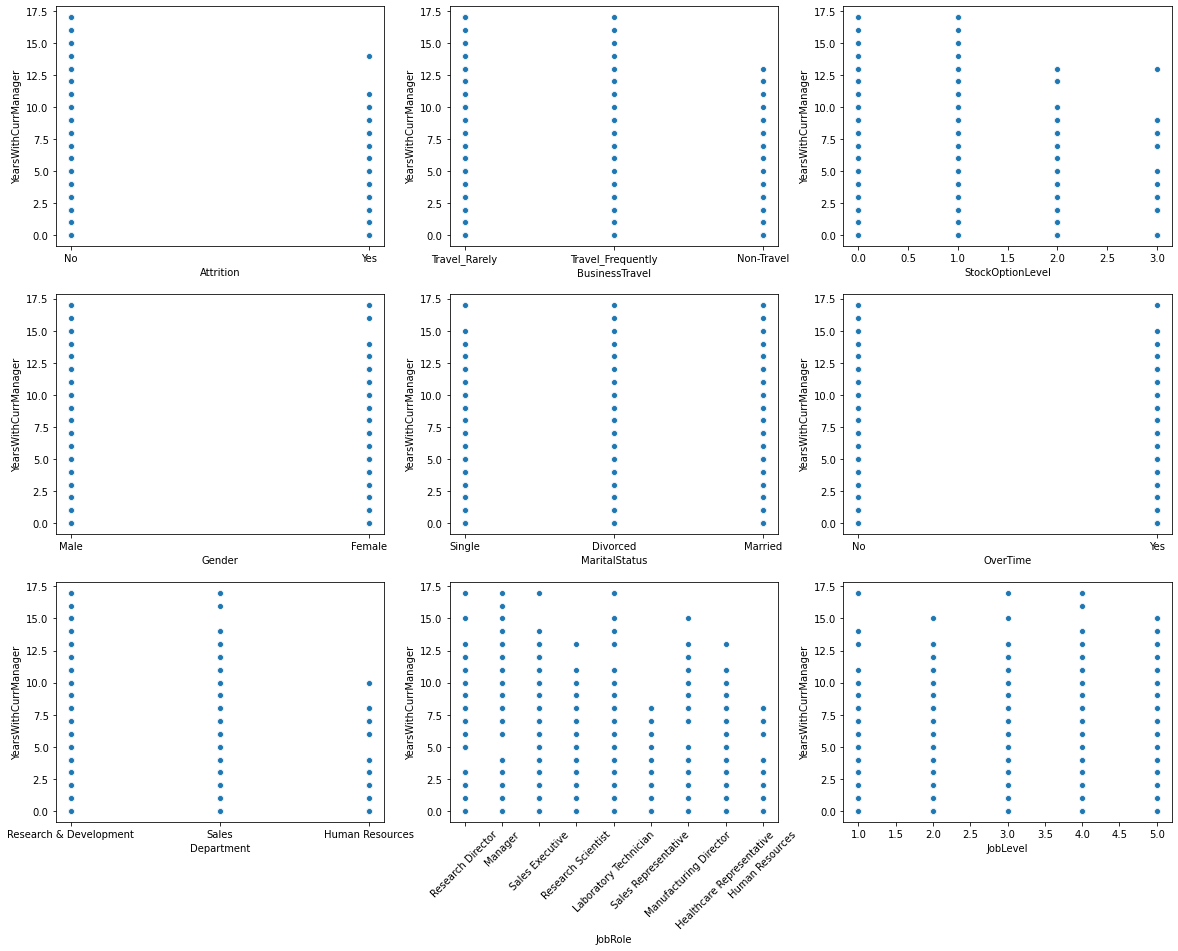

In [285]:
curr_column = "YearsWithCurrManager"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="Attrition",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

<h6> Attrition scatter plots </h6>

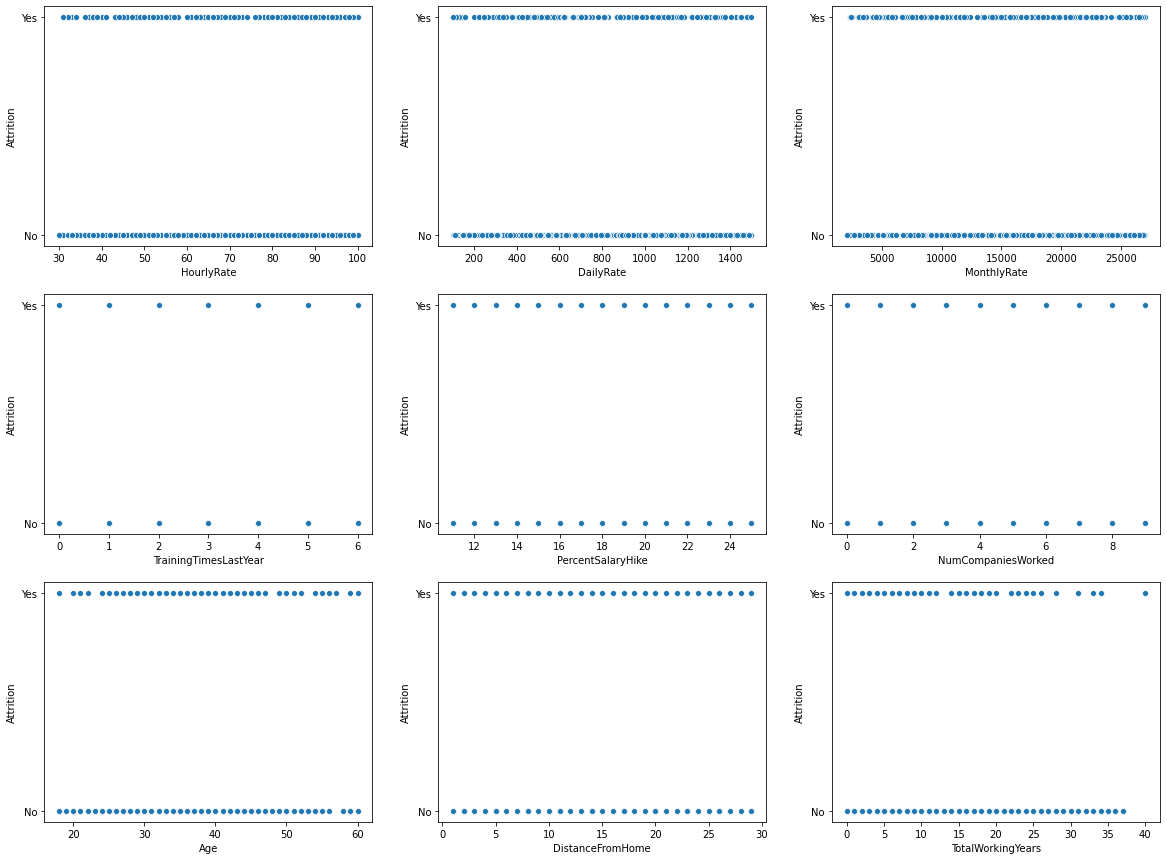

In [286]:
curr_column = "Attrition"
fig = plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="HourlyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="DailyRate",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="MonthlyRate",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="TrainingTimesLastYear",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="PercentSalaryHike",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="NumCompaniesWorked",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Age",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="DistanceFromHome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="TotalWorkingYears",  y=curr_column)

plt.show()

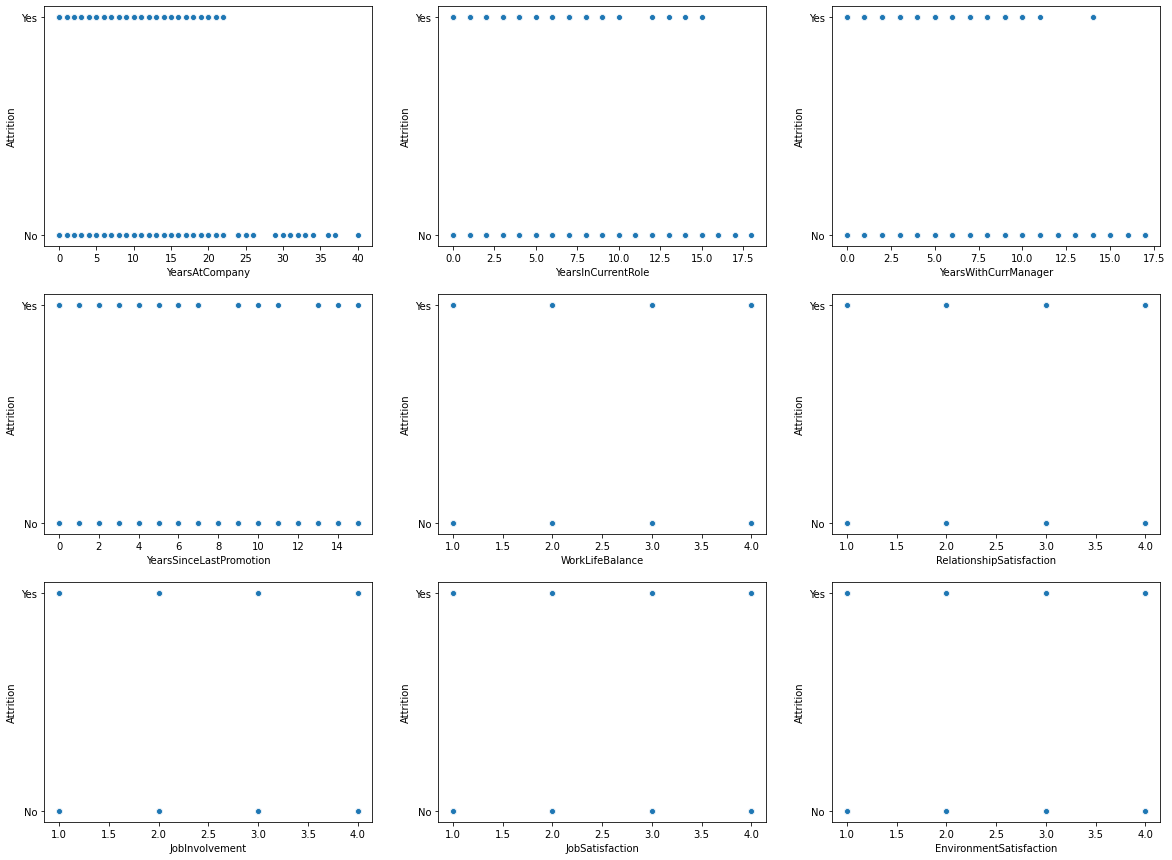

In [287]:
curr_column = "Attrition"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="YearsAtCompany",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="YearsInCurrentRole",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="YearsWithCurrManager",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="YearsSinceLastPromotion",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="WorkLifeBalance",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="RelationshipSatisfaction",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="JobInvolvement",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobSatisfaction",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="EnvironmentSatisfaction",  y=curr_column)

plt.show()

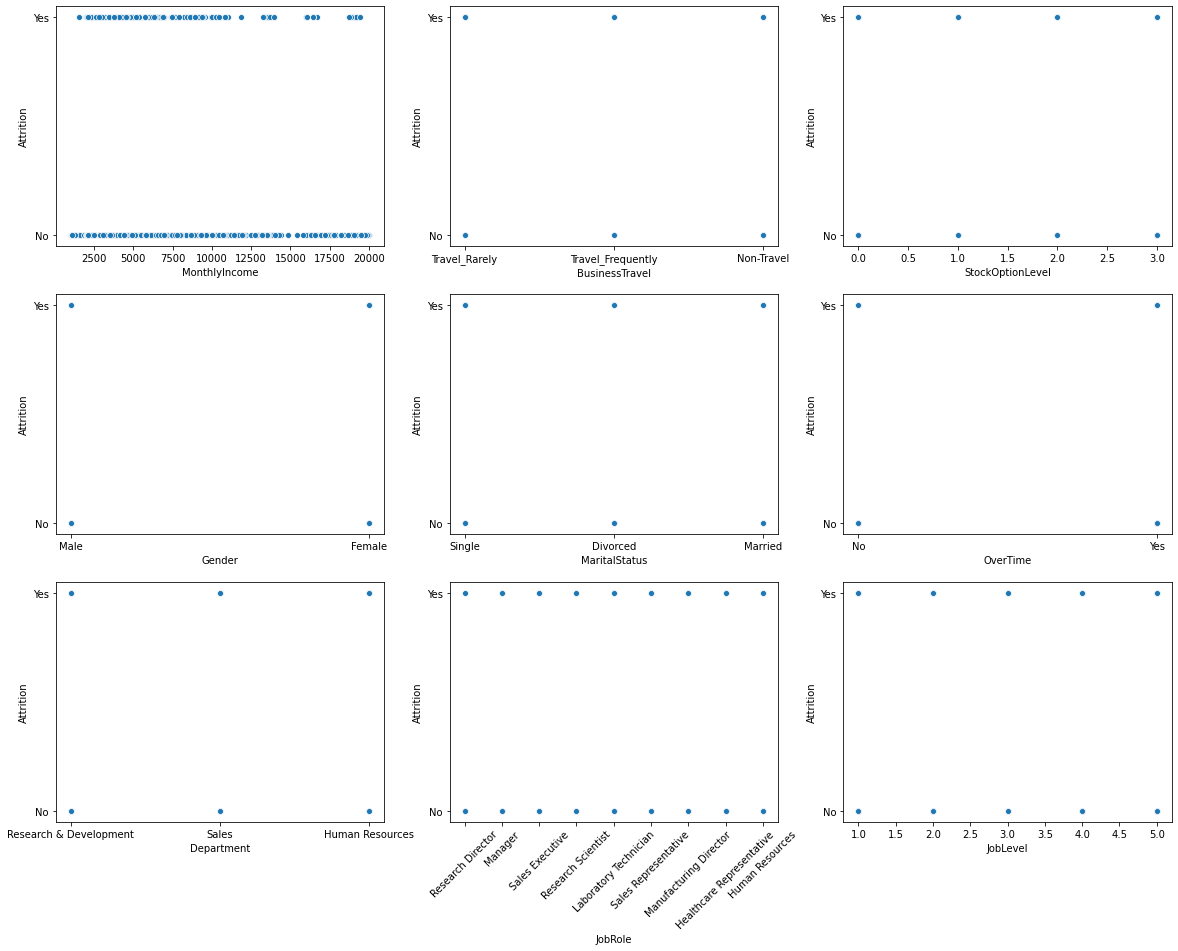

In [288]:
curr_column = "Attrition"
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(data=df, x="MonthlyIncome",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(data=df, x="BusinessTravel",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(data=df, x="StockOptionLevel",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(data=df, x="Gender",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(data=df, x="MaritalStatus",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(data=df, x="OverTime",  y=curr_column)

ax = plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(data=df, x="Department",  y=curr_column)
ax = plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(data=df, x="JobRole",  y=curr_column)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(data=df, x="JobLevel",  y=curr_column)

plt.show()

In [289]:
df[(df["Attrition"] == "Yes")]["JobRole"].mode()

0    Laboratory Technician
dtype: object

In [290]:
df[(df["Attrition"] == "No")]["JobRole"].mode()

0    Sales Executive
dtype: object

In [291]:
def get_mean(column_name):
    tmp = df[(df["Attrition"] == "Yes")][column_name].mean()
    print("attr original ", tmp)
    tmp = df_impunted[(df_impunted["Attrition"] == "Yes")][column_name].mean()
    print("attr cleaned ", tmp)
    tmp = df[(df["Attrition"] == "No")][column_name].mean()
    print("NOattr original ", tmp)
    tmp = df_impunted[(df_impunted["Attrition"] == "No")][column_name].mean()
    print("NOattr cleaned ", tmp)

In [292]:
def get_counting(curr_df, column_name, attrition_flag):
    roles = list(curr_df[column_name].unique())
    print(roles)
    count = 0
    for r in roles:
        tmp = curr_df[(curr_df["Attrition"] == attrition_flag) & (curr_df[column_name] == r)].shape[0]
        count += tmp
        print(r, tmp)
    print(count)

In [293]:
get_counting(df, "YearsAtCompany", "Yes")
get_counting(df_impunted, "YearsAtCompany", "Yes")

[8.0, 1.0, 3.0, 10.0, 9.0, 6.0, 4.0, 2.0, 34.0, 5.0, 13.0, 7.0, 22.0, 18.0, 14.0, 17.0, 15.0, 31.0, 21.0, nan, 24.0, 0.0, 20.0, 11.0, 19.0, 12.0, 16.0, 29.0, 32.0, 40.0, 33.0, 26.0, 25.0, 37.0, 36.0, 30.0]
8.0 12
1.0 21
3.0 13
10.0 16
9.0 11
6.0 9
4.0 11
2.0 14
34.0 0
5.0 16
13.0 3
7.0 13
22.0 2
18.0 2
14.0 3
17.0 2
15.0 2
31.0 0
21.0 4
nan 0
24.0 0
0.0 7
20.0 5
11.0 7
19.0 1
12.0 4
16.0 1
29.0 0
32.0 0
40.0 0
33.0 0
26.0 0
25.0 0
37.0 0
36.0 0
30.0 0
179
[8, 1, 3, 10, 9, 5, 13, 7, 4, 6, 18, 17, 15, 2, 0, 20, 11, 19, 12, 14, 16]
8 13
1 15
3 11
10 18
9 10
5 13
13 3
7 12
4 9
6 8
18 1
17 1
15 2
2 9
0 6
20 5
11 8
19 1
12 4
14 3
16 1
153


In [294]:
get_counting(df, "EnvironmentSatisfaction", "No")
get_counting(df_impunted, "EnvironmentSatisfaction", "No")

[2, 3, 4, 1]
2 200
3 313
4 305
1 166
984
[2, 3, 4, 1]
2 153
3 231
4 220
1 126
730


In [295]:
get_mean("TrainingTimesLastYear")

attr original  2.74468085106383
attr cleaned  2.522875816993464
NOattr original  2.841645885286783
NOattr cleaned  2.695890410958904


Attritions numerical causes:
- DistanceFromHome: slightly higher for quo leaves (10 for who leaves and 9 for who stay)
- PercentSalaryHike: slighly lower for who leaves
- YearsAtCompany: higher for who leaves (they want to chance or are old)
- YearsInCurrentRole: lower for who leaves 

Attritions ordinal causes:
- JobLevel: most leave if level =1  (no attrition usually are most of level 2)
- StockOptionLevel: if = 0 (company's quotes incentive to stay)

- EnvironmentSatisfaction: higher for who stays (+0.30)
- JobInvolvement:higher for who stays (+0.20)
- JobInvolvement:higher for who stays (+0.20)
- JobSatisfaction:higher for who stays (+0.35)
- JobSatisfaction:higher for who stays (+0.35)
- RelationshipSatisfaction: higher for who stays (+0.15)

- TrainingTimesLastYear: slightly higher for who stays 


Attritions categorical causes:
- JobRole: most Laboratory Technician @TODO indagare
- Gender: most Male
- MaritalStatus: most leave if single

- BusinessTravel: Travel_Rarely, but not relevant
- OverTime: difference between who makes and who don't makes overtime is quit small (89-103 and 80-73)
  N.B. no new employee with NumCompaniesWorked == 0 leaves
  
HIGH VALUES BUT MAJORITY FOR NON ATTRITION TOO:
- NumCompaniesWorked: = 1 majority leave (they have a previous experience to compare) but majority for non companies
- Education: 3 but most 3s also in non attrition
- MonthlyIncome: same for attrition and non attritio (N.B. chanches in cleaned DataFrame)
attr original  6599.294871794872
attr cleaned  7059.006535947712
NOattr original  6559.499380421314
NOattr cleaned  6905.81917808219
- MonthlyRate: quite similar for all
- Age: quite similar
attr original  36.706586826347305
attr cleaned  36.529411764705884
NOattr original  37.29771908763505
NOattr cleaned  36.5602739726027
- NumCompaniesWorked: slighly higher for who leaves (frequent company changer or bad employee)

Turnover employee profile = 